In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgbm
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
import optuna

import matplotlib.pyplot as plt
import seaborn as sns


import joblib
from pathlib import Path
from warnings import filterwarnings
filterwarnings('ignore')

/home/arma/anaconda3/envs/teachopencadd/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
HDAC1and6 = Path(HERE).resolve().parents[1]/'input'
output = HERE/'OUTPUT'

In [3]:
df = pd.read_pickle(HDAC1and6/"HDAC1and6_1024B.csv.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,molecular_weight,n_rot,n_heavy,n_hba,n_hbd,logp,num_ar,num_sa,num_alip,SelectivityWindow
0,CHEMBL4635479,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3356504, 10511, 2043088, 13972425, 4030911, 8...",424.233522,10.0,31.0,9.0,4.0,2.58480,3.0,0.0,0.0,0.42
1,CHEMBL4299417,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[100053, 10511, 1733887, 904525, 692898, 28201...",1034.651502,17.0,73.0,19.0,7.0,4.18550,2.0,3.0,3.0,0.98
2,CHEMBL4225331,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[5976924, 3913535, 8033062, 6790323, 12480751,...",375.119461,4.0,27.0,4.0,2.0,4.04462,3.0,0.0,0.0,0.84
3,CHEMBL1094710,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[6411541, 3821889, 137380, 8040222, 7332227, 1...",413.242690,10.0,30.0,6.0,3.0,4.09950,2.0,1.0,1.0,0.45
4,CHEMBL3287256,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6220534, 11837907, 15961454, 218190, 16674131...",408.128983,8.0,27.0,7.0,3.0,3.71980,2.0,1.0,1.0,-0.33


In [4]:
df_labeled = pd.read_csv(HDAC1and6/"HDAC1and6_SemiSel_dataset.csv", index_col=0)
df_labeled

,molecule_chembl_id,smiles,type_HDAC6,pchembl_HDAC6,standard_value_HDAC6,type_HDAC1,pchembl_HDAC1,standard_value_HDAC1,SelectivityRatio,SelectivityWindow,sel6,sel1,label
0,CHEMBL4098975,O=C(CCCCCCC(=O)Nc1ccc(NCCCn2cc(-c3ncnc4[nH]ccc...,IC50,9.85,0.14,IC50,6.96,110.0,785.71,2.89,2.89,-2.89,hDAC6-selective
1,CHEMBL3912061,CS(=O)(=O)NCCc1cn(Cc2ccc(C(=O)NO)cc2)c2ccccc12,IC50,9.77,0.17,IC50,6.21,623.0,3664.71,3.56,3.56,-3.56,hDAC6-selective
2,CHEMBL4243347,O=C(CCCCCCC(=O)Nc1ccc(Nc2nc(-c3cn[nH]c3)c3cc[n...,IC50,9.70,0.20,IC50,8.70,2.0,10.00,1.00,1.00,-1.00,Dual-binder
3,CHEMBL4247128,C=CCCn1cc(-c2nc(Nc3ccc(NC(=O)CCCCCCC(=O)NO)cc3...,IC50,9.60,0.25,IC50,7.08,83.0,332.00,2.52,2.52,-2.52,hDAC6-selective
4,CHEMBL4126811,CC(C)(C)OC(=O)Nc1ccc(-c2cc(C(=O)NCc3ccc(C(=O)N...,IC50,9.48,0.33,IC50,6.36,436.0,1321.21,3.12,3.12,-3.12,hDAC6-selective
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,CHEMBL4278591,CC(=O)Nc1ccc(-c2ccnc(Nc3cccc(OCCCCCCCC(=O)NO)c...,IC50,8.17,6.70,IC50,5.98,1043.0,155.67,2.19,2.19,-2.19,hDAC6-selective
1902,CHEMBL4649511,O=C(CCCCCCCNc1nc2cc(C(=O)O)ccc2c2cnccc12)NO,IC50,7.89,13.00,IC50,8.48,3.3,0.25,-0.59,-0.59,0.59,Dual-binder
1903,CHEMBL4291781,CC(=O)Nc1ccc(-c2ccnc(Nc3ccc(OCCCCCCCC(=O)NO)cc...,IC50,7.85,14.00,IC50,5.77,1701.0,121.50,2.08,2.08,-2.08,hDAC6-selective
1908,CHEMBL3215861,CCCCc1nc2cc(/C=C/C(=O)NO)ccc2n1CCN(CC)CC,Ki,6.61,247.00,Ki,7.55,28.0,0.11,-0.94,-0.94,0.94,Dual-binder


In [5]:
df = pd.merge(df, df_labeled[['molecule_chembl_id',  'label']], on='molecule_chembl_id')

In [6]:
df[df['label'] == 'Dual-binder']['SelectivityWindow'].max()

1.0

In [7]:
#df['Classes'] = np.where(df['label']== 'hDAC1-selective', 2)
df['Class'] = np.zeros(len(df))

df.loc[df[df.label == 'hDAC1-selective'].index, "Class"] = 1.0
df.loc[df[df.label == 'hDAC6-selective'].index, "Class"] = 2.0
df.loc[df[df.label == 'Dual-binder'].index, "Class"] = 3.0
df.loc[df[df.label == 'Non-binder'].index, "Class"] = 4.0

df.head(4)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,molecular_weight,n_rot,n_heavy,n_hba,n_hbd,logp,num_ar,num_sa,num_alip,SelectivityWindow,label,Class
0,CHEMBL4635479,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3356504, 10511, 2043088, 13972425, 4030911, 8...",424.233522,10.0,31.0,9.0,4.0,2.58480,3.0,0.0,0.0,0.42,Dual-binder,3.0
1,CHEMBL4299417,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[100053, 10511, 1733887, 904525, 692898, 28201...",1034.651502,17.0,73.0,19.0,7.0,4.18550,2.0,3.0,3.0,0.98,Dual-binder,3.0
2,CHEMBL4225331,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[5976924, 3913535, 8033062, 6790323, 12480751,...",375.119461,4.0,27.0,4.0,2.0,4.04462,3.0,0.0,0.0,0.84,Dual-binder,3.0
3,CHEMBL1094710,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[6411541, 3821889, 137380, 8040222, 7332227, 1...",413.242690,10.0,30.0,6.0,3.0,4.09950,2.0,1.0,1.0,0.45,Dual-binder,3.0


In [8]:
# Add column for selectivity
df["selectivity"] = np.zeros(len(df))

# Mark every molecule as selective if SelectivityWindow is >=2 or >=-2, 0 otherwise
df.loc[df[df.SelectivityWindow >= 2.0].index, "selectivity"] = 1.0
df.loc[df[df.SelectivityWindow <= -2.0].index, "selectivity"] = 1.0
#By using Morgan fingerprints with radius of 3 and 1024 bits
indices =  np.array(df.index)
X = np.array(list((df['fp_Morgan3']))).astype(float)
#X.shape
Y = df["SelectivityWindow"].values
Y_cat =  df["selectivity"].values
Y_class = df['Class'].values

In [9]:
NUMS = 10
random_state= [146736, 1367, 209056, 1847464, 89563, 967034, 3689, 689547, 578929, 7458910]
X_tr_all = []
Y_tr_all = []
X_te_all = []
Y_te_all = []
Y_tr_class_all = []
Y_te_class_all = []
index_tr_all= []
index_te_all = []

for i in range(NUMS):
    X_tr, X_te, Y_tr, Y_te, Y_tr_class, Y_te_class, index_tr, index_te = train_test_split(X, Y, Y_class,indices, test_size=0.2, random_state=random_state[i], stratify=Y_class)
    X_tr_all.append(X_tr)
    Y_tr_all.append(Y_tr)
    X_te_all.append(X_te)
    Y_te_all.append(Y_te)
    Y_tr_class_all.append(Y_tr_class)
    Y_te_class_all.append(Y_te_class)
    index_tr_all.append(index_tr)
    index_te_all.append(index_te)
globals_dict = globals()
    
for i in range(0, len(index_te_all)):
    globals_dict[f"trainSet{i}"] = df.iloc[index_tr_all[i]]
    globals_dict[f"testSet{i}"] = df.iloc[index_te_all[i]]
    globals_dict[f"trainindex{i}"] = df.index[index_tr_all[i]]
    globals_dict[f"testindex{i}"] = df.index[index_te_all[i]]  
    globals_dict[f"X_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['SelectivityWindow'])).astype(float)
    globals_dict[f"Y_trainSet{i}_cat"] = np.array(list(df.iloc[index_tr_all[i]]['selectivity'])).astype(float)
    globals_dict[f"Y_trainSet{i}_class"] = np.array(list(df.iloc[index_tr_all[i]]['Class'])).astype(float)
    globals_dict[f"X_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['SelectivityWindow'])).astype(float)
    globals_dict[f"Y_testSet{i}_cat"] = np.array(list(df.iloc[index_te_all[i]]['selectivity'])).astype(float)
    globals_dict[f"Y_testSet{i}_class"] = np.array(list(df.iloc[index_te_all[i]]['Class'])).astype(float)
    

In [10]:
import sklearn.metrics
import math

def matrix_metrix(real_values,pred_values,beta):

    CM = confusion_matrix(real_values,pred_values)
    TN = CM[0][0]
    FN = CM[1][0] 
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN+FN+TP+FP
    Prevalence = round( (TP+FP) / Population,2)
    Accuracy   = round( (TP+TN) / Population,4)
    Precision  = round( TP / (TP+FP),4 )
    NPV        = round( TN / (TN+FN),4 )
    FDR        = round( FP / (TP+FP),4 )
    FOR        = round( FN / (TN+FN),4 ) 
    check_Pos  = Precision + FDR
    check_Neg  = NPV + FOR
    Recall     = round( TP / (TP+FN),4 )
    FPR        = round( FP / (TN+FP),4 )
    FNR        = round( FN / (TP+FN),4 )
    TNR        = round( TN / (TN+FP),4 ) 
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos      = round( Recall/FPR,4 ) 
    LRNeg      = round( FNR / TNR ,4 )
    DOR        = round( LRPos/LRNeg)
    BalancedAccuracy = round( 0.5*(Recall+TNR),4)
    F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)   
    F1_weighted = round(f1_score(real_values, pred_values, average="weighted"), 4)
    F1_micro = round(f1_score(real_values, pred_values, average="micro"), 4)
    F1_macro = round(f1_score(real_values, pred_values, average="macro"), 4)
    FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
    MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
    BM         = Recall+TNR-1
    MK         = Precision+NPV-1

    mat_met = pd.DataFrame({
    'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos',
              'check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','BalancedAccuracy',
              'F1','F1_weighted','F1_micro', 'F1_macro', 'FBeta','MCC','BM','MK'],     
    'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,BalancedAccuracy,F1,F1_weighted,F1_micro, F1_macro, FBeta,MCC,BM,MK]})  
    return (mat_met)


## Random Forest 

In [11]:
%%time

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)


for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        rf_reg =  RandomForestRegressor(random_state=1121218, max_features = None, n_jobs=24,oob_score=True,
                                           max_samples=0.8, )
        rf_reg.fit(x_train, y_train)
        y_pred = rf_reg.predict(x_test)  
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)



mat_met_rf = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
                    
print(mat_met_rf)

                 Metric  Value (average)  Value (std)
0                    R2         0.708094     0.051837
1                    TP        18.400000     3.405877
2                    TN        98.900000     1.449138
3                    FP         1.600000     1.349897
4                    FN        15.000000     3.464102
5              Accuracy         0.876041     0.033175
6             Precision         0.916718     0.075089
7           Sensitivity         0.551086     0.101888
8           Specificity         0.984080     0.013424
9              F1 score         0.685613     0.093830
10  F1 score (weighted)         0.863578     0.038586
11     F1 score (macro)         0.804184     0.056888
12    Balanced Accuracy         0.767583     0.055533
13                  MCC         0.647457     0.103381
14                  NPV         0.868870     0.027879
15              ROC_AUC         0.767583     0.055533
CPU times: user 1min 29s, sys: 374 ms, total: 1min 29s
Wall time: 7.81 s


In [12]:
import optuna  


def objective_rf_CV(trial, X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggest_categorical("max_features", [None]),
    #oob_score = trial.suggest_categorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    

    cv_scores = np.empty(10)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        rf = RandomForestRegressor(**param_grid, n_jobs=24, random_state=1121218, max_features = None, 
                                   oob_score=True,
                                   max_samples=0.8,) 
        
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
      
    
    return np.mean(cv_scores)

In [13]:
def detailed_objective_rf_CV(trial,X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggest_categorical("max_features", [None]),
    #oob_score = trial.suggest_categorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        rf = RandomForestRegressor(**param_grid, n_jobs=24, random_state=1121218, max_features = None, oob_score=True,
                                           max_samples=0.8,)
   
        #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # convert to categorical values
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)

    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)
    
  

In [14]:
#Execute optuna and set hyperparameters
study_rf = optuna.create_study(direction='maximize', study_name="RFRegressor")
func_rf_0 = lambda trial: objective_rf_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_rf.optimize(func_rf_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 15:02:04,546] A new study created in memory with name: RFRegressor
[I 2023-02-21 15:02:46,858] Trial 0 finished with value: 0.6829030767338571 and parameters: {'n_estimators': 718}. Best is trial 0 with value: 0.6829030767338571.
[I 2023-02-21 15:03:14,733] Trial 1 finished with value: 0.6835958704586108 and parameters: {'n_estimators': 469}. Best is trial 1 with value: 0.6835958704586108.
[I 2023-02-21 15:03:40,299] Trial 2 finished with value: 0.6834980909741641 and parameters: {'n_estimators': 431}. Best is trial 1 with value: 0.6835958704586108.
[I 2023-02-21 15:04:05,398] Trial 3 finished with value: 0.6832480394557217 and parameters: {'n_estimators': 421}. Best is trial 1 with value: 0.6835958704586108.
[I 2023-02-21 15:04:20,068] Trial 4 finished with value: 0.680381488100111 and parameters: {'n_estimators': 248}. Best is trial 1 with value: 0.6835958704586108.
[I 2023-02-21 15:04:43,663] Trial 5 finished with value: 0.6831957040207175 and parameters: {'n_estimator

[I 2023-02-21 15:27:13,553] Trial 46 finished with value: 0.6833671871829269 and parameters: {'n_estimators': 569}. Best is trial 24 with value: 0.6840945652904953.
[I 2023-02-21 15:27:50,097] Trial 47 finished with value: 0.683284393247759 and parameters: {'n_estimators': 435}. Best is trial 24 with value: 0.6840945652904953.
[I 2023-02-21 15:28:12,193] Trial 48 finished with value: 0.680525413706718 and parameters: {'n_estimators': 250}. Best is trial 24 with value: 0.6840945652904953.
[I 2023-02-21 15:28:58,632] Trial 49 finished with value: 0.6833402362548066 and parameters: {'n_estimators': 540}. Best is trial 24 with value: 0.6840945652904953.


	Number of trials: 50.0
	Best value (r2_score): 0.6841
	Best params:
		n_estimators: 495


In [15]:
optimized_rf_0 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
 
data_testing = pd.DataFrame()    
    
optimized_rf_0.fit(X_trainSet0, Y_trainSet0,)

#predict        
y_pred_rf_0 = optimized_rf_0.predict(X_testSet0)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet0, y_pred_rf_0)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet0 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_0_cat = np.where(((y_pred_rf_0 >= 2) | (y_pred_rf_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_rf_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_rf_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_rf_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_rf_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_rf_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_rf_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_rf_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_rf_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_rf_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_rf_0_cat)
data_testing['y_test_idx0'] = testindex0
data_testing['y_test_Set0'] = Y_testSet0
data_testing['y_pred_Set0'] = y_pred_rf_0


mat_met_rf_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_rf_test)


                 Metric        Set0
0                    R2    0.664931
1                    TP   39.000000
2                    TN  199.000000
3                    FP    2.000000
4                    FN   28.000000
5              Accuracy    0.888060
6             Precision    0.951220
7           Sensitivity    0.582090
8           Specificity    0.990000
9              F1 score    0.722222
10  F1 score (weighted)    0.877985
11     F1 score (macro)    0.826064
12    Balanced Accuracy    0.786070
13                  MCC    0.688228
14                  NPV    0.876700
15              ROC_AUC    0.786070


In [16]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_1 = lambda trial: objective_rf_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_rf.optimize(func_rf_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 15:29:35,478] Trial 50 finished with value: 0.6939540717274404 and parameters: {'n_estimators': 364}. Best is trial 50 with value: 0.6939540717274404.
[I 2023-02-21 15:30:07,170] Trial 51 finished with value: 0.6942753284249883 and parameters: {'n_estimators': 373}. Best is trial 51 with value: 0.6942753284249883.
[I 2023-02-21 15:30:32,616] Trial 52 finished with value: 0.6931619651665895 and parameters: {'n_estimators': 293}. Best is trial 51 with value: 0.6942753284249883.
[I 2023-02-21 15:30:53,893] Trial 53 finished with value: 0.6918624589427222 and parameters: {'n_estimators': 251}. Best is trial 51 with value: 0.6942753284249883.
[I 2023-02-21 15:31:16,661] Trial 54 finished with value: 0.6922772894025225 and parameters: {'n_estimators': 260}. Best is trial 51 with value: 0.6942753284249883.
[I 2023-02-21 15:31:34,824] Trial 55 finished with value: 0.6908759728366561 and parameters: {'n_estimators': 208}. Best is trial 51 with value: 0.6942753284249883.
[I 2023-02

[I 2023-02-21 15:54:00,289] Trial 97 finished with value: 0.6947079755167711 and parameters: {'n_estimators': 466}. Best is trial 89 with value: 0.6947617592741981.
[I 2023-02-21 15:54:42,495] Trial 98 finished with value: 0.6947266779434186 and parameters: {'n_estimators': 469}. Best is trial 89 with value: 0.6947617592741981.
[I 2023-02-21 15:55:28,569] Trial 99 finished with value: 0.6948885362639611 and parameters: {'n_estimators': 518}. Best is trial 99 with value: 0.6948885362639611.


	Number of trials: 100.0
	Best value (r2_score): 0.6949
	Best params:
		n_estimators: 518


In [17]:
optimized_rf_1 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_1.fit(X_trainSet1, Y_trainSet1,)

#predict        
y_pred_rf_1 = optimized_rf_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_rf_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_1_cat = np.where(((y_pred_rf_1 >= 2) | (y_pred_rf_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_rf_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_rf_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_rf_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_rf_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_rf_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_rf_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_rf_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_rf_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_rf_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_rf_1_cat)
data_testing['y_test_idx1'] = testindex1
data_testing['y_test_Set1'] = Y_testSet1
data_testing['y_pred_Set1'] = y_pred_rf_1


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set1'] =set1
print(mat_met_rf_test)


                 Metric        Set0        Set1
0                    R2    0.664931    0.654276
1                    TP   39.000000   42.000000
2                    TN  199.000000  198.000000
3                    FP    2.000000    3.000000
4                    FN   28.000000   25.000000
5              Accuracy    0.888060    0.895522
6             Precision    0.951220    0.933333
7           Sensitivity    0.582090    0.626866
8           Specificity    0.990000    0.985100
9              F1 score    0.722222    0.750000
10  F1 score (weighted)    0.877985    0.887972
11     F1 score (macro)    0.826064    0.841981
12    Balanced Accuracy    0.786070    0.805970
13                  MCC    0.688228    0.708901
14                  NPV    0.876700    0.887900
15              ROC_AUC    0.786070    0.805970


In [18]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_2 = lambda trial: objective_rf_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_rf.optimize(func_rf_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 15:56:21,222] Trial 100 finished with value: 0.654762209800966 and parameters: {'n_estimators': 523}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 15:57:06,367] Trial 101 finished with value: 0.6545131644818118 and parameters: {'n_estimators': 503}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 15:57:48,649] Trial 102 finished with value: 0.6545949093612524 and parameters: {'n_estimators': 468}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 15:58:30,417] Trial 103 finished with value: 0.654450218429861 and parameters: {'n_estimators': 471}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 15:59:19,288] Trial 104 finished with value: 0.6543073133383192 and parameters: {'n_estimators': 542}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 15:59:58,302] Trial 105 finished with value: 0.6548244288460602 and parameters: {'n_estimators': 435}. Best is trial 99 with value: 0.6948885362639611.
[I 202

[I 2023-02-21 16:27:16,808] Trial 146 finished with value: 0.656844232047588 and parameters: {'n_estimators': 326}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:27:58,854] Trial 147 finished with value: 0.6546733889457921 and parameters: {'n_estimators': 465}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:28:34,825] Trial 148 finished with value: 0.6558751210674582 and parameters: {'n_estimators': 391}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:29:12,427] Trial 149 finished with value: 0.6547519390461872 and parameters: {'n_estimators': 419}. Best is trial 99 with value: 0.6948885362639611.


	Number of trials: 150.0
	Best value (r2_score): 0.6949
	Best params:
		n_estimators: 518


In [19]:

optimized_rf_2 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_2.fit(X_trainSet2, Y_trainSet2,)

#predict        
y_pred_rf_2 = optimized_rf_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_rf_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_2_cat = np.where(((y_pred_rf_2 >= 2) | (y_pred_rf_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_rf_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_rf_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_rf_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_rf_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_rf_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_rf_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_rf_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_rf_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_rf_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_rf_2_cat)
data_testing['y_test_idx2'] = testindex2
data_testing['y_test_Set2'] = Y_testSet2
data_testing['y_pred_Set2'] = y_pred_rf_2

set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set2'] =set2
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.664931    0.654276    0.707219
1                    TP   39.000000   42.000000   37.000000
2                    TN  199.000000  198.000000  198.000000
3                    FP    2.000000    3.000000    3.000000
4                    FN   28.000000   25.000000   30.000000
5              Accuracy    0.888060    0.895522    0.876866
6             Precision    0.951220    0.933333    0.925000
7           Sensitivity    0.582090    0.626866    0.552239
8           Specificity    0.990000    0.985100    0.985100
9              F1 score    0.722222    0.750000    0.691589
10  F1 score (weighted)    0.877985    0.887972    0.865205
11     F1 score (macro)    0.826064    0.841981    0.807333
12    Balanced Accuracy    0.786070    0.805970    0.768657
13                  MCC    0.688228    0.708901    0.652929
14                  NPV    0.876700    0.887900    0.868400
15              ROC_AUC    0.786070    0

In [20]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_3 = lambda trial: objective_rf_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_rf.optimize(func_rf_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 16:29:56,505] Trial 150 finished with value: 0.6839809594012264 and parameters: {'n_estimators': 444}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:30:36,252] Trial 151 finished with value: 0.6838622133638654 and parameters: {'n_estimators': 461}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:31:16,337] Trial 152 finished with value: 0.6840735061420957 and parameters: {'n_estimators': 450}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:31:52,498] Trial 153 finished with value: 0.6840920732135141 and parameters: {'n_estimators': 404}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:32:34,632] Trial 154 finished with value: 0.6839411204266812 and parameters: {'n_estimators': 482}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:33:55,586] Trial 155 finished with value: 0.6830783889650489 and parameters: {'n_estimators': 905}. Best is trial 99 with value: 0.6948885362639611.
[I 2

[I 2023-02-21 16:59:19,072] Trial 196 finished with value: 0.6840223118844484 and parameters: {'n_estimators': 407}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 16:59:52,013] Trial 197 finished with value: 0.6834650908798238 and parameters: {'n_estimators': 379}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:00:23,601] Trial 198 finished with value: 0.6834284740913417 and parameters: {'n_estimators': 359}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:01:02,260] Trial 199 finished with value: 0.6840158473382858 and parameters: {'n_estimators': 438}. Best is trial 99 with value: 0.6948885362639611.


	Number of trials: 200.0
	Best value (r2_score): 0.6949
	Best params:
		n_estimators: 518


In [21]:
optimized_rf_3 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_3.fit(X_trainSet3, Y_trainSet3,)

#predict        
y_pred_rf_3 = optimized_rf_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_rf_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_3_cat = np.where(((y_pred_rf_3 >= 2) | (y_pred_rf_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_rf_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_rf_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_rf_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_rf_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_rf_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_rf_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_rf_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_rf_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_rf_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_rf_3_cat)
data_testing['y_test_idx3'] = testindex3
data_testing['y_test_Set3'] = Y_testSet3
data_testing['y_pred_Set3'] = y_pred_rf_3


set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set3'] =set3   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.664931    0.654276    0.707219    0.683312
1                    TP   39.000000   42.000000   37.000000   31.000000
2                    TN  199.000000  198.000000  198.000000  198.000000
3                    FP    2.000000    3.000000    3.000000    2.000000
4                    FN   28.000000   25.000000   30.000000   37.000000
5              Accuracy    0.888060    0.895522    0.876866    0.854478
6             Precision    0.951220    0.933333    0.925000    0.939394
7           Sensitivity    0.582090    0.626866    0.552239    0.455882
8           Specificity    0.990000    0.985100    0.985100    0.990000
9              F1 score    0.722222    0.750000    0.691589    0.613861
10  F1 score (weighted)    0.877985    0.887972    0.865205    0.835118
11     F1 score (macro)    0.826064    0.841981    0.807333    0.762103
12    Balanced Accuracy    0.786070    0.805970    0.768657    0

In [22]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_4 = lambda trial: objective_rf_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_rf.optimize(func_rf_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 17:01:49,049] Trial 200 finished with value: 0.6729420843354985 and parameters: {'n_estimators': 462}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:02:23,750] Trial 201 finished with value: 0.6725244636346839 and parameters: {'n_estimators': 383}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:02:51,974] Trial 202 finished with value: 0.6711874624662357 and parameters: {'n_estimators': 319}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:03:28,199] Trial 203 finished with value: 0.672656884486646 and parameters: {'n_estimators': 405}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:04:06,026] Trial 204 finished with value: 0.6725430901211531 and parameters: {'n_estimators': 420}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:04:40,441] Trial 205 finished with value: 0.672247317985671 and parameters: {'n_estimators': 374}. Best is trial 99 with value: 0.6948885362639611.
[I 202

[I 2023-02-21 17:29:16,878] Trial 246 finished with value: 0.6726670378993282 and parameters: {'n_estimators': 406}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:29:50,557] Trial 247 finished with value: 0.6722193147195421 and parameters: {'n_estimators': 375}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:30:29,890] Trial 248 finished with value: 0.6728634910499529 and parameters: {'n_estimators': 444}. Best is trial 99 with value: 0.6948885362639611.
[I 2023-02-21 17:31:08,346] Trial 249 finished with value: 0.6727299788187687 and parameters: {'n_estimators': 413}. Best is trial 99 with value: 0.6948885362639611.


	Number of trials: 250.0
	Best value (r2_score): 0.6949
	Best params:
		n_estimators: 518


In [23]:
optimized_rf_4 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_4.fit(X_trainSet4, Y_trainSet4,)

#predict        
y_pred_rf_4 = optimized_rf_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_rf_4)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_4_cat = np.where(((y_pred_rf_4 >= 2) | (y_pred_rf_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_rf_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_rf_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_rf_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_rf_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_rf_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_rf_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_rf_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_rf_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_rf_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_rf_4_cat)
data_testing['y_test_idx4'] = testindex4
data_testing['y_test_Set4'] = Y_testSet4
data_testing['y_pred_Set4'] = y_pred_rf_4

set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set4'] =set4   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.664931    0.654276    0.707219    0.683312   
1                    TP   39.000000   42.000000   37.000000   31.000000   
2                    TN  199.000000  198.000000  198.000000  198.000000   
3                    FP    2.000000    3.000000    3.000000    2.000000   
4                    FN   28.000000   25.000000   30.000000   37.000000   
5              Accuracy    0.888060    0.895522    0.876866    0.854478   
6             Precision    0.951220    0.933333    0.925000    0.939394   
7           Sensitivity    0.582090    0.626866    0.552239    0.455882   
8           Specificity    0.990000    0.985100    0.985100    0.990000   
9              F1 score    0.722222    0.750000    0.691589    0.613861   
10  F1 score (weighted)    0.877985    0.887972    0.865205    0.835118   
11     F1 score (macro)    0.826064    0.841981    0.807333    0.762103   
12    Balanced Accuracy  

In [24]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_5 = lambda trial: objective_rf_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_rf.optimize(func_rf_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 17:31:56,398] Trial 250 finished with value: 0.6950839699890223 and parameters: {'n_estimators': 479}. Best is trial 250 with value: 0.6950839699890223.
[I 2023-02-21 17:32:40,906] Trial 251 finished with value: 0.695086759084108 and parameters: {'n_estimators': 486}. Best is trial 251 with value: 0.695086759084108.
[I 2023-02-21 17:33:28,160] Trial 252 finished with value: 0.694603663039066 and parameters: {'n_estimators': 522}. Best is trial 251 with value: 0.695086759084108.
[I 2023-02-21 17:34:16,499] Trial 253 finished with value: 0.6946991741486925 and parameters: {'n_estimators': 528}. Best is trial 251 with value: 0.695086759084108.
[I 2023-02-21 17:35:04,374] Trial 254 finished with value: 0.6950012706707919 and parameters: {'n_estimators': 535}. Best is trial 251 with value: 0.695086759084108.
[I 2023-02-21 17:35:54,298] Trial 255 finished with value: 0.6953123830920422 and parameters: {'n_estimators': 555}. Best is trial 255 with value: 0.6953123830920422.
[I 2

[I 2023-02-21 18:11:46,246] Trial 296 finished with value: 0.6952341726943796 and parameters: {'n_estimators': 589}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:12:38,562] Trial 297 finished with value: 0.6954156076280376 and parameters: {'n_estimators': 574}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:13:33,584] Trial 298 finished with value: 0.6947870637217293 and parameters: {'n_estimators': 609}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:14:32,125] Trial 299 finished with value: 0.6951814300642398 and parameters: {'n_estimators': 642}. Best is trial 279 with value: 0.6956158239305252.


	Number of trials: 300.0
	Best value (r2_score): 0.6956
	Best params:
		n_estimators: 566


In [25]:
optimized_rf_5 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_5.fit(X_trainSet5, Y_trainSet5,)

#predict        
y_pred_rf_5 = optimized_rf_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_rf_5)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_5_cat = np.where(((y_pred_rf_5 >= 2) | (y_pred_rf_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_rf_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_rf_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_rf_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_rf_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_rf_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_rf_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_rf_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_rf_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_rf_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_rf_5_cat)
data_testing['y_test_idx5'] = testindex5
data_testing['y_test_Set5'] = Y_testSet5
data_testing['y_pred_Set5'] = y_pred_rf_5


Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set5'] =Set5   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.664931    0.654276    0.707219    0.683312   
1                    TP   39.000000   42.000000   37.000000   31.000000   
2                    TN  199.000000  198.000000  198.000000  198.000000   
3                    FP    2.000000    3.000000    3.000000    2.000000   
4                    FN   28.000000   25.000000   30.000000   37.000000   
5              Accuracy    0.888060    0.895522    0.876866    0.854478   
6             Precision    0.951220    0.933333    0.925000    0.939394   
7           Sensitivity    0.582090    0.626866    0.552239    0.455882   
8           Specificity    0.990000    0.985100    0.985100    0.990000   
9              F1 score    0.722222    0.750000    0.691589    0.613861   
10  F1 score (weighted)    0.877985    0.887972    0.865205    0.835118   
11     F1 score (macro)    0.826064    0.841981    0.807333    0.762103   
12    Balanced Accuracy  

In [26]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_6 = lambda trial: objective_rf_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_rf.optimize(func_rf_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 18:15:29,438] Trial 300 finished with value: 0.6700383979917128 and parameters: {'n_estimators': 563}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:16:23,699] Trial 301 finished with value: 0.6699549982932622 and parameters: {'n_estimators': 591}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:17:17,727] Trial 302 finished with value: 0.6698996482463544 and parameters: {'n_estimators': 573}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:18:10,603] Trial 303 finished with value: 0.6700142850720143 and parameters: {'n_estimators': 596}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:19:02,000] Trial 304 finished with value: 0.6699338526155916 and parameters: {'n_estimators': 567}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:20:01,308] Trial 305 finished with value: 0.6698307550827463 and parameters: {'n_estimators': 654}. Best is trial 279 with value: 0.6956158239305252

[I 2023-02-21 18:56:03,680] Trial 346 finished with value: 0.6699199740344012 and parameters: {'n_estimators': 554}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:56:49,237] Trial 347 finished with value: 0.6696392869379574 and parameters: {'n_estimators': 521}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:57:40,403] Trial 348 finished with value: 0.6699971481148921 and parameters: {'n_estimators': 577}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 18:58:33,700] Trial 349 finished with value: 0.6698047025879068 and parameters: {'n_estimators': 605}. Best is trial 279 with value: 0.6956158239305252.


	Number of trials: 350.0
	Best value (r2_score): 0.6956
	Best params:
		n_estimators: 566


In [27]:
optimized_rf_6 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_6.fit(X_trainSet6, Y_trainSet6,)

#predict        
y_pred_rf_6 = optimized_rf_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_rf_6)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_6_cat = np.where(((y_pred_rf_6 >= 2) | (y_pred_rf_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_rf_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_rf_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_rf_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_rf_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_rf_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_rf_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_rf_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_rf_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_rf_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_rf_6_cat)
data_testing['y_test_idx6'] = testindex6
data_testing['y_test_Set6'] = Y_testSet6
data_testing['y_pred_Set6'] = y_pred_rf_6


Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set6'] =Set6   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.664931    0.654276    0.707219    0.683312   
1                    TP   39.000000   42.000000   37.000000   31.000000   
2                    TN  199.000000  198.000000  198.000000  198.000000   
3                    FP    2.000000    3.000000    3.000000    2.000000   
4                    FN   28.000000   25.000000   30.000000   37.000000   
5              Accuracy    0.888060    0.895522    0.876866    0.854478   
6             Precision    0.951220    0.933333    0.925000    0.939394   
7           Sensitivity    0.582090    0.626866    0.552239    0.455882   
8           Specificity    0.990000    0.985100    0.985100    0.990000   
9              F1 score    0.722222    0.750000    0.691589    0.613861   
10  F1 score (weighted)    0.877985    0.887972    0.865205    0.835118   
11     F1 score (macro)    0.826064    0.841981    0.807333    0.762103   
12    Balanced Accuracy  

In [28]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_7 = lambda trial: objective_rf_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_rf.optimize(func_rf_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 18:59:27,010] Trial 350 finished with value: 0.6736960367402046 and parameters: {'n_estimators': 547}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 19:00:18,711] Trial 351 finished with value: 0.6731351309668563 and parameters: {'n_estimators': 590}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 19:00:28,106] Trial 352 finished with value: 0.6693265311118878 and parameters: {'n_estimators': 106}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 19:01:17,048] Trial 353 finished with value: 0.673656635724108 and parameters: {'n_estimators': 565}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 19:02:11,632] Trial 354 finished with value: 0.6727031833830935 and parameters: {'n_estimators': 624}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 19:03:03,526] Trial 355 finished with value: 0.6730081557925035 and parameters: {'n_estimators': 598}. Best is trial 279 with value: 0.6956158239305252.

[I 2023-02-21 19:38:09,500] Trial 396 finished with value: 0.6724327500777278 and parameters: {'n_estimators': 981}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 19:38:56,892] Trial 397 finished with value: 0.6737542864312832 and parameters: {'n_estimators': 541}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 19:39:50,267] Trial 398 finished with value: 0.6727031833830935 and parameters: {'n_estimators': 624}. Best is trial 279 with value: 0.6956158239305252.
[I 2023-02-21 19:40:39,300] Trial 399 finished with value: 0.6734024949457362 and parameters: {'n_estimators': 570}. Best is trial 279 with value: 0.6956158239305252.


	Number of trials: 400.0
	Best value (r2_score): 0.6956
	Best params:
		n_estimators: 566


In [29]:
optimized_rf_7 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_7.fit(X_trainSet7, Y_trainSet7,)

#predict        
y_pred_rf_7 = optimized_rf_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_rf_7)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_7_cat = np.where(((y_pred_rf_7 >= 2) | (y_pred_rf_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_rf_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_rf_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_rf_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_rf_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_rf_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_rf_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_rf_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_rf_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_rf_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_rf_7_cat)
data_testing['y_test_idx7'] = testindex7
data_testing['y_test_Set7'] = Y_testSet7
data_testing['y_pred_Set7'] = y_pred_rf_7

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set7'] =Set7   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.664931    0.654276    0.707219    0.683312   
1                    TP   39.000000   42.000000   37.000000   31.000000   
2                    TN  199.000000  198.000000  198.000000  198.000000   
3                    FP    2.000000    3.000000    3.000000    2.000000   
4                    FN   28.000000   25.000000   30.000000   37.000000   
5              Accuracy    0.888060    0.895522    0.876866    0.854478   
6             Precision    0.951220    0.933333    0.925000    0.939394   
7           Sensitivity    0.582090    0.626866    0.552239    0.455882   
8           Specificity    0.990000    0.985100    0.985100    0.990000   
9              F1 score    0.722222    0.750000    0.691589    0.613861   
10  F1 score (weighted)    0.877985    0.887972    0.865205    0.835118   
11     F1 score (macro)    0.826064    0.841981    0.807333    0.762103   
12    Balanced Accuracy  

In [30]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_8 = lambda trial: objective_rf_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_rf.optimize(func_rf_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 19:41:34,920] Trial 400 finished with value: 0.7021456655522872 and parameters: {'n_estimators': 607}. Best is trial 400 with value: 0.7021456655522872.
[I 2023-02-21 19:42:30,452] Trial 401 finished with value: 0.7023193133646356 and parameters: {'n_estimators': 651}. Best is trial 401 with value: 0.7023193133646356.
[I 2023-02-21 19:43:28,414] Trial 402 finished with value: 0.7020562274873252 and parameters: {'n_estimators': 682}. Best is trial 401 with value: 0.7023193133646356.
[I 2023-02-21 19:44:24,188] Trial 403 finished with value: 0.7022793266498633 and parameters: {'n_estimators': 647}. Best is trial 401 with value: 0.7023193133646356.
[I 2023-02-21 19:45:22,395] Trial 404 finished with value: 0.7022253639292433 and parameters: {'n_estimators': 675}. Best is trial 401 with value: 0.7023193133646356.
[I 2023-02-21 19:46:22,768] Trial 405 finished with value: 0.7021003152862122 and parameters: {'n_estimators': 699}. Best is trial 401 with value: 0.7023193133646356

[I 2023-02-21 20:29:44,961] Trial 446 finished with value: 0.7027393840165382 and parameters: {'n_estimators': 776}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 20:30:36,490] Trial 447 finished with value: 0.7027073535591278 and parameters: {'n_estimators': 773}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 20:31:41,956] Trial 448 finished with value: 0.7027171293522267 and parameters: {'n_estimators': 774}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 20:32:48,275] Trial 449 finished with value: 0.7027393840165382 and parameters: {'n_estimators': 776}. Best is trial 435 with value: 0.7028326820283688.


	Number of trials: 450.0
	Best value (r2_score): 0.7028
	Best params:
		n_estimators: 747


In [31]:
optimized_rf_8 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_8.fit(X_trainSet8, Y_trainSet8,)

#predict        
y_pred_rf_8 = optimized_rf_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_rf_8)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_8_cat = np.where(((y_pred_rf_8 >= 2) | (y_pred_rf_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_rf_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_rf_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_rf_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_rf_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_rf_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_rf_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_rf_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_rf_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_rf_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_rf_8_cat)
data_testing['y_test_idx8'] = testindex8
data_testing['y_test_Set8'] = Y_testSet8
data_testing['y_pred_Set8'] = y_pred_rf_8

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set8'] =Set8   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.664931    0.654276    0.707219    0.683312   
1                    TP   39.000000   42.000000   37.000000   31.000000   
2                    TN  199.000000  198.000000  198.000000  198.000000   
3                    FP    2.000000    3.000000    3.000000    2.000000   
4                    FN   28.000000   25.000000   30.000000   37.000000   
5              Accuracy    0.888060    0.895522    0.876866    0.854478   
6             Precision    0.951220    0.933333    0.925000    0.939394   
7           Sensitivity    0.582090    0.626866    0.552239    0.455882   
8           Specificity    0.990000    0.985100    0.985100    0.990000   
9              F1 score    0.722222    0.750000    0.691589    0.613861   
10  F1 score (weighted)    0.877985    0.887972    0.865205    0.835118   
11     F1 score (macro)    0.826064    0.841981    0.807333    0.762103   
12    Balanced Accuracy  

In [32]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_9 = lambda trial: objective_rf_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_rf.optimize(func_rf_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 20:34:00,376] Trial 450 finished with value: 0.6811702481050721 and parameters: {'n_estimators': 772}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 20:35:05,761] Trial 451 finished with value: 0.6810245127795131 and parameters: {'n_estimators': 768}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 20:36:14,335] Trial 452 finished with value: 0.6812857723319949 and parameters: {'n_estimators': 811}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 20:37:22,555] Trial 453 finished with value: 0.6811506365944963 and parameters: {'n_estimators': 800}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 20:38:27,280] Trial 454 finished with value: 0.6808376807550021 and parameters: {'n_estimators': 762}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 20:39:34,940] Trial 455 finished with value: 0.6812189465360688 and parameters: {'n_estimators': 795}. Best is trial 435 with value: 0.7028326820283688

[I 2023-02-21 21:24:04,607] Trial 496 finished with value: 0.6810245127795131 and parameters: {'n_estimators': 768}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 21:24:49,660] Trial 497 finished with value: 0.6805831938455257 and parameters: {'n_estimators': 753}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 21:25:33,033] Trial 498 finished with value: 0.6812314457802358 and parameters: {'n_estimators': 778}. Best is trial 435 with value: 0.7028326820283688.
[I 2023-02-21 21:26:15,367] Trial 499 finished with value: 0.6806931881879486 and parameters: {'n_estimators': 739}. Best is trial 435 with value: 0.7028326820283688.


	Number of trials: 500.0
	Best value (r2_score): 0.7028
	Best params:
		n_estimators: 747


In [33]:
optimized_rf_9 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_9.fit(X_trainSet9, Y_trainSet9,)

#predict        
y_pred_rf_9 = optimized_rf_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_rf_9)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_9_cat = np.where(((y_pred_rf_9 >= 2) | (y_pred_rf_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_rf_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_rf_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_rf_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_rf_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_rf_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_rf_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_rf_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_rf_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_rf_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_rf_9_cat)
data_testing['y_test_idx9'] = testindex9
data_testing['y_test_Set9'] = Y_testSet9
data_testing['y_pred_Set9'] = y_pred_rf_9

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set9'] =Set9   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.664931    0.654276    0.707219    0.683312   
1                    TP   39.000000   42.000000   37.000000   31.000000   
2                    TN  199.000000  198.000000  198.000000  198.000000   
3                    FP    2.000000    3.000000    3.000000    2.000000   
4                    FN   28.000000   25.000000   30.000000   37.000000   
5              Accuracy    0.888060    0.895522    0.876866    0.854478   
6             Precision    0.951220    0.933333    0.925000    0.939394   
7           Sensitivity    0.582090    0.626866    0.552239    0.455882   
8           Specificity    0.990000    0.985100    0.985100    0.990000   
9              F1 score    0.722222    0.750000    0.691589    0.613861   
10  F1 score (weighted)    0.877985    0.887972    0.865205    0.835118   
11     F1 score (macro)    0.826064    0.841981    0.807333    0.762103   
12    Balanced Accuracy  

In [34]:
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (r2_score): 0.7028
	Best params:
		n_estimators: 747


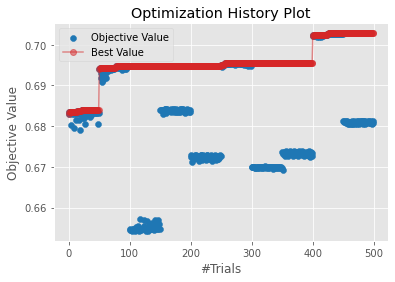

In [35]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_rf);

In [36]:
detailed_objective_rf_CV(study_rf.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.708635,0.047445
1,TP,18.400000,2.875181
2,TN,98.900000,1.286684
3,FP,1.600000,1.264911
4,FN,15.000000,3.018462
5,Accuracy,0.876046,0.029402
6,Precision,0.917263,0.068111
7,Sensitivity,0.551270,0.087999
8,Specificity,0.984090,0.012556
9,F1 score,0.686719,0.083188


In [37]:
mat_met_rf_test['ave'] = mat_met_rf_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_rf_test['std'] = mat_met_rf_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_rf_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.664931,0.654276,0.707219,0.683312,0.689703,0.667321,0.720339,0.703685,0.538120,0.751779,0.678069,0.057085
1,TP,39.000000,42.000000,37.000000,31.000000,29.000000,30.000000,36.000000,34.000000,31.000000,38.000000,34.700000,4.372896
2,TN,199.000000,198.000000,198.000000,198.000000,198.000000,200.000000,201.000000,202.000000,199.000000,200.000000,199.300000,1.418136
3,FP,2.000000,3.000000,3.000000,2.000000,5.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.300000,1.251666
4,FN,28.000000,25.000000,30.000000,37.000000,36.000000,37.000000,30.000000,31.000000,35.000000,28.000000,31.700000,4.270051
5,Accuracy,0.888060,0.895522,0.876866,0.854478,0.847015,0.858209,0.884328,0.880597,0.858209,0.888060,0.873134,0.017054
6,Precision,0.951220,0.933333,0.925000,0.939394,0.852941,0.967742,0.972973,0.971429,0.911765,0.950000,0.937580,0.035991
7,Sensitivity,0.582090,0.626866,0.552239,0.455882,0.446154,0.447761,0.545455,0.523077,0.469697,0.575758,0.522498,0.064405
8,Specificity,0.990000,0.985100,0.985100,0.990000,0.975400,0.995000,0.995000,0.995100,0.985100,0.990100,0.988590,0.006158
9,F1 score,0.722222,0.750000,0.691589,0.613861,0.585859,0.612245,0.699029,0.680000,0.620000,0.716981,0.669179,0.056572


In [38]:
#change to fit into these X values 

TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)


r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []
data_rf=pd.DataFrame()

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_rf = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=24, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )
        optimizedCV_rf.fit(X_train,
                          y_train, 
                          
                  )
        #print(test_idx)
        y_pred_optimized_rf = optimizedCV_rf.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_rf': y_pred_optimized_rf } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_rf_cat = np.where(((y_pred_optimized_rf >= 2) | (y_pred_optimized_rf <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_rf_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_rf))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_rf_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_rf_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_rf_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_rf_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_rf_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_rf_cat))
    data_rf['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_rf['y_test' + str(i)] = data_inner['y_test']
    data_rf['y_pred_rf' + str(i)] = data_inner['y_pred_rf']
   # data_rf['correct' + str(i)] = correct_value
   # data_rf['pred' + str(i)] = y_pred_optimized_rf

mat_met_optimized_rf = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


rf_run0 = data_rf[['y_test_idx0', 'y_test0', 'y_pred_rf0']]
rf_run0.sort_values(by='y_test_idx0', inplace=True)
rf_run0.reset_index(inplace=True, drop=True)
rf_run1 = data_rf[['y_test_idx1', 'y_test1', 'y_pred_rf1']]
rf_run1.sort_values(by='y_test_idx1', inplace=True)
rf_run1.reset_index(inplace=True, drop=True)
rf_run2 = data_rf[['y_test_idx2', 'y_test2', 'y_pred_rf2']]
rf_run2.sort_values(by='y_test_idx2', inplace=True)
rf_run2.reset_index(inplace=True, drop=True)
rf_run3 = data_rf[['y_test_idx3', 'y_test3', 'y_pred_rf3']]
rf_run3.sort_values(by='y_test_idx3', inplace=True)
rf_run3.reset_index(inplace=True, drop=True)
rf_run4 = data_rf[['y_test_idx4', 'y_test4', 'y_pred_rf4']]
rf_run4.sort_values(by='y_test_idx4', inplace=True)
rf_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
rf_5preds = pd.concat([chembl_id, rf_run0, rf_run1, rf_run2, rf_run3, rf_run4], axis=1)
rf_5preds = rf_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_rf0', 'y_pred_rf1', 'y_pred_rf2', 'y_pred_rf3', 'y_pred_rf4']]
rf_5preds['y_pred_rf_ave'] = rf_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
rf_5preds['y_pred_rf_std'] = rf_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
rf_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_rf0,y_pred_rf1,y_pred_rf2,y_pred_rf3,y_pred_rf4,y_pred_rf_ave,y_pred_rf_std
0,CHEMBL4635479,0,0.42,0.628772,0.690295,0.696064,0.655359,0.329563,0.570009,0.142252
1,CHEMBL4299417,1,0.98,0.712597,0.800683,0.823726,0.830335,0.845462,0.832134,0.078945
2,CHEMBL4225331,2,0.84,1.357470,1.424734,1.239197,1.730763,1.214605,1.301128,0.266771
3,CHEMBL1094710,3,0.45,0.303046,0.310684,0.283235,0.284170,0.216488,0.307937,0.070417
4,CHEMBL3287256,4,-0.33,0.004404,-0.000254,0.047349,-0.045783,0.028086,-0.049366,0.128727
...,...,...,...,...,...,...,...,...,...,...
1334,CHEMBL3769491,1334,0.69,-0.371218,-0.343873,-0.436314,-0.340303,-0.465999,-0.211285,0.405717
1335,CHEMBL482095,1335,0.44,0.800808,0.678701,0.860607,0.733083,0.731552,0.707459,0.132770
1336,CHEMBL4095596,1336,0.78,0.959000,0.676354,0.501348,0.998049,1.025174,0.823321,0.190099
1337,CHEMBL4072925,1337,0.62,0.784996,0.984292,0.768792,0.606066,0.751627,0.752629,0.125199


In [39]:
mat_met_optimized_rf

,Metric,Value (average),Value (std)
0,R2,0.702696,0.058795
1,Accuracy,0.872295,0.024554
2,Precision,0.925559,0.050158
3,Sensitivity,0.530566,0.089777
4,Specificity,0.985866,0.010089
5,F1 score,0.670588,0.079204
6,F1 score (weighted),0.858332,0.030358
7,F1 score (macro),0.795643,0.046590
8,Balanced Accuracy,0.758215,0.045759
9,MCC,0.637104,0.077303


In [40]:
rf_5preds.to_csv(output/'rf_5test_CV_result.csv')
mat_met_optimized_rf.to_csv(output/'mat_met_rf_opt.csv')

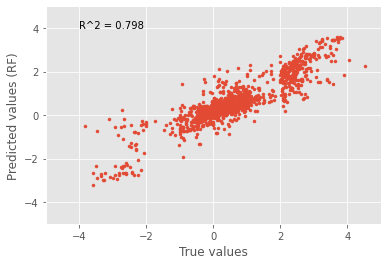

In [41]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(rf_5preds['y_test0'], rf_5preds['y_pred_rf_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (RF)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(rf_5preds['y_test0'], rf_5preds['y_pred_rf_ave'])), (-4, 4))
plt.show()

In [42]:
#cross valide using this optimized RF 
rf_baseline_CVscore = cross_val_score(rf_reg, X, Y, cv=10, scoring="r2")
#rf_opt_testSet_score = cross_val_score(optimized_rf, X, Y, cv=10, scoring="r2")
rf_opt_CVscore = cross_val_score(optimizedCV_rf, X, Y, cv=10, scoring="r2")
print("RF baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_baseline_CVscore), np.std(rf_baseline_CVscore, ddof=1)))
#print("RF optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (rf_opt_testSet_score.mean(), rf_opt_testSet_score.std()))
print("RF optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_opt_CVscore), np.std(rf_opt_CVscore, ddof=1)))

RF baseline model r2_score 0.6905 with a standard deviation of 0.0610
RF optimized model r2_score 0.6941 with a standard deviation of 0.0577


In [43]:
import joblib
joblib.dump(rf_reg, output/"rf_reg.joblib")
#joblib.dump(optimized_rf, output/"optimized_rf.joblib") # fitted to whole training set with last random_state selected
joblib.dump(optimizedCV_rf, output/"optimizedCV_rf.joblib")

['./optimizedCV_rf_noSemiSel.joblib']

## LGBMRegressor

In [44]:
%%time


r2_scores = np.empty(10)
TP=np.empty(10)
TN = np.empty(10)
FP= np.empty(10)
FN= np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W=np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        
        lgbm_reg = lgbm.LGBMRegressor(
        objective="regression",
        random_state=1121218,
        #n_estimators=150,
        boosting_type ="gbdt",  # default histogram binning of LGBM,
        n_jobs=24,
        #min_child_samples = 15,
        subsample=0.8, # also called bagging_fraction
        subsample_freq=10,
     
           )


        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_reg.fit(
                    X_train,
                    y_train,
                    eval_set=eval_set,
                    eval_metric="rmse",
                    #early_stopping_rounds=150,
                    verbose=False,
                    )

        y_pred = lgbm_reg.predict(X_test) 
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met_lgbm = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
print(mat_met_lgbm)

                 Metric  Value (average)  Value (std)
0                    R2         0.699810     0.055438
1                    TP        19.000000     3.265986
2                    TN        98.600000     1.429841
3                    FP         1.900000     1.449138
4                    FN        14.400000     3.272783
5              Accuracy         0.878274     0.029624
6             Precision         0.908215     0.072478
7           Sensitivity         0.568912     0.096940
8           Specificity         0.981110     0.014399
9              F1 score         0.696489     0.084504
10  F1 score (weighted)         0.867119     0.034401
11     F1 score (macro)         0.810150     0.051097
12    Balanced Accuracy         0.775010     0.051353
13                  MCC         0.654569     0.093029
14                  NPV         0.873130     0.026212
15              ROC_AUC         0.775010     0.051353
CPU times: user 3min 8s, sys: 141 ms, total: 3min 8s
Wall time: 9.7 s


In [45]:
import optuna  

def objective_lgbm_CV(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        }
  
    
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMRegressor(objective="regression", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=24,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)

In [46]:
#this is basically inner set parameters
def detailed_objective_lgbm_cv(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        
    }
    
    
    
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M =np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMRegressor(objective="regression", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=24,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
         # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    print(mat_met)

In [47]:
#Execute optuna and set hyperparameters
study_lgbm = optuna.create_study(direction='maximize', study_name="lgbmRegressor")
func_lgbm_0 = lambda trial: objective_lgbm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_lgbm.optimize(func_lgbm_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 21:32:19,628] A new study created in memory with name: lgbmRegressor
[I 2023-02-21 21:32:25,217] Trial 0 finished with value: 0.655678962422538 and parameters: {'n_estimators': 295, 'learning_rate': 0.1438258242479013, 'max_depth': 9, 'max_bin': 273, 'num_leaves': 497}. Best is trial 0 with value: 0.655678962422538.
[I 2023-02-21 21:32:31,493] Trial 1 finished with value: 0.6488532665754951 and parameters: {'n_estimators': 423, 'learning_rate': 0.17801848518046437, 'max_depth': 8, 'max_bin': 240, 'num_leaves': 643}. Best is trial 0 with value: 0.655678962422538.
[I 2023-02-21 21:32:40,645] Trial 2 finished with value: 0.6546774641544368 and parameters: {'n_estimators': 825, 'learning_rate': 0.09965433396080157, 'max_depth': 6, 'max_bin': 216, 'num_leaves': 620}. Best is trial 0 with value: 0.655678962422538.
[I 2023-02-21 21:32:49,295] Trial 3 finished with value: 0.6586694733670738 and parameters: {'n_estimators': 678, 'learning_rate': 0.1999705798781728, 'max_depth': 10

[I 2023-02-21 21:39:34,610] Trial 31 finished with value: 0.673905636070432 and parameters: {'n_estimators': 549, 'learning_rate': 0.0247734809129036, 'max_depth': 12, 'max_bin': 212, 'num_leaves': 353}. Best is trial 20 with value: 0.6753749598595974.
[I 2023-02-21 21:39:50,523] Trial 32 finished with value: 0.669054436560865 and parameters: {'n_estimators': 537, 'learning_rate': 0.02227420850987863, 'max_depth': 11, 'max_bin': 214, 'num_leaves': 369}. Best is trial 20 with value: 0.6753749598595974.
[I 2023-02-21 21:40:05,290] Trial 33 finished with value: 0.6711180028071427 and parameters: {'n_estimators': 471, 'learning_rate': 0.04783120599460376, 'max_depth': 12, 'max_bin': 224, 'num_leaves': 451}. Best is trial 20 with value: 0.6753749598595974.
[I 2023-02-21 21:40:16,593] Trial 34 finished with value: 0.6677440271000874 and parameters: {'n_estimators': 375, 'learning_rate': 0.07289809987918949, 'max_depth': 10, 'max_bin': 213, 'num_leaves': 578}. Best is trial 20 with value: 0.6

	Number of trials: 50.0
	Best value (r2_score): 0.6754
	Best params:
		n_estimators: 531
		learning_rate: 0.03639254208354144
		max_depth: 11
		max_bin: 208
		num_leaves: 343


In [48]:
optimized_lgbm_0 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
                                         
    
eval_set = [(X_testSet0, Y_testSet0)]
optimized_lgbm_0.fit(X_trainSet0,
                Y_trainSet0,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_0 = optimized_lgbm_0.predict(X_testSet0)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet0, y_pred_lgbm_0)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_0_cat = np.where(((y_pred_lgbm_0 >= 2) | (y_pred_lgbm_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_lgbm_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_lgbm_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_lgbm_0_cat)


mat_met_lgbm_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_lgbm_test)



                 Metric        Set0
0                    R2    0.686631
1                    TP   42.000000
2                    TN  199.000000
3                    FP    2.000000
4                    FN   25.000000
5              Accuracy    0.899254
6             Precision    0.954545
7           Sensitivity    0.626866
8           Specificity    0.990000
9              F1 score    0.756757
10  F1 score (weighted)    0.891542
11     F1 score (macro)    0.846614
12    Balanced Accuracy    0.808458
13                  MCC    0.721125
14                  NPV    0.888400
15              ROC_AUC    0.808458


In [49]:
#Execute optuna and set hyperparameters

func_lgbm_1 = lambda trial: objective_lgbm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_lgbm.optimize(func_lgbm_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 21:44:04,854] Trial 50 finished with value: 0.6820300961495451 and parameters: {'n_estimators': 604, 'learning_rate': 0.09406271344650544, 'max_depth': 11, 'max_bin': 219, 'num_leaves': 653}. Best is trial 50 with value: 0.6820300961495451.
[I 2023-02-21 21:44:15,699] Trial 51 finished with value: 0.666215768220333 and parameters: {'n_estimators': 615, 'learning_rate': 0.1324088634236345, 'max_depth': 11, 'max_bin': 220, 'num_leaves': 694}. Best is trial 50 with value: 0.6820300961495451.
[I 2023-02-21 21:44:26,913] Trial 52 finished with value: 0.6811506256716553 and parameters: {'n_estimators': 568, 'learning_rate': 0.0910735018276129, 'max_depth': 11, 'max_bin': 233, 'num_leaves': 657}. Best is trial 50 with value: 0.6820300961495451.
[I 2023-02-21 21:44:37,623] Trial 53 finished with value: 0.6693742260774407 and parameters: {'n_estimators': 586, 'learning_rate': 0.0944741178939212, 'max_depth': 10, 'max_bin': 236, 'num_leaves': 648}. Best is trial 50 with value: 0.68

[I 2023-02-21 21:50:24,182] Trial 81 finished with value: 0.6807801221402856 and parameters: {'n_estimators': 884, 'learning_rate': 0.08133789312589723, 'max_depth': 12, 'max_bin': 240, 'num_leaves': 729}. Best is trial 54 with value: 0.6861088705303288.
[I 2023-02-21 21:50:38,533] Trial 82 finished with value: 0.6814743061184945 and parameters: {'n_estimators': 873, 'learning_rate': 0.08288261862046414, 'max_depth': 12, 'max_bin': 237, 'num_leaves': 676}. Best is trial 54 with value: 0.6861088705303288.
[I 2023-02-21 21:50:52,210] Trial 83 finished with value: 0.6764276313945213 and parameters: {'n_estimators': 891, 'learning_rate': 0.08195425612705806, 'max_depth': 12, 'max_bin': 239, 'num_leaves': 651}. Best is trial 54 with value: 0.6861088705303288.
[I 2023-02-21 21:51:06,466] Trial 84 finished with value: 0.6756220948699165 and parameters: {'n_estimators': 870, 'learning_rate': 0.1020871084279781, 'max_depth': 12, 'max_bin': 220, 'num_leaves': 681}. Best is trial 54 with value: 0

	Number of trials: 100.0
	Best value (r2_score): 0.6872
	Best params:
		n_estimators: 876
		learning_rate: 0.07786588374393016
		max_depth: 12
		max_bin: 222
		num_leaves: 657


In [50]:
optimized_lgbm_1 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_lgbm_1.fit(X_trainSet1,
                Y_trainSet1,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_1 = optimized_lgbm_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_lgbm_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_1_cat = np.where(((y_pred_lgbm_1 >= 2) | (y_pred_lgbm_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_lgbm_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_lgbm_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_lgbm_1_cat)


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set1'] =set1
print(mat_met_lgbm_test)


                 Metric        Set0        Set1
0                    R2    0.686631    0.637557
1                    TP   42.000000   37.000000
2                    TN  199.000000  198.000000
3                    FP    2.000000    3.000000
4                    FN   25.000000   30.000000
5              Accuracy    0.899254    0.876866
6             Precision    0.954545    0.925000
7           Sensitivity    0.626866    0.552239
8           Specificity    0.990000    0.985100
9              F1 score    0.756757    0.691589
10  F1 score (weighted)    0.891542    0.865205
11     F1 score (macro)    0.846614    0.807333
12    Balanced Accuracy    0.808458    0.768657
13                  MCC    0.721125    0.652929
14                  NPV    0.888400    0.868400
15              ROC_AUC    0.808458    0.768657


In [51]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_2 = lambda trial: objective_lgbm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_lgbm.optimize(func_lgbm_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 21:54:44,417] Trial 100 finished with value: 0.6321194031368945 and parameters: {'n_estimators': 854, 'learning_rate': 0.08640935851884363, 'max_depth': 5, 'max_bin': 215, 'num_leaves': 600}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 21:54:56,233] Trial 101 finished with value: 0.6529095057221193 and parameters: {'n_estimators': 884, 'learning_rate': 0.09579353812296142, 'max_depth': 12, 'max_bin': 235, 'num_leaves': 659}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 21:55:10,530] Trial 102 finished with value: 0.6517552241038189 and parameters: {'n_estimators': 828, 'learning_rate': 0.08329795126649224, 'max_depth': 12, 'max_bin': 222, 'num_leaves': 729}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 21:55:20,187] Trial 103 finished with value: 0.6542721680287045 and parameters: {'n_estimators': 459, 'learning_rate': 0.06361708290358221, 'max_depth': 12, 'max_bin': 227, 'num_leaves': 632}. Best is trial 98 with valu

[I 2023-02-21 22:00:57,935] Trial 131 finished with value: 0.6463407640291637 and parameters: {'n_estimators': 556, 'learning_rate': 0.10393256601543126, 'max_depth': 11, 'max_bin': 255, 'num_leaves': 735}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 22:01:07,926] Trial 132 finished with value: 0.6485215914391257 and parameters: {'n_estimators': 638, 'learning_rate': 0.09707465357233055, 'max_depth': 11, 'max_bin': 247, 'num_leaves': 643}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 22:01:18,800] Trial 133 finished with value: 0.6544335314168924 and parameters: {'n_estimators': 609, 'learning_rate': 0.11539290806078889, 'max_depth': 11, 'max_bin': 239, 'num_leaves': 676}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 22:01:26,867] Trial 134 finished with value: 0.6508786073228962 and parameters: {'n_estimators': 816, 'learning_rate': 0.10727767531163797, 'max_depth': 12, 'max_bin': 231, 'num_leaves': 706}. Best is trial 98 with val

	Number of trials: 150.0
	Best value (r2_score): 0.6872
	Best params:
		n_estimators: 876
		learning_rate: 0.07786588374393016
		max_depth: 12
		max_bin: 222
		num_leaves: 657


In [52]:
optimized_lgbm_2 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet2, Y_testSet2)]
optimized_lgbm_2.fit(X_trainSet2,
                Y_trainSet2,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_2 = optimized_lgbm_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_lgbm_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_2_cat = np.where(((y_pred_lgbm_2 >= 2) | (y_pred_lgbm_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_lgbm_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_lgbm_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_lgbm_2_cat)


Set2 = pd.DataFrame({ 'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set2'] = Set2
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.686631    0.637557    0.707517
1                    TP   42.000000   37.000000   39.000000
2                    TN  199.000000  198.000000  198.000000
3                    FP    2.000000    3.000000    3.000000
4                    FN   25.000000   30.000000   28.000000
5              Accuracy    0.899254    0.876866    0.884328
6             Precision    0.954545    0.925000    0.928571
7           Sensitivity    0.626866    0.552239    0.582090
8           Specificity    0.990000    0.985100    0.985100
9              F1 score    0.756757    0.691589    0.715596
10  F1 score (weighted)    0.891542    0.865205    0.874449
11     F1 score (macro)    0.846614    0.807333    0.821498
12    Balanced Accuracy    0.808458    0.768657    0.783582
13                  MCC    0.721125    0.652929    0.675562
14                  NPV    0.888400    0.868400    0.876100
15              ROC_AUC    0.808458    0

In [53]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_3 = lambda trial: objective_lgbm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_lgbm.optimize(func_lgbm_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 22:04:35,506] Trial 150 finished with value: 0.6806522748093136 and parameters: {'n_estimators': 791, 'learning_rate': 0.08319829681911237, 'max_depth': 12, 'max_bin': 232, 'num_leaves': 660}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 22:04:48,341] Trial 151 finished with value: 0.6846815283693377 and parameters: {'n_estimators': 790, 'learning_rate': 0.08397143771540523, 'max_depth': 12, 'max_bin': 231, 'num_leaves': 655}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 22:05:01,317] Trial 152 finished with value: 0.6801693182381141 and parameters: {'n_estimators': 780, 'learning_rate': 0.08347130600257759, 'max_depth': 12, 'max_bin': 231, 'num_leaves': 653}. Best is trial 98 with value: 0.6871978169312094.
[I 2023-02-21 22:05:16,248] Trial 153 finished with value: 0.6872552462516891 and parameters: {'n_estimators': 780, 'learning_rate': 0.08276532508888751, 'max_depth': 12, 'max_bin': 232, 'num_leaves': 632}. Best is trial 153 with va

[I 2023-02-21 22:11:04,735] Trial 181 finished with value: 0.6853093183572452 and parameters: {'n_estimators': 775, 'learning_rate': 0.08526262299916779, 'max_depth': 12, 'max_bin': 267, 'num_leaves': 558}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:11:20,373] Trial 182 finished with value: 0.6798496329778626 and parameters: {'n_estimators': 729, 'learning_rate': 0.07887149876908589, 'max_depth': 12, 'max_bin': 264, 'num_leaves': 554}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:11:34,620] Trial 183 finished with value: 0.6823030129058265 and parameters: {'n_estimators': 686, 'learning_rate': 0.08457432578223757, 'max_depth': 12, 'max_bin': 273, 'num_leaves': 563}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:11:46,705] Trial 184 finished with value: 0.6815048615547483 and parameters: {'n_estimators': 779, 'learning_rate': 0.09297354663749144, 'max_depth': 12, 'max_bin': 258, 'num_leaves': 535}. Best is trial 153 with

	Number of trials: 200.0
	Best value (r2_score): 0.6873
	Best params:
		n_estimators: 780
		learning_rate: 0.08276532508888751
		max_depth: 12
		max_bin: 232
		num_leaves: 632


In [54]:
optimized_lgbm_3 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet3, Y_testSet3)]
optimized_lgbm_3.fit(X_trainSet3,
                Y_trainSet3,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_3 = optimized_lgbm_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_lgbm_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_3_cat = np.where(((y_pred_lgbm_3 >= 2) | (y_pred_lgbm_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_lgbm_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_lgbm_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_lgbm_3_cat)


Set3 = pd.DataFrame({ 'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set3'] = Set3
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.686631    0.637557    0.707517    0.672644
1                    TP   42.000000   37.000000   39.000000   34.000000
2                    TN  199.000000  198.000000  198.000000  195.000000
3                    FP    2.000000    3.000000    3.000000    5.000000
4                    FN   25.000000   30.000000   28.000000   34.000000
5              Accuracy    0.899254    0.876866    0.884328    0.854478
6             Precision    0.954545    0.925000    0.928571    0.871795
7           Sensitivity    0.626866    0.552239    0.582090    0.500000
8           Specificity    0.990000    0.985100    0.985100    0.975000
9              F1 score    0.756757    0.691589    0.715596    0.635514
10  F1 score (weighted)    0.891542    0.865205    0.874449    0.839676
11     F1 score (macro)    0.846614    0.807333    0.821498    0.772302
12    Balanced Accuracy    0.808458    0.768657    0.783582    0

In [55]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_4 = lambda trial: objective_lgbm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_lgbm.optimize(func_lgbm_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 22:15:13,130] Trial 200 finished with value: 0.6736237174199573 and parameters: {'n_estimators': 749, 'learning_rate': 0.10089471295193461, 'max_depth': 12, 'max_bin': 256, 'num_leaves': 532}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:15:27,271] Trial 201 finished with value: 0.6715554661815374 and parameters: {'n_estimators': 797, 'learning_rate': 0.08984582163668478, 'max_depth': 12, 'max_bin': 251, 'num_leaves': 571}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:15:40,217] Trial 202 finished with value: 0.667341050622851 and parameters: {'n_estimators': 778, 'learning_rate': 0.08137875151071908, 'max_depth': 12, 'max_bin': 259, 'num_leaves': 572}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:15:51,374] Trial 203 finished with value: 0.6705201857731982 and parameters: {'n_estimators': 736, 'learning_rate': 0.08553079386305011, 'max_depth': 12, 'max_bin': 267, 'num_leaves': 622}. Best is trial 153 with 

[I 2023-02-21 22:21:53,180] Trial 231 finished with value: 0.6770576182236511 and parameters: {'n_estimators': 751, 'learning_rate': 0.09273288556985611, 'max_depth': 12, 'max_bin': 252, 'num_leaves': 594}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:22:02,545] Trial 232 finished with value: 0.6717583403510112 and parameters: {'n_estimators': 777, 'learning_rate': 0.08699328106686258, 'max_depth': 12, 'max_bin': 227, 'num_leaves': 579}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:22:10,831] Trial 233 finished with value: 0.6734800028506355 and parameters: {'n_estimators': 792, 'learning_rate': 0.09143851252501521, 'max_depth': 12, 'max_bin': 256, 'num_leaves': 610}. Best is trial 153 with value: 0.6872552462516891.
[I 2023-02-21 22:22:24,671] Trial 234 finished with value: 0.6717584049154421 and parameters: {'n_estimators': 760, 'learning_rate': 0.09788818352467558, 'max_depth': 12, 'max_bin': 241, 'num_leaves': 554}. Best is trial 153 with

	Number of trials: 250.0
	Best value (r2_score): 0.6873
	Best params:
		n_estimators: 780
		learning_rate: 0.08276532508888751
		max_depth: 12
		max_bin: 232
		num_leaves: 632


In [56]:
optimized_lgbm_4 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet4, Y_testSet4)]
optimized_lgbm_4.fit(X_trainSet4,
                Y_trainSet4,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_4 = optimized_lgbm_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_lgbm_4)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_4_cat = np.where(((y_pred_lgbm_4 >= 2) | (y_pred_lgbm_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_lgbm_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_lgbm_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_lgbm_4_cat)


Set4 = pd.DataFrame({ 'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set4'] = Set4
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686631    0.637557    0.707517    0.672644   
1                    TP   42.000000   37.000000   39.000000   34.000000   
2                    TN  199.000000  198.000000  198.000000  195.000000   
3                    FP    2.000000    3.000000    3.000000    5.000000   
4                    FN   25.000000   30.000000   28.000000   34.000000   
5              Accuracy    0.899254    0.876866    0.884328    0.854478   
6             Precision    0.954545    0.925000    0.928571    0.871795   
7           Sensitivity    0.626866    0.552239    0.582090    0.500000   
8           Specificity    0.990000    0.985100    0.985100    0.975000   
9              F1 score    0.756757    0.691589    0.715596    0.635514   
10  F1 score (weighted)    0.891542    0.865205    0.874449    0.839676   
11     F1 score (macro)    0.846614    0.807333    0.821498    0.772302   
12    Balanced Accuracy  

In [57]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_5 = lambda trial: objective_lgbm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_lgbm.optimize(func_lgbm_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 22:25:53,524] Trial 250 finished with value: 0.7027502729362436 and parameters: {'n_estimators': 733, 'learning_rate': 0.08119676559665331, 'max_depth': 12, 'max_bin': 247, 'num_leaves': 560}. Best is trial 250 with value: 0.7027502729362436.
[I 2023-02-21 22:26:03,629] Trial 251 finished with value: 0.7014544415246926 and parameters: {'n_estimators': 732, 'learning_rate': 0.08601511900708012, 'max_depth': 12, 'max_bin': 246, 'num_leaves': 576}. Best is trial 250 with value: 0.7027502729362436.
[I 2023-02-21 22:26:14,501] Trial 252 finished with value: 0.6992079361836623 and parameters: {'n_estimators': 710, 'learning_rate': 0.08118937140442721, 'max_depth': 12, 'max_bin': 247, 'num_leaves': 576}. Best is trial 250 with value: 0.7027502729362436.
[I 2023-02-21 22:26:28,416] Trial 253 finished with value: 0.7043361904301031 and parameters: {'n_estimators': 723, 'learning_rate': 0.08632504158407418, 'max_depth': 12, 'max_bin': 246, 'num_leaves': 579}. Best is trial 253 with

[I 2023-02-21 22:30:53,888] Trial 281 finished with value: 0.7000206471738574 and parameters: {'n_estimators': 619, 'learning_rate': 0.06447356360909914, 'max_depth': 7, 'max_bin': 247, 'num_leaves': 468}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:31:04,333] Trial 282 finished with value: 0.6971005397651833 and parameters: {'n_estimators': 622, 'learning_rate': 0.057787711127494396, 'max_depth': 7, 'max_bin': 248, 'num_leaves': 470}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:31:16,596] Trial 283 finished with value: 0.700366852219874 and parameters: {'n_estimators': 619, 'learning_rate': 0.06150122704127495, 'max_depth': 7, 'max_bin': 247, 'num_leaves': 456}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:31:29,244] Trial 284 finished with value: 0.6959255738651501 and parameters: {'n_estimators': 624, 'learning_rate': 0.05864445902729336, 'max_depth': 7, 'max_bin': 247, 'num_leaves': 468}. Best is trial 256 with val

	Number of trials: 300.0
	Best value (r2_score): 0.7068
	Best params:
		n_estimators: 701
		learning_rate: 0.08489109033868533
		max_depth: 12
		max_bin: 246
		num_leaves: 575


In [58]:
optimized_lgbm_5 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet5, Y_testSet5)]
optimized_lgbm_5.fit(X_trainSet5,
                Y_trainSet5,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_5 = optimized_lgbm_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_lgbm_5)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_5_cat = np.where(((y_pred_lgbm_5 >= 2) | (y_pred_lgbm_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_lgbm_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_lgbm_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_lgbm_5_cat)


Set5 = pd.DataFrame({ 'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set5'] = Set5
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686631    0.637557    0.707517    0.672644   
1                    TP   42.000000   37.000000   39.000000   34.000000   
2                    TN  199.000000  198.000000  198.000000  195.000000   
3                    FP    2.000000    3.000000    3.000000    5.000000   
4                    FN   25.000000   30.000000   28.000000   34.000000   
5              Accuracy    0.899254    0.876866    0.884328    0.854478   
6             Precision    0.954545    0.925000    0.928571    0.871795   
7           Sensitivity    0.626866    0.552239    0.582090    0.500000   
8           Specificity    0.990000    0.985100    0.985100    0.975000   
9              F1 score    0.756757    0.691589    0.715596    0.635514   
10  F1 score (weighted)    0.891542    0.865205    0.874449    0.839676   
11     F1 score (macro)    0.846614    0.807333    0.821498    0.772302   
12    Balanced Accuracy  

In [59]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_6 = lambda trial: objective_lgbm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_lgbm.optimize(func_lgbm_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.6f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 22:34:43,894] Trial 300 finished with value: 0.6532547113681697 and parameters: {'n_estimators': 578, 'learning_rate': 0.045403953254718535, 'max_depth': 8, 'max_bin': 250, 'num_leaves': 394}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:34:50,928] Trial 301 finished with value: 0.6461960028635751 and parameters: {'n_estimators': 608, 'learning_rate': 0.04894661521683459, 'max_depth': 6, 'max_bin': 248, 'num_leaves': 408}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:35:04,003] Trial 302 finished with value: 0.6551955972524688 and parameters: {'n_estimators': 588, 'learning_rate': 0.06247274291162796, 'max_depth': 7, 'max_bin': 251, 'num_leaves': 438}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:35:16,330] Trial 303 finished with value: 0.6573713957820153 and parameters: {'n_estimators': 614, 'learning_rate': 0.05199268780565596, 'max_depth': 7, 'max_bin': 249, 'num_leaves': 442}. Best is trial 256 with va

[I 2023-02-21 22:40:04,347] Trial 331 finished with value: 0.6561816779617251 and parameters: {'n_estimators': 602, 'learning_rate': 0.06207384347651529, 'max_depth': 7, 'max_bin': 246, 'num_leaves': 423}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:40:11,061] Trial 332 finished with value: 0.6532214204671243 and parameters: {'n_estimators': 662, 'learning_rate': 0.051332430450651424, 'max_depth': 7, 'max_bin': 248, 'num_leaves': 478}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:40:16,752] Trial 333 finished with value: 0.6566646866270982 and parameters: {'n_estimators': 633, 'learning_rate': 0.05603915857613402, 'max_depth': 7, 'max_bin': 157, 'num_leaves': 334}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:40:25,158] Trial 334 finished with value: 0.6527310067305778 and parameters: {'n_estimators': 619, 'learning_rate': 0.04692140482122665, 'max_depth': 7, 'max_bin': 245, 'num_leaves': 386}. Best is trial 256 with va

	Number of trials: 350.0
	Best value (r2_score): 0.706842
	Best params:
		n_estimators: 701
		learning_rate: 0.08489109033868533
		max_depth: 12
		max_bin: 246
		num_leaves: 575


In [60]:
optimized_lgbm_6 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet6, Y_testSet6)]
optimized_lgbm_6.fit(X_trainSet6,
                Y_trainSet6,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_6 = optimized_lgbm_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_lgbm_6)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_6_cat = np.where(((y_pred_lgbm_6 >= 2) | (y_pred_lgbm_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_lgbm_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_lgbm_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_lgbm_6_cat)


Set6 = pd.DataFrame({ 'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set6'] = Set6
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686631    0.637557    0.707517    0.672644   
1                    TP   42.000000   37.000000   39.000000   34.000000   
2                    TN  199.000000  198.000000  198.000000  195.000000   
3                    FP    2.000000    3.000000    3.000000    5.000000   
4                    FN   25.000000   30.000000   28.000000   34.000000   
5              Accuracy    0.899254    0.876866    0.884328    0.854478   
6             Precision    0.954545    0.925000    0.928571    0.871795   
7           Sensitivity    0.626866    0.552239    0.582090    0.500000   
8           Specificity    0.990000    0.985100    0.985100    0.975000   
9              F1 score    0.756757    0.691589    0.715596    0.635514   
10  F1 score (weighted)    0.891542    0.865205    0.874449    0.839676   
11     F1 score (macro)    0.846614    0.807333    0.821498    0.772302   
12    Balanced Accuracy  

In [61]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_7 = lambda trial: objective_lgbm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_lgbm.optimize(func_lgbm_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.7f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 22:42:26,477] Trial 350 finished with value: 0.6556291139010388 and parameters: {'n_estimators': 669, 'learning_rate': 0.03764507281013106, 'max_depth': 7, 'max_bin': 245, 'num_leaves': 393}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:42:34,152] Trial 351 finished with value: 0.6591841800369367 and parameters: {'n_estimators': 693, 'learning_rate': 0.059117705114525326, 'max_depth': 7, 'max_bin': 250, 'num_leaves': 453}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:42:40,412] Trial 352 finished with value: 0.6592236785608953 and parameters: {'n_estimators': 613, 'learning_rate': 0.063334813525141, 'max_depth': 7, 'max_bin': 242, 'num_leaves': 483}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:42:47,270] Trial 353 finished with value: 0.6588777318079575 and parameters: {'n_estimators': 570, 'learning_rate': 0.05067879574007252, 'max_depth': 7, 'max_bin': 238, 'num_leaves': 410}. Best is trial 256 with valu

[I 2023-02-21 22:45:45,673] Trial 381 finished with value: 0.6650855599440224 and parameters: {'n_estimators': 548, 'learning_rate': 0.035253477670534716, 'max_depth': 9, 'max_bin': 250, 'num_leaves': 498}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:45:52,376] Trial 382 finished with value: 0.6299181977758006 and parameters: {'n_estimators': 724, 'learning_rate': 0.050467470102115566, 'max_depth': 3, 'max_bin': 169, 'num_leaves': 445}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:45:56,542] Trial 383 finished with value: 0.6602787237894374 and parameters: {'n_estimators': 598, 'learning_rate': 0.06203491236201535, 'max_depth': 7, 'max_bin': 254, 'num_leaves': 369}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:46:05,114] Trial 384 finished with value: 0.6553156653102847 and parameters: {'n_estimators': 657, 'learning_rate': 0.04552262535433253, 'max_depth': 7, 'max_bin': 244, 'num_leaves': 292}. Best is trial 256 with v

	Number of trials: 400.0
	Best value (r2_score): 0.7068424
	Best params:
		n_estimators: 701
		learning_rate: 0.08489109033868533
		max_depth: 12
		max_bin: 246
		num_leaves: 575


In [62]:
optimized_lgbm_7 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet7, Y_testSet7)]
optimized_lgbm_7.fit(X_trainSet7,
                Y_trainSet7,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_7 = optimized_lgbm_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_lgbm_7)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_7_cat = np.where(((y_pred_lgbm_7 >= 2) | (y_pred_lgbm_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_lgbm_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_lgbm_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_lgbm_7_cat)


Set7 = pd.DataFrame({ 'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set7'] = Set7
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686631    0.637557    0.707517    0.672644   
1                    TP   42.000000   37.000000   39.000000   34.000000   
2                    TN  199.000000  198.000000  198.000000  195.000000   
3                    FP    2.000000    3.000000    3.000000    5.000000   
4                    FN   25.000000   30.000000   28.000000   34.000000   
5              Accuracy    0.899254    0.876866    0.884328    0.854478   
6             Precision    0.954545    0.925000    0.928571    0.871795   
7           Sensitivity    0.626866    0.552239    0.582090    0.500000   
8           Specificity    0.990000    0.985100    0.985100    0.975000   
9              F1 score    0.756757    0.691589    0.715596    0.635514   
10  F1 score (weighted)    0.891542    0.865205    0.874449    0.839676   
11     F1 score (macro)    0.846614    0.807333    0.821498    0.772302   
12    Balanced Accuracy  

In [63]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_8 = lambda trial: objective_lgbm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_lgbm.optimize(func_lgbm_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.8f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 22:48:09,916] Trial 400 finished with value: 0.6803721717048464 and parameters: {'n_estimators': 645, 'learning_rate': 0.0598835820803506, 'max_depth': 6, 'max_bin': 251, 'num_leaves': 250}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:48:17,208] Trial 401 finished with value: 0.68477192908236 and parameters: {'n_estimators': 628, 'learning_rate': 0.06904167617097677, 'max_depth': 7, 'max_bin': 248, 'num_leaves': 478}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:48:25,532] Trial 402 finished with value: 0.687943462926307 and parameters: {'n_estimators': 679, 'learning_rate': 0.06531834125240246, 'max_depth': 9, 'max_bin': 245, 'num_leaves': 381}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:48:30,668] Trial 403 finished with value: 0.6850697699413898 and parameters: {'n_estimators': 607, 'learning_rate': 0.07359748569951645, 'max_depth': 7, 'max_bin': 240, 'num_leaves': 545}. Best is trial 256 with value: 

[I 2023-02-21 22:51:45,812] Trial 431 finished with value: 0.681775332972039 and parameters: {'n_estimators': 701, 'learning_rate': 0.04795806824847052, 'max_depth': 7, 'max_bin': 300, 'num_leaves': 428}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:51:54,100] Trial 432 finished with value: 0.6889097472966661 and parameters: {'n_estimators': 642, 'learning_rate': 0.07214211168259761, 'max_depth': 8, 'max_bin': 251, 'num_leaves': 370}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:51:57,647] Trial 433 finished with value: 0.6797350484987521 and parameters: {'n_estimators': 671, 'learning_rate': 0.0585840429237748, 'max_depth': 7, 'max_bin': 248, 'num_leaves': 584}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:52:05,133] Trial 434 finished with value: 0.6850876612144181 and parameters: {'n_estimators': 623, 'learning_rate': 0.06304065453170965, 'max_depth': 7, 'max_bin': 245, 'num_leaves': 400}. Best is trial 256 with value

	Number of trials: 450.0
	Best value (r2_score): 0.70684243
	Best params:
		n_estimators: 701
		learning_rate: 0.08489109033868533
		max_depth: 12
		max_bin: 246
		num_leaves: 575


In [64]:
optimized_lgbm_8 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet8, Y_testSet8)]
optimized_lgbm_8.fit(X_trainSet8,
                Y_trainSet8,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_8 = optimized_lgbm_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_lgbm_8)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_8_cat = np.where(((y_pred_lgbm_8 >= 2) | (y_pred_lgbm_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_lgbm_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_lgbm_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_lgbm_8_cat)


Set8 = pd.DataFrame({ 'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set8'] = Set8
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686631    0.637557    0.707517    0.672644   
1                    TP   42.000000   37.000000   39.000000   34.000000   
2                    TN  199.000000  198.000000  198.000000  195.000000   
3                    FP    2.000000    3.000000    3.000000    5.000000   
4                    FN   25.000000   30.000000   28.000000   34.000000   
5              Accuracy    0.899254    0.876866    0.884328    0.854478   
6             Precision    0.954545    0.925000    0.928571    0.871795   
7           Sensitivity    0.626866    0.552239    0.582090    0.500000   
8           Specificity    0.990000    0.985100    0.985100    0.975000   
9              F1 score    0.756757    0.691589    0.715596    0.635514   
10  F1 score (weighted)    0.891542    0.865205    0.874449    0.839676   
11     F1 score (macro)    0.846614    0.807333    0.821498    0.772302   
12    Balanced Accuracy  

In [65]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_9 = lambda trial: objective_lgbm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_lgbm.optimize(func_lgbm_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.9f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 22:54:04,855] Trial 450 finished with value: 0.6549855483193224 and parameters: {'n_estimators': 612, 'learning_rate': 0.06536271348038034, 'max_depth': 7, 'max_bin': 243, 'num_leaves': 487}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:54:13,577] Trial 451 finished with value: 0.6491409335238667 and parameters: {'n_estimators': 270, 'learning_rate': 0.05661670578809121, 'max_depth': 8, 'max_bin': 251, 'num_leaves': 425}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:54:22,613] Trial 452 finished with value: 0.6439664395364594 and parameters: {'n_estimators': 560, 'learning_rate': 0.06189442883277645, 'max_depth': 7, 'max_bin': 246, 'num_leaves': 513}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:54:27,950] Trial 453 finished with value: 0.6556489457767822 and parameters: {'n_estimators': 732, 'learning_rate': 0.07887348197736978, 'max_depth': 7, 'max_bin': 249, 'num_leaves': 386}. Best is trial 256 with val

[I 2023-02-21 22:57:39,915] Trial 481 finished with value: 0.6598918536525483 and parameters: {'n_estimators': 645, 'learning_rate': 0.06258415308229419, 'max_depth': 12, 'max_bin': 249, 'num_leaves': 601}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:57:50,594] Trial 482 finished with value: 0.6352485328504426 and parameters: {'n_estimators': 621, 'learning_rate': 0.04927752590764787, 'max_depth': 7, 'max_bin': 247, 'num_leaves': 416}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:58:01,379] Trial 483 finished with value: 0.6631861790167379 and parameters: {'n_estimators': 581, 'learning_rate': 0.07193714300500009, 'max_depth': 12, 'max_bin': 242, 'num_leaves': 469}. Best is trial 256 with value: 0.7068424294960505.
[I 2023-02-21 22:58:07,755] Trial 484 finished with value: 0.6453301467133687 and parameters: {'n_estimators': 608, 'learning_rate': 0.056579063295270966, 'max_depth': 7, 'max_bin': 251, 'num_leaves': 565}. Best is trial 256 with 

	Number of trials: 500.0
	Best value (r2_score): 0.706842429
	Best params:
		n_estimators: 701
		learning_rate: 0.08489109033868533
		max_depth: 12
		max_bin: 246
		num_leaves: 575


In [66]:
optimized_lgbm_9 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet9, Y_testSet9)]
optimized_lgbm_9.fit(X_trainSet9,
                Y_trainSet9,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_9 = optimized_lgbm_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_lgbm_9)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_9_cat = np.where(((y_pred_lgbm_9 >= 2) | (y_pred_lgbm_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_lgbm_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_lgbm_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_lgbm_9_cat)


Set9 = pd.DataFrame({ 'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set9'] = Set9
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686631    0.637557    0.707517    0.672644   
1                    TP   42.000000   37.000000   39.000000   34.000000   
2                    TN  199.000000  198.000000  198.000000  195.000000   
3                    FP    2.000000    3.000000    3.000000    5.000000   
4                    FN   25.000000   30.000000   28.000000   34.000000   
5              Accuracy    0.899254    0.876866    0.884328    0.854478   
6             Precision    0.954545    0.925000    0.928571    0.871795   
7           Sensitivity    0.626866    0.552239    0.582090    0.500000   
8           Specificity    0.990000    0.985100    0.985100    0.975000   
9              F1 score    0.756757    0.691589    0.715596    0.635514   
10  F1 score (weighted)    0.891542    0.865205    0.874449    0.839676   
11     F1 score (macro)    0.846614    0.807333    0.821498    0.772302   
12    Balanced Accuracy  

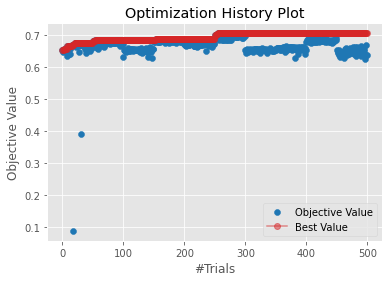

In [67]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_lgbm);

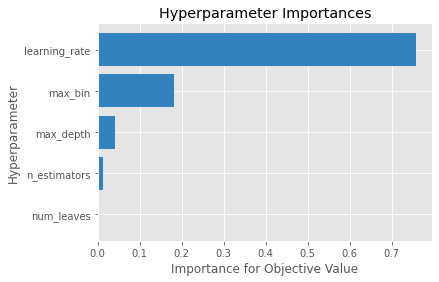

In [68]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(study_lgbm);

In [69]:
detailed_objective_lgbm_cv(study_lgbm.best_trial, X, Y, Y_class)

                 Metric  Value (average)  Value (std)
0                    R2         0.706807     0.058992
1                    TP        19.100000     4.532598
2                    TN        98.800000     1.316561
3                    FP         1.700000     1.159502
4                    FN        14.300000     4.620005
5              Accuracy         0.880524     0.038491
6             Precision         0.912936     0.064803
7           Sensitivity         0.572215     0.136154
8           Specificity         0.983080     0.011553
9              F1 score         0.697505     0.117449
10  F1 score (weighted)         0.868529     0.046592
11     F1 score (macro)         0.811474     0.070053
12    Balanced Accuracy         0.777647     0.070419
13                  MCC         0.659419     0.120487
14                  NPV         0.874750     0.036277
15              ROC_AUC         0.777647     0.070419


In [70]:
mat_met_lgbm_test['ave'] = mat_met_lgbm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_lgbm_test['std'] = mat_met_lgbm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_lgbm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.686631,0.637557,0.707517,0.672644,0.713204,0.640578,0.702467,0.673087,0.554281,0.751018,0.673898,0.054101
1,TP,42.000000,37.000000,39.000000,34.000000,37.000000,30.000000,35.000000,40.000000,32.000000,41.000000,36.700000,3.945462
2,TN,199.000000,198.000000,198.000000,195.000000,199.000000,200.000000,200.000000,201.000000,197.000000,201.000000,198.800000,1.873796
3,FP,2.000000,3.000000,3.000000,5.000000,4.000000,1.000000,2.000000,2.000000,5.000000,1.000000,2.800000,1.475730
4,FN,25.000000,30.000000,28.000000,34.000000,28.000000,37.000000,31.000000,25.000000,34.000000,25.000000,29.700000,4.270051
5,Accuracy,0.899254,0.876866,0.884328,0.854478,0.880597,0.858209,0.876866,0.899254,0.854478,0.902985,0.878731,0.018469
6,Precision,0.954545,0.925000,0.928571,0.871795,0.902439,0.967742,0.945946,0.952381,0.864865,0.976190,0.928947,0.038473
7,Sensitivity,0.626866,0.552239,0.582090,0.500000,0.569231,0.447761,0.530303,0.615385,0.484848,0.621212,0.552993,0.061604
8,Specificity,0.990000,0.985100,0.985100,0.975000,0.980300,0.995000,0.990100,0.990100,0.975200,0.995000,0.986090,0.007328
9,F1 score,0.756757,0.691589,0.715596,0.635514,0.698113,0.612245,0.679612,0.747664,0.621359,0.759259,0.691771,0.054878


In [71]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_lgbm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_lgbm = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_lgbm.fit(X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
                          
                  
        #print(test_idx)
        y_pred_optimized_lgbm = optimizedCV_lgbm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_lgbm': y_pred_optimized_lgbm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_lgbm_cat = np.where(((y_pred_optimized_lgbm >= 2) | (y_pred_optimized_lgbm <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_lgbm_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_lgbm))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_lgbm_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_lgbm_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_lgbm_cat))
        
    data_lgbm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_lgbm['y_test' + str(i)] = data_inner['y_test']
    data_lgbm['y_pred_lgbm' + str(i)] = data_inner['y_pred_lgbm']
   # data_lgbm['correct' + str(i)] = correct_value
   # data_lgbm['pred' + str(i)] = y_pred_optimized_lgbm

mat_met_optimized_lgbm = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


lgbm_run0 = data_lgbm[['y_test_idx0', 'y_test0', 'y_pred_lgbm0']]
lgbm_run0.sort_values(by='y_test_idx0', inplace=True)
lgbm_run0.reset_index(inplace=True, drop=True)
lgbm_run1 = data_lgbm[['y_test_idx1', 'y_test1', 'y_pred_lgbm1']]
lgbm_run1.sort_values(by='y_test_idx1', inplace=True)
lgbm_run1.reset_index(inplace=True, drop=True)
lgbm_run2 = data_lgbm[['y_test_idx2', 'y_test2', 'y_pred_lgbm2']]
lgbm_run2.sort_values(by='y_test_idx2', inplace=True)
lgbm_run2.reset_index(inplace=True, drop=True)
lgbm_run3 = data_lgbm[['y_test_idx3', 'y_test3', 'y_pred_lgbm3']]
lgbm_run3.sort_values(by='y_test_idx3', inplace=True)
lgbm_run3.reset_index(inplace=True, drop=True)
lgbm_run4 = data_lgbm[['y_test_idx4', 'y_test4', 'y_pred_lgbm4']]
lgbm_run4.sort_values(by='y_test_idx4', inplace=True)
lgbm_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
lgbm_5preds = pd.concat([chembl_id, lgbm_run0, lgbm_run1, lgbm_run2, lgbm_run3, lgbm_run4], axis=1)
lgbm_5preds = lgbm_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_lgbm0', 'y_pred_lgbm1', 'y_pred_lgbm2', 'y_pred_lgbm3', 'y_pred_lgbm4']]
lgbm_5preds['y_pred_lgbm_ave'] = lgbm_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
lgbm_5preds['y_pred_lgbm_std'] = lgbm_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
lgbm_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_lgbm0,y_pred_lgbm1,y_pred_lgbm2,y_pred_lgbm3,y_pred_lgbm4,y_pred_lgbm_ave,y_pred_lgbm_std
0,CHEMBL4635479,0,0.42,0.679267,0.656525,0.752455,0.713056,0.286577,0.584647,0.170647
1,CHEMBL4299417,1,0.98,0.610825,0.678077,0.743565,0.632929,0.623071,0.711411,0.128040
2,CHEMBL4225331,2,0.84,1.593105,1.262545,1.034978,1.691965,1.817377,1.373328,0.355482
3,CHEMBL1094710,3,0.45,-0.016776,0.197949,-0.223303,-0.285149,-0.270049,-0.024555,0.271554
4,CHEMBL3287256,4,-0.33,-0.068452,-0.254472,-0.226262,0.012476,-0.014633,-0.146891,0.129386
...,...,...,...,...,...,...,...,...,...,...
1334,CHEMBL3769491,1334,0.69,-0.688502,-0.083767,-0.185900,-0.033903,-0.373522,-0.112599,0.419585
1335,CHEMBL482095,1335,0.44,0.634463,0.812666,0.540992,0.783357,0.586538,0.633003,0.130870
1336,CHEMBL4095596,1336,0.78,0.661237,1.130119,0.804389,0.982399,1.263233,0.936896,0.209787
1337,CHEMBL4072925,1337,0.62,0.707674,0.819515,0.933265,0.980230,0.756062,0.802791,0.124787


In [72]:
mat_met_optimized_lgbm.to_csv(output/'mat_met_lgbm_opt.csv')
lgbm_5preds.to_csv(output/'lgbm_5test_CV_result.csv')

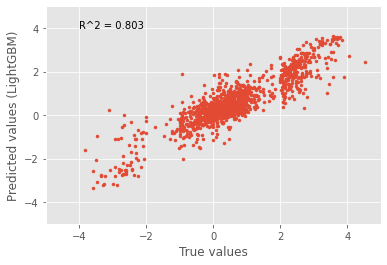

In [73]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(lgbm_5preds['y_test0'], lgbm_5preds['y_pred_lgbm_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(lgbm_5preds['y_test0'], lgbm_5preds['y_pred_lgbm_ave'])), (-4, 4))
plt.show()

In [74]:
#cross valide using this optimized LightGBM 
fit_params={'early_stopping_rounds': 50, 
        'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
            'verbose':False,
           }
#cross valide using this optimized LightGBM 
lgbm_baseline_CVscore = cross_val_score(lgbm_reg, X, Y, cv=10, scoring="r2")
#r2_cv_lgbm_opt_testSet = cross_val_score(optimized_lgbm, X, Y, cv=10, scoring="r2")
r2_cv_lgbm_opt = cross_val_score(optimizedCV_lgbm, X, Y, cv=10, scoring="r2", fit_params=fit_params)
print("LightGBM baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(lgbm_baseline_CVscore), np.std(lgbm_baseline_CVscore, ddof=1)))
#print("LightGBM optimized model (tested on Y_te)r2_score %0.4f with a standard deviation of %0.4f" % (r2_cv_lgbm_opt_testSet.mean(), r2_cv_lgbm_opt_testSet.std()))
print("LightGBM optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(r2_cv_lgbm_opt), np.std(r2_cv_lgbm_opt, ddof=1)))

LightGBM baseline model r2_score 0.6822 with a standard deviation of 0.0715
LightGBM optimized model r2_score 0.6772 with a standard deviation of 0.0632


In [75]:
joblib.dump(lgbm_reg, output/"lgbm_reg.joblib")
#joblib.dump(optimized_lgbm, output/"optimized_lgbm.joblib")
joblib.dump(optimizedCV_lgbm, output/"optimizedCV_lgbm.joblib") 
#loaded_rf = joblib.load(output/"optimized_rf.joblib")

['./optimizedCV_lgbm_noSemiSel.joblib']

## XGBoost

In [76]:
%%time

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=1121218,
    #n_estimators=10000,  
    tree_method="hist",  # enable histogram binning in XGB
    subsample=0.8, 
    )
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_reg.fit(X_train,
                y_train,
    
    eval_set=eval_set,
    eval_metric="rmse",
    early_stopping_rounds=50,
    verbose=False,  # Disable logs
               )

    y_pred = xgb_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores),np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.709165     0.044926
1                    TP        18.700000     3.233505
2                    TN        98.600000     1.429841
3                    FP         1.900000     1.370320
4                    FN        14.700000     3.267687
5              Accuracy         0.876035     0.030063
6             Precision         0.905787     0.070225
7           Sensitivity         0.560004     0.096416
8           Specificity         0.981100     0.013582
9              F1 score         0.689195     0.087868
10  F1 score (weighted)         0.864317     0.035421
11     F1 score (macro)         0.805856     0.052858
12    Balanced Accuracy         0.770552     0.051561
13                  MCC         0.647270     0.094934
14                  NPV         0.870800     0.025752
15              ROC_AUC         0.770552     0.051561
CPU times: user 2h 21min 20s, sys: 5.22 s, total: 2h 21min 25s
Wall time: 6min 48s

In [77]:
def objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    cv_scores=np.empty(10)
    #y_comb=pd.DataFrame()
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=24, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="rmse",    
            early_stopping_rounds=50,
            verbose=False)
    
        y_pred = xgb_model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
            
    return np.mean(cv_scores)

In [78]:
def detailed_objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=24, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="rmse",    
            early_stopping_rounds=50,
            verbose=False)
        
        y_pred = xgb_model.predict(X_test)
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # convert to categorical values
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)

    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)   

In [79]:
#Execute optuna and set hyperparameters
study_xgb = optuna.create_study(direction='maximize', study_name="XGBRegressor")
func_xgb_0 = lambda trial: objective_xgb_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_xgb.optimize(func_xgb_0, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 23:08:57,747] A new study created in memory with name: XGBRegressor
[I 2023-02-21 23:09:21,603] Trial 0 finished with value: 0.6827092947827509 and parameters: {'n_estimators': 482, 'eta': 0.03402893476978763, 'max_depth': 5, 'alpha': 0.448, 'lambda': 7.958478585760083, 'max_bin': 468}. Best is trial 0 with value: 0.6827092947827509.
[I 2023-02-21 23:09:38,695] Trial 1 finished with value: 0.6890287916009374 and parameters: {'n_estimators': 262, 'eta': 0.04595099059360414, 'max_depth': 7, 'alpha': 0.5686, 'lambda': 2.9521031344408315, 'max_bin': 359}. Best is trial 1 with value: 0.6890287916009374.
[I 2023-02-21 23:10:06,112] Trial 2 finished with value: 0.6938284290986481 and parameters: {'n_estimators': 748, 'eta': 0.06621039753260158, 'max_depth': 9, 'alpha': 0.8646, 'lambda': 17.069465070938083, 'max_bin': 433}. Best is trial 2 with value: 0.6938284290986481.
[I 2023-02-21 23:10:26,095] Trial 3 finished with value: 0.6892085401433536 and parameters: {'n_estimators': 7

[I 2023-02-21 23:22:35,287] Trial 29 finished with value: 0.6933253324123434 and parameters: {'n_estimators': 485, 'eta': 0.032394866264748995, 'max_depth': 7, 'alpha': 0.46580000000000005, 'lambda': 4.30346507940205, 'max_bin': 477}. Best is trial 14 with value: 0.6974887659457893.
[I 2023-02-21 23:22:55,278] Trial 30 finished with value: 0.6926848145997498 and parameters: {'n_estimators': 536, 'eta': 0.0659382647650673, 'max_depth': 9, 'alpha': 0.6542, 'lambda': 1.3070950703156434, 'max_bin': 463}. Best is trial 14 with value: 0.6974887659457893.
[I 2023-02-21 23:23:24,347] Trial 31 finished with value: 0.6956456059411404 and parameters: {'n_estimators': 484, 'eta': 0.05917800684840519, 'max_depth': 8, 'alpha': 0.7857000000000001, 'lambda': 10.133777872401094, 'max_bin': 491}. Best is trial 14 with value: 0.6974887659457893.
[I 2023-02-21 23:23:48,381] Trial 32 finished with value: 0.7001396862668093 and parameters: {'n_estimators': 500, 'eta': 0.05306786980781708, 'max_depth': 8, 'a

	Number of trials: 50.0
	Best value (r2_score): 0.7001
	Best params:
		n_estimators: 500
		eta: 0.05306786980781708
		max_depth: 8
		alpha: 0.7111000000000001
		lambda: 12.58188570907714
		max_bin: 491


In [80]:
#Create an instance with tuned hyperparameters

optimized_xgb_0 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    #learn
eval_set = [(X_testSet0, Y_testSet0)]

optimized_xgb_0.fit(X_trainSet0,Y_trainSet0, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

    # r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_xgb_0 = optimized_xgb_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_xgb_0)
# now convert the resuls to binary with cutoff 6.3
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_xgb_0_cat = np.where(((y_pred_xgb_0 >= 2) | (y_pred_xgb_0 <= -2)), 1, 0)
    #calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_xgb_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_xgb_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_xgb_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_xgb_0_cat)
    

mat_met_xgb_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_xgb_test)


                 Metric        Set0
0                    R2    0.706611
1                    TP   42.000000
2                    TN  197.000000
3                    FP    4.000000
4                    FN   25.000000
5              Accuracy    0.891791
6             Precision    0.913043
7           Sensitivity    0.626866
8           Specificity    0.980100
9              F1 score    0.743363
10  F1 score (weighted)    0.884422
11     F1 score (macro)    0.837402
12    Balanced Accuracy    0.803483
13                  MCC    0.697018
14                  NPV    0.887400
15              ROC_AUC    0.803483


In [81]:
#Execute optuna and set hyperparameters

func_xgb_1 = lambda trial: objective_xgb_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_xgb.optimize(func_xgb_1, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 23:34:28,884] Trial 50 finished with value: 0.7088453281643636 and parameters: {'n_estimators': 848, 'eta': 0.07572317879188396, 'max_depth': 9, 'alpha': 0.2033, 'lambda': 14.310195881509664, 'max_bin': 290}. Best is trial 50 with value: 0.7088453281643636.
[I 2023-02-21 23:35:01,654] Trial 51 finished with value: 0.7062613423958494 and parameters: {'n_estimators': 861, 'eta': 0.07620539043698157, 'max_depth': 9, 'alpha': 0.1976, 'lambda': 14.047509870913695, 'max_bin': 294}. Best is trial 50 with value: 0.7088453281643636.
[I 2023-02-21 23:35:24,623] Trial 52 finished with value: 0.7029013714322039 and parameters: {'n_estimators': 854, 'eta': 0.07994390575995526, 'max_depth': 10, 'alpha': 0.14700000000000002, 'lambda': 15.090829316516743, 'max_bin': 288}. Best is trial 50 with value: 0.7088453281643636.
[I 2023-02-21 23:35:49,925] Trial 53 finished with value: 0.704337631280443 and parameters: {'n_estimators': 867, 'eta': 0.07922376401738031, 'max_depth': 9, 'alpha': 0.1

[I 2023-02-21 23:49:34,215] Trial 79 finished with value: 0.7056380503100386 and parameters: {'n_estimators': 775, 'eta': 0.07226653023271953, 'max_depth': 12, 'alpha': 0.0627, 'lambda': 13.726332959849595, 'max_bin': 314}. Best is trial 73 with value: 0.7103595409809851.
[I 2023-02-21 23:49:58,017] Trial 80 finished with value: 0.6961125439276176 and parameters: {'n_estimators': 798, 'eta': 0.09960646227483466, 'max_depth': 12, 'alpha': 0.23420000000000002, 'lambda': 17.526206881501302, 'max_bin': 305}. Best is trial 73 with value: 0.7103595409809851.
[I 2023-02-21 23:50:29,822] Trial 81 finished with value: 0.7052316055754969 and parameters: {'n_estimators': 832, 'eta': 0.09069549280011382, 'max_depth': 12, 'alpha': 0.029300000000000003, 'lambda': 16.25076513594569, 'max_bin': 255}. Best is trial 73 with value: 0.7103595409809851.
[I 2023-02-21 23:50:55,840] Trial 82 finished with value: 0.703197717594471 and parameters: {'n_estimators': 839, 'eta': 0.08199483546823835, 'max_depth': 

	Number of trials: 100.0
	Best value (r2_score): 0.7120
	Best params:
		n_estimators: 880
		eta: 0.06674460905913907
		max_depth: 9
		alpha: 0.11510000000000001
		lambda: 15.478008077026015
		max_bin: 264


In [82]:
optimized_xgb_1 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_xgb_1.fit(X_trainSet1,Y_trainSet1, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_1 = optimized_xgb_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_xgb_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_1_cat = np.where(((y_pred_xgb_1 >= 2) | (y_pred_xgb_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_xgb_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_xgb_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_xgb_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_xgb_1_cat)


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set1'] =set1
print(mat_met_xgb_test)


                 Metric        Set0        Set1
0                    R2    0.706611    0.686641
1                    TP   42.000000   44.000000
2                    TN  197.000000  198.000000
3                    FP    4.000000    3.000000
4                    FN   25.000000   23.000000
5              Accuracy    0.891791    0.902985
6             Precision    0.913043    0.936170
7           Sensitivity    0.626866    0.656716
8           Specificity    0.980100    0.985100
9              F1 score    0.743363    0.771930
10  F1 score (weighted)    0.884422    0.896774
11     F1 score (macro)    0.837402    0.855159
12    Balanced Accuracy    0.803483    0.820896
13                  MCC    0.697018    0.730776
14                  NPV    0.887400    0.895900
15              ROC_AUC    0.803483    0.820896


In [83]:
#Execute optuna and set hyperparameters
func_xgb_2 = lambda trial: objective_xgb_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_xgb.optimize(func_xgb_2, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 00:00:19,010] Trial 100 finished with value: 0.6670379679564606 and parameters: {'n_estimators': 856, 'eta': 0.06807601219797128, 'max_depth': 8, 'alpha': 0.2222, 'lambda': 15.556631036818114, 'max_bin': 250}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:00:45,032] Trial 101 finished with value: 0.6671189603717347 and parameters: {'n_estimators': 882, 'eta': 0.08227288617286971, 'max_depth': 9, 'alpha': 0.09920000000000001, 'lambda': 17.845284480803297, 'max_bin': 264}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:01:12,026] Trial 102 finished with value: 0.6705392823811585 and parameters: {'n_estimators': 900, 'eta': 0.08590619382298968, 'max_depth': 9, 'alpha': 0.11270000000000001, 'lambda': 16.456005730726787, 'max_bin': 279}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:01:37,030] Trial 103 finished with value: 0.6660771516230403 and parameters: {'n_estimators': 826, 'eta': 0.07897683629574972, 'max_depth'

[I 2023-02-22 00:13:15,316] Trial 129 finished with value: 0.6691245407836017 and parameters: {'n_estimators': 848, 'eta': 0.07562921687145228, 'max_depth': 12, 'alpha': 0.0782, 'lambda': 16.239388082386345, 'max_bin': 250}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:13:37,631] Trial 130 finished with value: 0.6774100815279968 and parameters: {'n_estimators': 885, 'eta': 0.08777553608692838, 'max_depth': 11, 'alpha': 0.1044, 'lambda': 10.411946172257506, 'max_bin': 260}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:14:04,367] Trial 131 finished with value: 0.6698570093185096 and parameters: {'n_estimators': 778, 'eta': 0.071288509940101, 'max_depth': 12, 'alpha': 0.063, 'lambda': 13.91666362840462, 'max_bin': 312}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:14:30,370] Trial 132 finished with value: 0.6683498261003307 and parameters: {'n_estimators': 833, 'eta': 0.07839187991440744, 'max_depth': 12, 'alpha': 0.1329000000

	Number of trials: 150.0
	Best value (r2_score): 0.7120
	Best params:
		n_estimators: 880
		eta: 0.06674460905913907
		max_depth: 9
		alpha: 0.11510000000000001
		lambda: 15.478008077026015
		max_bin: 264


In [84]:
optimized_xgb_2 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet2, Y_testSet2)]
optimized_xgb_2.fit(X_trainSet2,Y_trainSet2, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_2 = optimized_xgb_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_xgb_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_2_cat = np.where(((y_pred_xgb_2 >= 2) | (y_pred_xgb_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_xgb_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_xgb_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_xgb_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_xgb_2_cat)


Set2 = pd.DataFrame({ 'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set2'] =Set2
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.706611    0.686641    0.737877
1                    TP   42.000000   44.000000   43.000000
2                    TN  197.000000  198.000000  197.000000
3                    FP    4.000000    3.000000    4.000000
4                    FN   25.000000   23.000000   24.000000
5              Accuracy    0.891791    0.902985    0.895522
6             Precision    0.913043    0.936170    0.914894
7           Sensitivity    0.626866    0.656716    0.641791
8           Specificity    0.980100    0.985100    0.980100
9              F1 score    0.743363    0.771930    0.754386
10  F1 score (weighted)    0.884422    0.896774    0.888833
11     F1 score (macro)    0.837402    0.855159    0.844018
12    Balanced Accuracy    0.803483    0.820896    0.810945
13                  MCC    0.697018    0.730776    0.708116
14                  NPV    0.887400    0.895900    0.891400
15              ROC_AUC    0.803483    0

In [85]:
#Execute optuna and set hyperparameters
func_xgb_3 = lambda trial: objective_xgb_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_xgb.optimize(func_xgb_3, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 00:22:31,209] Trial 150 finished with value: 0.692148017321211 and parameters: {'n_estimators': 882, 'eta': 0.09063956730443534, 'max_depth': 12, 'alpha': 0.22540000000000002, 'lambda': 15.699038486121939, 'max_bin': 320}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:23:08,571] Trial 151 finished with value: 0.694907781967949 and parameters: {'n_estimators': 879, 'eta': 0.0845642057958712, 'max_depth': 12, 'alpha': 0.024200000000000003, 'lambda': 13.992370737601064, 'max_bin': 300}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:23:42,354] Trial 152 finished with value: 0.6919386588080096 and parameters: {'n_estimators': 863, 'eta': 0.08870427702731823, 'max_depth': 12, 'alpha': 0.0164, 'lambda': 14.89525336874396, 'max_bin': 308}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:24:22,933] Trial 153 finished with value: 0.6987608889809506 and parameters: {'n_estimators': 811, 'eta': 0.08258057899168042, 'max_depth'

[I 2023-02-22 00:39:19,041] Trial 179 finished with value: 0.6991326360523763 and parameters: {'n_estimators': 771, 'eta': 0.07528702062754353, 'max_depth': 11, 'alpha': 0.0026000000000000003, 'lambda': 17.5328028959665, 'max_bin': 250}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:39:54,552] Trial 180 finished with value: 0.694229439370279 and parameters: {'n_estimators': 837, 'eta': 0.08419236821104786, 'max_depth': 9, 'alpha': 0.032600000000000004, 'lambda': 32.377415464930834, 'max_bin': 424}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:40:19,947] Trial 181 finished with value: 0.6960770130536607 and parameters: {'n_estimators': 866, 'eta': 0.08779019002679339, 'max_depth': 9, 'alpha': 0.10880000000000001, 'lambda': 11.810556969888747, 'max_bin': 273}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:40:45,974] Trial 182 finished with value: 0.7021160802585807 and parameters: {'n_estimators': 885, 'eta': 0.0914824192359603

	Number of trials: 200.0
	Best value (r2_score): 0.7120
	Best params:
		n_estimators: 880
		eta: 0.06674460905913907
		max_depth: 9
		alpha: 0.11510000000000001
		lambda: 15.478008077026015
		max_bin: 264


In [86]:
optimized_xgb_3 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet3, Y_testSet3)]
optimized_xgb_3.fit(X_trainSet3,Y_trainSet3, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_3 = optimized_xgb_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_xgb_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_3_cat = np.where(((y_pred_xgb_3 >= 2) | (y_pred_xgb_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_xgb_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_xgb_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_xgb_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_xgb_3_cat)


Set3 = pd.DataFrame({ 'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set3'] =Set3
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.706611    0.686641    0.737877    0.695883
1                    TP   42.000000   44.000000   43.000000   36.000000
2                    TN  197.000000  198.000000  197.000000  194.000000
3                    FP    4.000000    3.000000    4.000000    6.000000
4                    FN   25.000000   23.000000   24.000000   32.000000
5              Accuracy    0.891791    0.902985    0.895522    0.858209
6             Precision    0.913043    0.936170    0.914894    0.857143
7           Sensitivity    0.626866    0.656716    0.641791    0.529412
8           Specificity    0.980100    0.985100    0.980100    0.970000
9              F1 score    0.743363    0.771930    0.754386    0.654545
10  F1 score (weighted)    0.884422    0.896774    0.888833    0.845779
11     F1 score (macro)    0.837402    0.855159    0.844018    0.782672
12    Balanced Accuracy    0.803483    0.820896    0.810945    0

In [87]:
#Execute optuna and set hyperparameters
func_xgb_4 = lambda trial: objective_xgb_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_xgb.optimize(func_xgb_4, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 00:51:11,192] Trial 200 finished with value: 0.6869390997424303 and parameters: {'n_estimators': 812, 'eta': 0.08883271753150236, 'max_depth': 12, 'alpha': 0.037200000000000004, 'lambda': 15.163053843341363, 'max_bin': 265}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:51:42,774] Trial 201 finished with value: 0.681493711087788 and parameters: {'n_estimators': 825, 'eta': 0.08214307519110377, 'max_depth': 12, 'alpha': 0.1751, 'lambda': 17.865853736492603, 'max_bin': 330}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:52:16,173] Trial 202 finished with value: 0.6877981405234104 and parameters: {'n_estimators': 859, 'eta': 0.0783170732909094, 'max_depth': 12, 'alpha': 0.2051, 'lambda': 17.299822613787608, 'max_bin': 318}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 00:52:46,258] Trial 203 finished with value: 0.6874539635159103 and parameters: {'n_estimators': 885, 'eta': 0.08057381097041862, 'max_depth': 12, 'alph

[I 2023-02-22 01:05:11,410] Trial 228 finished with value: 0.6874905352188676 and parameters: {'n_estimators': 854, 'eta': 0.0810529867718171, 'max_depth': 12, 'alpha': 0.0625, 'lambda': 17.667176603529725, 'max_bin': 296}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 01:05:43,601] Trial 229 finished with value: 0.6942699464155997 and parameters: {'n_estimators': 886, 'eta': 0.08862259058364776, 'max_depth': 10, 'alpha': 0.12510000000000002, 'lambda': 15.935379486161525, 'max_bin': 259}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 01:06:27,017] Trial 230 finished with value: 0.6814024959232443 and parameters: {'n_estimators': 869, 'eta': 0.07315986992187927, 'max_depth': 11, 'alpha': 0.153, 'lambda': 39.58847028545583, 'max_bin': 312}. Best is trial 98 with value: 0.7119772408753071.
[I 2023-02-22 01:06:52,007] Trial 231 finished with value: 0.6865989475995014 and parameters: {'n_estimators': 643, 'eta': 0.07841185524558263, 'max_depth': 9, 'alpha':

	Number of trials: 250.0
	Best value (r2_score): 0.7120
	Best params:
		n_estimators: 880
		eta: 0.06674460905913907
		max_depth: 9
		alpha: 0.11510000000000001
		lambda: 15.478008077026015
		max_bin: 264


In [88]:
optimized_xgb_4 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet4, Y_testSet4)]
optimized_xgb_4.fit(X_trainSet4,Y_trainSet4, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_4 = optimized_xgb_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_xgb_4)
# now convert the resuls to binary with cutoff 6.4
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_4_cat = np.where(((y_pred_xgb_4 >= 2) | (y_pred_xgb_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_xgb_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_xgb_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_xgb_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_xgb_4_cat)


Set4 = pd.DataFrame({ 'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set4'] =Set4
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.706611    0.686641    0.737877    0.695883   
1                    TP   42.000000   44.000000   43.000000   36.000000   
2                    TN  197.000000  198.000000  197.000000  194.000000   
3                    FP    4.000000    3.000000    4.000000    6.000000   
4                    FN   25.000000   23.000000   24.000000   32.000000   
5              Accuracy    0.891791    0.902985    0.895522    0.858209   
6             Precision    0.913043    0.936170    0.914894    0.857143   
7           Sensitivity    0.626866    0.656716    0.641791    0.529412   
8           Specificity    0.980100    0.985100    0.980100    0.970000   
9              F1 score    0.743363    0.771930    0.754386    0.654545   
10  F1 score (weighted)    0.884422    0.896774    0.888833    0.845779   
11     F1 score (macro)    0.837402    0.855159    0.844018    0.782672   
12    Balanced Accuracy  

In [89]:
#Execute optuna and set hyperparameters
func_xgb_5 = lambda trial: objective_xgb_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_xgb.optimize(func_xgb_5, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 01:17:09,711] Trial 250 finished with value: 0.7193447157888191 and parameters: {'n_estimators': 781, 'eta': 0.08794052503838098, 'max_depth': 12, 'alpha': 0.050300000000000004, 'lambda': 16.111663744985297, 'max_bin': 290}. Best is trial 250 with value: 0.7193447157888191.
[I 2023-02-22 01:17:42,338] Trial 251 finished with value: 0.7187538882291743 and parameters: {'n_estimators': 787, 'eta': 0.0871104019347991, 'max_depth': 12, 'alpha': 0.054900000000000004, 'lambda': 16.098264384746948, 'max_bin': 292}. Best is trial 250 with value: 0.7193447157888191.
[I 2023-02-22 01:18:21,359] Trial 252 finished with value: 0.7135173232632894 and parameters: {'n_estimators': 747, 'eta': 0.08763874442038816, 'max_depth': 12, 'alpha': 0.0562, 'lambda': 16.018189105615217, 'max_bin': 300}. Best is trial 250 with value: 0.7193447157888191.
[I 2023-02-22 01:19:02,195] Trial 253 finished with value: 0.7170599526070658 and parameters: {'n_estimators': 784, 'eta': 0.08853792975589707, 'max

[I 2023-02-22 01:35:14,279] Trial 279 finished with value: 0.7127454199370387 and parameters: {'n_estimators': 672, 'eta': 0.08892932358956239, 'max_depth': 12, 'alpha': 0.07400000000000001, 'lambda': 17.52474389060688, 'max_bin': 303}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 01:35:47,696] Trial 280 finished with value: 0.7163516014081558 and parameters: {'n_estimators': 707, 'eta': 0.0862584483743298, 'max_depth': 12, 'alpha': 0.0419, 'lambda': 16.82518498635766, 'max_bin': 298}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 01:36:27,213] Trial 281 finished with value: 0.7114166253176413 and parameters: {'n_estimators': 703, 'eta': 0.08570582532439791, 'max_depth': 12, 'alpha': 0.6365000000000001, 'lambda': 17.255368230438055, 'max_bin': 304}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 01:37:02,054] Trial 282 finished with value: 0.7142486308350013 and parameters: {'n_estimators': 710, 'eta': 0.08676053036722672, 'max_dept

	Number of trials: 300.0
	Best value (r2_score): 0.7197
	Best params:
		n_estimators: 773
		eta: 0.086966054469444
		max_depth: 12
		alpha: 0.0516
		lambda: 16.311475590735377
		max_bin: 300


In [90]:
optimized_xgb_5 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet5, Y_testSet5)]
optimized_xgb_5.fit(X_trainSet5,Y_trainSet5, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_5 = optimized_xgb_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_xgb_5)
# now convert the resuls to binary with cutoff 6.5
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_5_cat = np.where(((y_pred_xgb_5 >= 2) | (y_pred_xgb_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_xgb_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_xgb_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_xgb_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_xgb_5_cat)


Set5 = pd.DataFrame({ 'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set5'] =Set5
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.706611    0.686641    0.737877    0.695883   
1                    TP   42.000000   44.000000   43.000000   36.000000   
2                    TN  197.000000  198.000000  197.000000  194.000000   
3                    FP    4.000000    3.000000    4.000000    6.000000   
4                    FN   25.000000   23.000000   24.000000   32.000000   
5              Accuracy    0.891791    0.902985    0.895522    0.858209   
6             Precision    0.913043    0.936170    0.914894    0.857143   
7           Sensitivity    0.626866    0.656716    0.641791    0.529412   
8           Specificity    0.980100    0.985100    0.980100    0.970000   
9              F1 score    0.743363    0.771930    0.754386    0.654545   
10  F1 score (weighted)    0.884422    0.896774    0.888833    0.845779   
11     F1 score (macro)    0.837402    0.855159    0.844018    0.782672   
12    Balanced Accuracy  

In [91]:
#Execute optuna and set hyperparameters
func_xgb_6 = lambda trial: objective_xgb_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_xgb.optimize(func_xgb_6, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 01:48:43,288] Trial 300 finished with value: 0.6833643235769459 and parameters: {'n_estimators': 656, 'eta': 0.08508162793015696, 'max_depth': 12, 'alpha': 0.0218, 'lambda': 18.836525806948597, 'max_bin': 303}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 01:49:23,247] Trial 301 finished with value: 0.6824298617611485 and parameters: {'n_estimators': 627, 'eta': 0.08512575806490182, 'max_depth': 12, 'alpha': 0.016300000000000002, 'lambda': 18.415651157928547, 'max_bin': 308}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 01:50:35,319] Trial 302 finished with value: 0.6889574469287887 and parameters: {'n_estimators': 747, 'eta': 0.027771859169054135, 'max_depth': 12, 'alpha': 0.029, 'lambda': 18.07535671344687, 'max_bin': 289}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 01:51:13,306] Trial 303 finished with value: 0.6865046902029367 and parameters: {'n_estimators': 665, 'eta': 0.08451964398733121, 'max_depth': 12, '

[I 2023-02-22 02:16:28,180] Trial 329 finished with value: 0.6838618958799785 and parameters: {'n_estimators': 733, 'eta': 0.08797776697778703, 'max_depth': 12, 'alpha': 0.041100000000000005, 'lambda': 17.938020792416875, 'max_bin': 297}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 02:17:17,086] Trial 330 finished with value: 0.6828501147745342 and parameters: {'n_estimators': 683, 'eta': 0.08548281680133508, 'max_depth': 12, 'alpha': 0.0881, 'lambda': 17.173817760799512, 'max_bin': 300}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 02:18:06,544] Trial 331 finished with value: 0.679932851467766 and parameters: {'n_estimators': 712, 'eta': 0.09010611916321756, 'max_depth': 12, 'alpha': 0.0193, 'lambda': 16.217397872321154, 'max_bin': 285}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 02:18:54,414] Trial 332 finished with value: 0.6783290258050266 and parameters: {'n_estimators': 688, 'eta': 0.08768583300669548, 'max_depth': 12, '

	Number of trials: 350.0
	Best value (r2_score): 0.7197
	Best params:
		n_estimators: 773
		eta: 0.086966054469444
		max_depth: 12
		alpha: 0.0516
		lambda: 16.311475590735377
		max_bin: 300


In [92]:
optimized_xgb_6 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet6, Y_testSet6)]
optimized_xgb_6.fit(X_trainSet6,Y_trainSet6, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_6 = optimized_xgb_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_xgb_6)
# now convert the resuls to binary with cutoff 6.6
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_6_cat = np.where(((y_pred_xgb_6 >= 2) | (y_pred_xgb_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_xgb_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_xgb_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_xgb_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_xgb_6_cat)


Set6 = pd.DataFrame({ 'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set6'] =Set6
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.706611    0.686641    0.737877    0.695883   
1                    TP   42.000000   44.000000   43.000000   36.000000   
2                    TN  197.000000  198.000000  197.000000  194.000000   
3                    FP    4.000000    3.000000    4.000000    6.000000   
4                    FN   25.000000   23.000000   24.000000   32.000000   
5              Accuracy    0.891791    0.902985    0.895522    0.858209   
6             Precision    0.913043    0.936170    0.914894    0.857143   
7           Sensitivity    0.626866    0.656716    0.641791    0.529412   
8           Specificity    0.980100    0.985100    0.980100    0.970000   
9              F1 score    0.743363    0.771930    0.754386    0.654545   
10  F1 score (weighted)    0.884422    0.896774    0.888833    0.845779   
11     F1 score (macro)    0.837402    0.855159    0.844018    0.782672   
12    Balanced Accuracy  

In [93]:
#Execute optuna and set hyperparameters
func_xgb_7 = lambda trial: objective_xgb_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_xgb.optimize(func_xgb_7, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 02:40:21,935] Trial 350 finished with value: 0.6973689700203398 and parameters: {'n_estimators': 770, 'eta': 0.039227117831662876, 'max_depth': 12, 'alpha': 0.0015, 'lambda': 17.232735731951863, 'max_bin': 309}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 02:41:48,064] Trial 351 finished with value: 0.6915246194199314 and parameters: {'n_estimators': 685, 'eta': 0.08683961600524699, 'max_depth': 12, 'alpha': 0.0702, 'lambda': 15.65691531627272, 'max_bin': 299}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 02:43:17,436] Trial 352 finished with value: 0.6960589919148927 and parameters: {'n_estimators': 581, 'eta': 0.08887840593376505, 'max_depth': 12, 'alpha': 0.027800000000000002, 'lambda': 19.87998727157258, 'max_bin': 290}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 02:44:32,072] Trial 353 finished with value: 0.6927199616014333 and parameters: {'n_estimators': 737, 'eta': 0.08339694235934676, 'max_depth': 12, '

[I 2023-02-22 03:00:27,517] Trial 379 finished with value: 0.6930033919783698 and parameters: {'n_estimators': 717, 'eta': 0.08961857561754899, 'max_depth': 12, 'alpha': 0.079, 'lambda': 20.204500237960243, 'max_bin': 301}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 03:00:34,186] Trial 380 finished with value: 0.6924778301687006 and parameters: {'n_estimators': 686, 'eta': 0.08432567572638996, 'max_depth': 12, 'alpha': 0.8844000000000001, 'lambda': 16.60956281951974, 'max_bin': 285}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 03:00:44,240] Trial 381 finished with value: 0.6964284539748974 and parameters: {'n_estimators': 704, 'eta': 0.08805649696528314, 'max_depth': 12, 'alpha': 0.0494, 'lambda': 17.699309538661826, 'max_bin': 306}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 03:00:52,313] Trial 382 finished with value: 0.6949540605528282 and parameters: {'n_estimators': 611, 'eta': 0.08628027436603153, 'max_depth': 12, 'alp

	Number of trials: 400.0
	Best value (r2_score): 0.7197
	Best params:
		n_estimators: 773
		eta: 0.086966054469444
		max_depth: 12
		alpha: 0.0516
		lambda: 16.311475590735377
		max_bin: 300


In [94]:
optimized_xgb_7 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet7, Y_testSet7)]
optimized_xgb_7.fit(X_trainSet7,Y_trainSet7, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_7 = optimized_xgb_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_xgb_7)
# now convert the resuls to binary with cutoff 6.7
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_7_cat = np.where(((y_pred_xgb_7 >= 2) | (y_pred_xgb_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_xgb_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_xgb_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_xgb_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_xgb_7_cat)


Set7 = pd.DataFrame({ 'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set7'] =Set7
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.706611    0.686641    0.737877    0.695883   
1                    TP   42.000000   44.000000   43.000000   36.000000   
2                    TN  197.000000  198.000000  197.000000  194.000000   
3                    FP    4.000000    3.000000    4.000000    6.000000   
4                    FN   25.000000   23.000000   24.000000   32.000000   
5              Accuracy    0.891791    0.902985    0.895522    0.858209   
6             Precision    0.913043    0.936170    0.914894    0.857143   
7           Sensitivity    0.626866    0.656716    0.641791    0.529412   
8           Specificity    0.980100    0.985100    0.980100    0.970000   
9              F1 score    0.743363    0.771930    0.754386    0.654545   
10  F1 score (weighted)    0.884422    0.896774    0.888833    0.845779   
11     F1 score (macro)    0.837402    0.855159    0.844018    0.782672   
12    Balanced Accuracy  

In [95]:
#Execute optuna and set hyperparameters
func_xgb_8 = lambda trial: objective_xgb_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_xgb.optimize(func_xgb_8, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:03:29,495] Trial 400 finished with value: 0.7191801837329177 and parameters: {'n_estimators': 675, 'eta': 0.08149112645604287, 'max_depth': 12, 'alpha': 0.7274, 'lambda': 18.959818421003185, 'max_bin': 297}. Best is trial 254 with value: 0.7196585078286221.
[I 2023-02-22 03:03:37,879] Trial 401 finished with value: 0.7238977530764508 and parameters: {'n_estimators': 669, 'eta': 0.08269674088356668, 'max_depth': 12, 'alpha': 0.1081, 'lambda': 19.13708068570362, 'max_bin': 290}. Best is trial 401 with value: 0.7238977530764508.
[I 2023-02-22 03:03:46,314] Trial 402 finished with value: 0.7227145362137045 and parameters: {'n_estimators': 646, 'eta': 0.08139165308152164, 'max_depth': 12, 'alpha': 0.8573000000000001, 'lambda': 20.71069974836426, 'max_bin': 284}. Best is trial 401 with value: 0.7238977530764508.
[I 2023-02-22 03:03:53,289] Trial 403 finished with value: 0.7190199541828078 and parameters: {'n_estimators': 394, 'eta': 0.08193264185775442, 'max_depth': 12, 'alp

[I 2023-02-22 03:06:54,648] Trial 429 finished with value: 0.723531729965012 and parameters: {'n_estimators': 311, 'eta': 0.07777154760124211, 'max_depth': 12, 'alpha': 0.8804000000000001, 'lambda': 21.708823296851932, 'max_bin': 280}. Best is trial 401 with value: 0.7238977530764508.
[I 2023-02-22 03:07:00,963] Trial 430 finished with value: 0.724395502726619 and parameters: {'n_estimators': 321, 'eta': 0.07704702607196212, 'max_depth': 12, 'alpha': 0.8491000000000001, 'lambda': 21.620750417035236, 'max_bin': 274}. Best is trial 430 with value: 0.724395502726619.
[I 2023-02-22 03:07:08,470] Trial 431 finished with value: 0.7200382707176753 and parameters: {'n_estimators': 312, 'eta': 0.07823728139162286, 'max_depth': 12, 'alpha': 0.8273, 'lambda': 21.867202148156085, 'max_bin': 274}. Best is trial 430 with value: 0.724395502726619.
[I 2023-02-22 03:07:15,081] Trial 432 finished with value: 0.7205548086809735 and parameters: {'n_estimators': 315, 'eta': 0.07740329534202676, 'max_depth'

	Number of trials: 450.0
	Best value (r2_score): 0.7244
	Best params:
		n_estimators: 321
		eta: 0.07704702607196212
		max_depth: 12
		alpha: 0.8491000000000001
		lambda: 21.620750417035236
		max_bin: 274


In [96]:
optimized_xgb_8 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet8, Y_testSet8)]
optimized_xgb_8.fit(X_trainSet8,Y_trainSet8, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_8 = optimized_xgb_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_xgb_8)
# now convert the resuls to binary with cutoff 6.8
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_8_cat = np.where(((y_pred_xgb_8 >= 2) | (y_pred_xgb_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_xgb_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_xgb_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_xgb_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_xgb_8_cat)


Set8 = pd.DataFrame({ 'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set8'] =Set8
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.706611    0.686641    0.737877    0.695883   
1                    TP   42.000000   44.000000   43.000000   36.000000   
2                    TN  197.000000  198.000000  197.000000  194.000000   
3                    FP    4.000000    3.000000    4.000000    6.000000   
4                    FN   25.000000   23.000000   24.000000   32.000000   
5              Accuracy    0.891791    0.902985    0.895522    0.858209   
6             Precision    0.913043    0.936170    0.914894    0.857143   
7           Sensitivity    0.626866    0.656716    0.641791    0.529412   
8           Specificity    0.980100    0.985100    0.980100    0.970000   
9              F1 score    0.743363    0.771930    0.754386    0.654545   
10  F1 score (weighted)    0.884422    0.896774    0.888833    0.845779   
11     F1 score (macro)    0.837402    0.855159    0.844018    0.782672   
12    Balanced Accuracy  

In [97]:
#Execute optuna and set hyperparameters
func_xgb_9 = lambda trial: objective_xgb_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_xgb.optimize(func_xgb_9, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:09:13,174] Trial 450 finished with value: 0.6961748543447625 and parameters: {'n_estimators': 316, 'eta': 0.0785181897443499, 'max_depth': 12, 'alpha': 0.8494, 'lambda': 23.747361298202247, 'max_bin': 266}. Best is trial 430 with value: 0.724395502726619.
[I 2023-02-22 03:09:19,622] Trial 451 finished with value: 0.6960194875850952 and parameters: {'n_estimators': 341, 'eta': 0.07532680496908319, 'max_depth': 12, 'alpha': 0.8280000000000001, 'lambda': 20.5425935499964, 'max_bin': 275}. Best is trial 430 with value: 0.724395502726619.
[I 2023-02-22 03:09:26,204] Trial 452 finished with value: 0.6977964475625327 and parameters: {'n_estimators': 301, 'eta': 0.07863478808711077, 'max_depth': 12, 'alpha': 0.7863, 'lambda': 21.33789902307932, 'max_bin': 268}. Best is trial 430 with value: 0.724395502726619.
[I 2023-02-22 03:09:33,078] Trial 453 finished with value: 0.6938165620175724 and parameters: {'n_estimators': 326, 'eta': 0.07367435620521298, 'max_depth': 12, 'alpha': 

[I 2023-02-22 03:12:28,165] Trial 479 finished with value: 0.6992684411794405 and parameters: {'n_estimators': 274, 'eta': 0.07554152288813487, 'max_depth': 12, 'alpha': 0.8084, 'lambda': 22.22543316126508, 'max_bin': 264}. Best is trial 430 with value: 0.724395502726619.
[I 2023-02-22 03:12:35,130] Trial 480 finished with value: 0.6980347285138364 and parameters: {'n_estimators': 312, 'eta': 0.08000566574736685, 'max_depth': 12, 'alpha': 0.9102, 'lambda': 22.995675981432424, 'max_bin': 284}. Best is trial 430 with value: 0.724395502726619.
[I 2023-02-22 03:12:42,007] Trial 481 finished with value: 0.6952955272332151 and parameters: {'n_estimators': 369, 'eta': 0.07869803391121252, 'max_depth': 12, 'alpha': 0.8532000000000001, 'lambda': 21.443611624606778, 'max_bin': 276}. Best is trial 430 with value: 0.724395502726619.
[I 2023-02-22 03:12:48,761] Trial 482 finished with value: 0.6936296773843459 and parameters: {'n_estimators': 342, 'eta': 0.08089452881608777, 'max_depth': 12, 'alpha

	Number of trials: 500.0
	Best value (r2_score): 0.7244
	Best params:
		n_estimators: 321
		eta: 0.07704702607196212
		max_depth: 12
		alpha: 0.8491000000000001
		lambda: 21.620750417035236
		max_bin: 274


In [98]:
optimized_xgb_9 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet9, Y_testSet9)]
optimized_xgb_9.fit(X_trainSet9,Y_trainSet9, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_9 = optimized_xgb_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_xgb_9)
# now convert the resuls to binary with cutoff 6.9
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_9_cat = np.where(((y_pred_xgb_9 >= 2) | (y_pred_xgb_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_xgb_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_xgb_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_xgb_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_xgb_9_cat)


Set9 = pd.DataFrame({ 'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set9'] =Set9
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.706611    0.686641    0.737877    0.695883   
1                    TP   42.000000   44.000000   43.000000   36.000000   
2                    TN  197.000000  198.000000  197.000000  194.000000   
3                    FP    4.000000    3.000000    4.000000    6.000000   
4                    FN   25.000000   23.000000   24.000000   32.000000   
5              Accuracy    0.891791    0.902985    0.895522    0.858209   
6             Precision    0.913043    0.936170    0.914894    0.857143   
7           Sensitivity    0.626866    0.656716    0.641791    0.529412   
8           Specificity    0.980100    0.985100    0.980100    0.970000   
9              F1 score    0.743363    0.771930    0.754386    0.654545   
10  F1 score (weighted)    0.884422    0.896774    0.888833    0.845779   
11     F1 score (macro)    0.837402    0.855159    0.844018    0.782672   
12    Balanced Accuracy  

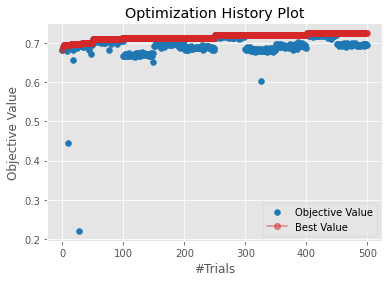

In [99]:
plot_optimization_history(study_xgb);

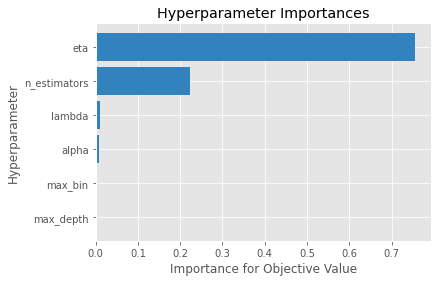

In [100]:
plot_param_importances(study_xgb);

In [101]:
detailed_objective_xgb_CV(study_xgb.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.726160,0.060424
1,TP,20.000000,3.431877
2,TN,98.600000,1.074968
3,FP,1.900000,0.994429
4,FN,13.400000,3.502380
5,Accuracy,0.885748,0.031036
6,Precision,0.909763,0.050908
7,Sensitivity,0.599047,0.103768
8,Specificity,0.981100,0.009911
9,F1 score,0.719440,0.089156


In [102]:
mat_met_xgb_test['ave'] = mat_met_xgb_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_xgb_test['std'] = mat_met_xgb_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_xgb_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.706611,0.686641,0.737877,0.695883,0.730519,0.701294,0.749091,0.714606,0.592601,0.765842,0.708097,0.047661
1,TP,42.000000,44.000000,43.000000,36.000000,42.000000,39.000000,40.000000,38.000000,29.000000,37.000000,39.000000,4.396969
2,TN,197.000000,198.000000,197.000000,194.000000,198.000000,199.000000,198.000000,197.000000,198.000000,200.000000,197.600000,1.577621
3,FP,4.000000,3.000000,4.000000,6.000000,5.000000,2.000000,4.000000,6.000000,4.000000,2.000000,4.000000,1.414214
4,FN,25.000000,23.000000,24.000000,32.000000,23.000000,28.000000,26.000000,27.000000,37.000000,29.000000,27.400000,4.402020
5,Accuracy,0.891791,0.902985,0.895522,0.858209,0.895522,0.888060,0.888060,0.876866,0.847015,0.884328,0.882836,0.017607
6,Precision,0.913043,0.936170,0.914894,0.857143,0.893617,0.951220,0.909091,0.863636,0.878788,0.948718,0.906632,0.033316
7,Sensitivity,0.626866,0.656716,0.641791,0.529412,0.646154,0.582090,0.606061,0.584615,0.439394,0.560606,0.587370,0.065949
8,Specificity,0.980100,0.985100,0.980100,0.970000,0.975400,0.990000,0.980200,0.970400,0.980200,0.990100,0.980160,0.007001
9,F1 score,0.743363,0.771930,0.754386,0.654545,0.750000,0.722222,0.727273,0.697248,0.585859,0.704762,0.711159,0.055407


In [103]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_xgb=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_xgb = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=24,
                                    subsample=0.8, 
                                   )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_xgb.fit(X_train,y_train, 
            eval_set=eval_set,
            eval_metric=["rmse"],
            early_stopping_rounds=50,
            verbose= False,
                  )
                          
                  
        #print(test_idx)
        y_pred_optimized_xgb = optimizedCV_xgb.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_xgb': y_pred_optimized_xgb } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_xgb_cat = np.where(((y_pred_optimized_xgb >= 2) | (y_pred_optimized_xgb <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_xgb_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_xgb))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_xgb_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_xgb_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_xgb_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_xgb_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_xgb_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_xgb_cat))
        
    data_xgb['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_xgb['y_test' + str(i)] = data_inner['y_test']
    data_xgb['y_pred_xgb' + str(i)] = data_inner['y_pred_xgb']
   # data_xgb['correct' + str(i)] = correct_value
   # data_xgb['pred' + str(i)] = y_pred_optimized_xgb

mat_met_optimized_xgb = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


xgb_run0 = data_xgb[['y_test_idx0', 'y_test0', 'y_pred_xgb0']]
xgb_run0.sort_values(by='y_test_idx0', inplace=True)
xgb_run0.reset_index(inplace=True, drop=True)
xgb_run1 = data_xgb[['y_test_idx1', 'y_test1', 'y_pred_xgb1']]
xgb_run1.sort_values(by='y_test_idx1', inplace=True)
xgb_run1.reset_index(inplace=True, drop=True)
xgb_run2 = data_xgb[['y_test_idx2', 'y_test2', 'y_pred_xgb2']]
xgb_run2.sort_values(by='y_test_idx2', inplace=True)
xgb_run2.reset_index(inplace=True, drop=True)
xgb_run3 = data_xgb[['y_test_idx3', 'y_test3', 'y_pred_xgb3']]
xgb_run3.sort_values(by='y_test_idx3', inplace=True)
xgb_run3.reset_index(inplace=True, drop=True)
xgb_run4 = data_xgb[['y_test_idx4', 'y_test4', 'y_pred_xgb4']]
xgb_run4.sort_values(by='y_test_idx4', inplace=True)
xgb_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
xgb_5preds = pd.concat([chembl_id, xgb_run0, xgb_run1, xgb_run2, xgb_run3, xgb_run4], axis=1)
xgb_5preds = xgb_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_xgb0', 'y_pred_xgb1', 'y_pred_xgb2', 'y_pred_xgb3', 'y_pred_xgb4']]
xgb_5preds['y_pred_xgb_ave'] = xgb_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
xgb_5preds['y_pred_xgb_std'] = xgb_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
xgb_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_xgb0,y_pred_xgb1,y_pred_xgb2,y_pred_xgb3,y_pred_xgb4,y_pred_xgb_ave,y_pred_xgb_std
0,CHEMBL4635479,0,0.42,0.864195,0.759444,0.731960,0.782119,0.168248,0.620994,0.245617
1,CHEMBL4299417,1,0.98,0.532398,0.604213,0.741320,0.672058,0.713656,0.707274,0.140251
2,CHEMBL4225331,2,0.84,0.634318,0.885098,0.848559,1.051753,1.086280,0.891001,0.149610
3,CHEMBL1094710,3,0.45,0.194353,0.080873,0.254829,-0.013314,-0.064724,0.150336,0.173451
4,CHEMBL3287256,4,-0.33,-0.133026,-0.133698,-0.055169,-0.098350,-0.086947,-0.139532,0.089380
...,...,...,...,...,...,...,...,...,...,...
1334,CHEMBL3769491,1334,0.69,-0.448810,-0.019706,-0.428303,-0.220375,-0.302046,-0.121540,0.389984
1335,CHEMBL482095,1335,0.44,1.126903,1.043857,1.231881,0.937111,0.929925,0.951613,0.251732
1336,CHEMBL4095596,1336,0.78,1.007316,1.086926,0.893390,1.282278,1.100579,1.025082,0.159895
1337,CHEMBL4072925,1337,0.62,0.512044,0.592815,0.723611,0.433262,0.415881,0.549602,0.107958


In [104]:
mat_met_optimized_xgb.to_csv(output/'mat_met_xgb_opt.csv')
xgb_5preds.to_csv(output/'xgb_5test_CV_result.csv')

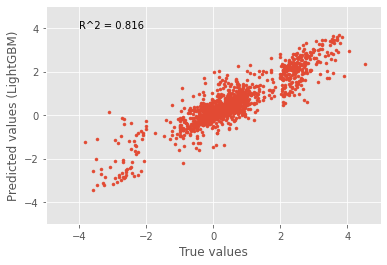

In [105]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(xgb_5preds['y_test0'], xgb_5preds['y_pred_xgb_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(xgb_5preds['y_test0'], xgb_5preds['y_pred_xgb_ave'])), (-4, 4))
plt.show()

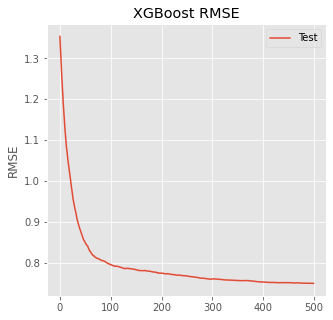

In [106]:
from matplotlib import pyplot
import matplotlib.pyplot as plt  
# retrieve performance metrics
results = optimized_xgb_0.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
    
# plot log loss
fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

 # plot classification error
#fig, ax = pyplot.subplots(figsize=(5,5))
#ax.plot(x_axis, results['validation_0']['error'], label='Train')
#ax.plot(x_axis, results['validation_1']['error'], label='Test')
#ax.legend()
    
#pyplot.ylabel('Classification Error')
#pyplot.title('XGBoost Classification Error')
#pyplot.show()

In [107]:
#cross valide using this optimized XGBoost 
fit_params = {'early_stopping_rounds': 50, 
            'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
              'verbose' : False,
             }

xgb_baseline_CVscore = cross_val_score(xgb_reg, X, Y, cv=10, scoring="r2", )
#cv_xgb_opt_testSet = cross_val_score(optimized_xgb, X, Y, cv=10, scoring="r2", fit_params = fit_params)
cv_xgb_opt = cross_val_score(optimizedCV_xgb, X, Y, cv=10, scoring="r2", fit_params = fit_params)
print("XGBoost baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(xgb_baseline_CVscore), np.std(xgb_baseline_CVscore, ddof=1)))
#print("XGBoost optimized model (tested with Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (cv_xgb_opt_testSet.mean(), cv_xgb_opt_testSet.std()))
print("XGBoost optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_xgb_opt), np.std(cv_xgb_opt, ddof=1)))

XGBoost baseline model r2_score 0.6657 with a standard deviation of 0.0603
XGBoost optimized model r2_score 0.7079 with a standard deviation of 0.0457


In [108]:
joblib.dump(xgb_reg, output/"xgb_reg.joblib")
#joblib.dump(optimized_xgb, output/"optimized_xgb.joblib")
joblib.dump(optimizedCV_xgb, output/"optimizedCV_xgb.joblib")


['./optimizedCV_xgb_noSemiSel.joblib']

## KNeighbors (KNN)

In [109]:
%%time


r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    knn_reg = KNeighborsRegressor()
    
    knn_reg.fit(X_train,y_train)

    y_pred = knn_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.684852     0.058986
1                    TP        21.500000     2.953341
2                    TN        98.300000     1.702939
3                    FP         2.200000     1.549193
4                    FN        11.900000     3.247221
5              Accuracy         0.894720     0.030496
6             Precision         0.907275     0.067761
7           Sensitivity         0.644508     0.093455
8           Specificity         0.978100     0.015435
9              F1 score         0.751137     0.078640
10  F1 score (weighted)         0.887661     0.034191
11     F1 score (macro)         0.842165     0.048677
12    Balanced Accuracy         0.811303     0.050116
13                  MCC         0.704934     0.090514
14                  NPV         0.892520     0.027160
15              ROC_AUC         0.811303     0.050116
CPU times: user 2.1 s, sys: 0 ns, total: 2.1 s
Wall time: 2.1 s


In [110]:
def objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 5, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        
    }
    
   
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsRegressor(**param_grid, n_jobs=24)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
    
    
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)

In [111]:
def detailed_objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 1, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),      
    }
    
    r2_scores = np.empty(10)
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsRegressor(**param_grid, n_jobs=24)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
        
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
    

In [112]:
#Execute optuna and set hyperparameters
study_knn = optuna.create_study(direction='maximize', study_name="KNNregressor")
func_knn_0 = lambda trial: objective_knn_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_knn.optimize(func_knn_0, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:21:52,855] A new study created in memory with name: KNNregressor
[I 2023-02-22 03:21:53,281] Trial 0 finished with value: 0.6235008340843227 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 81}. Best is trial 0 with value: 0.6235008340843227.
[I 2023-02-22 03:21:53,794] Trial 1 finished with value: 0.5383815255328213 and parameters: {'n_neighbors': 26, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 43}. Best is trial 0 with value: 0.6235008340843227.
[I 2023-02-22 03:21:54,187] Trial 2 finished with value: 0.6481400708932503 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 76}. Best is trial 2 with value: 0.6481400708932503.
[I 2023-02-22 03:21:54,702] Trial 3 finished with value: 0.5659416708561007 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 49}. Best is trial 2 with value: 0.6481400708932503.
[I 2023-02-22 03:21:55,1

[I 2023-02-22 03:22:10,183] Trial 35 finished with value: 0.6434191795337003 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 47}. Best is trial 28 with value: 0.6613870839614401.
[I 2023-02-22 03:22:10,728] Trial 36 finished with value: 0.6717365451476869 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 55}. Best is trial 36 with value: 0.6717365451476869.
[I 2023-02-22 03:22:11,239] Trial 37 finished with value: 0.6833432757890224 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 41}. Best is trial 37 with value: 0.6833432757890224.
[I 2023-02-22 03:22:11,740] Trial 38 finished with value: 0.6194723524355592 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 40}. Best is trial 37 with value: 0.6833432757890224.
[I 2023-02-22 03:22:12,290] Trial 39 finished with value: 0.5786553749731767 and parameters: {'n_n

	Number of trials: 50.0
	Best value (r2_score): 0.6837
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 48


In [113]:
#Create an instance with tuned hyperparameters

optimized_knn_0 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_0.fit(X_trainSet0,Y_trainSet0, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_0 = optimized_knn_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_knn_0)
# now convert the resuls to binary with cutoff 
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_knn_0_cat = np.where(((y_pred_knn_0 >= 2) | (y_pred_knn_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_knn_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_knn_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_knn_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_knn_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_knn_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_knn_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_knn_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_knn_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_knn_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_knn_0_cat)
    

mat_met_knn_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_knn_test)


                 Metric        Set0
0                    R2    0.658472
1                    TP   47.000000
2                    TN  199.000000
3                    FP    2.000000
4                    FN   20.000000
5              Accuracy    0.917910
6             Precision    0.959184
7           Sensitivity    0.701493
8           Specificity    0.990000
9              F1 score    0.810345
10  F1 score (weighted)    0.913300
11     F1 score (macro)    0.878982
12    Balanced Accuracy    0.845771
13                  MCC    0.774701
14                  NPV    0.908700
15              ROC_AUC    0.845771


In [114]:
#Execute optuna and set hyperparameters

func_knn_1 = lambda trial: objective_knn_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_knn.optimize(func_knn_1, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:22:17,650] Trial 50 finished with value: 0.7040062642130659 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 83}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:18,099] Trial 51 finished with value: 0.7040062642130659 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 83}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:18,548] Trial 52 finished with value: 0.7038607365373963 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 94}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:19,040] Trial 53 finished with value: 0.7040062642130659 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 94}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:19,485] Trial 54 finished with value: 0.7040062642130659 and parameters: {'n_nei

[I 2023-02-22 03:22:33,123] Trial 85 finished with value: 0.6936740481452774 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 90}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:33,557] Trial 86 finished with value: 0.6980040535733897 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 87}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:34,003] Trial 87 finished with value: 0.6829675080943731 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:34,461] Trial 88 finished with value: 0.7012056438401573 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 93}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:34,884] Trial 89 finished with value: 0.7040062642130659 and parameters: {'n_nei

	Number of trials: 100.0
	Best value (r2_score): 0.7040
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 83


In [115]:
#Create an instance with tuned hyperparameters

optimized_knn_1 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_1.fit(X_trainSet1,Y_trainSet1, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_1 = optimized_knn_1.predict(X_testSet1)
r2_scores = r2_score(Y_testSet1, y_pred_knn_1)
# now convert the resuls to binary with cutoff 
Y_testSet1_cat = np.where(((Y_testSet1>=2) | (Y_testSet1<=-2)), 1, 0) 
y_pred_knn_1_cat = np.where(((y_pred_knn_1 >= 2) | (y_pred_knn_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_knn_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_knn_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_knn_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_knn_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_knn_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_knn_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_knn_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_knn_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_knn_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_knn_1_cat)
    

set1 = pd.DataFrame({'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set1'] = set1
print(mat_met_knn_test)


                 Metric        Set0        Set1
0                    R2    0.658472    0.663120
1                    TP   47.000000   44.000000
2                    TN  199.000000  200.000000
3                    FP    2.000000    1.000000
4                    FN   20.000000   23.000000
5              Accuracy    0.917910    0.910448
6             Precision    0.959184    0.977778
7           Sensitivity    0.701493    0.656716
8           Specificity    0.990000    0.995000
9              F1 score    0.810345    0.785714
10  F1 score (weighted)    0.913300    0.903976
11     F1 score (macro)    0.878982    0.864555
12    Balanced Accuracy    0.845771    0.825871
13                  MCC    0.774701    0.755009
14                  NPV    0.908700    0.896900
15              ROC_AUC    0.845771    0.825871


In [116]:
#Execute optuna and set hyperparameters

func_knn_2 = lambda trial: objective_knn_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_knn.optimize(func_knn_2, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:22:39,652] Trial 100 finished with value: 0.6538253612592986 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 91}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:40,135] Trial 101 finished with value: 0.6570739541587143 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 83}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:40,576] Trial 102 finished with value: 0.6554136220283987 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 93}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:41,049] Trial 103 finished with value: 0.6538253612592986 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:41,536] Trial 104 finished with value: 0.5685886970937601 and parameters: {'

[I 2023-02-22 03:22:56,081] Trial 135 finished with value: 0.6538253612592986 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:56,539] Trial 136 finished with value: 0.6554136220283987 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:56,980] Trial 137 finished with value: 0.6570739541587143 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 82}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:57,460] Trial 138 finished with value: 0.6554136220283987 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 86}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:22:57,910] Trial 139 finished with value: 0.6444586003490331 and parameters: {'

	Number of trials: 150.0
	Best value (r2_score): 0.7040
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 83


In [117]:
#Create an instance with tuned hyperparameters

optimized_knn_2 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_2.fit(X_trainSet2,Y_trainSet2, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_2 = optimized_knn_2.predict(X_testSet2)
r2_scores = r2_score(Y_testSet2, y_pred_knn_2)
# now convert the resuls to binary with cutoff 
Y_testSet2_cat = np.where(((Y_testSet2>=2) | (Y_testSet2<=-2)), 1, 0) 
y_pred_knn_2_cat = np.where(((y_pred_knn_2 >= 2) | (y_pred_knn_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_knn_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_knn_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_knn_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_knn_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_knn_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_knn_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_knn_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_knn_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_knn_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_knn_2_cat)
    

Set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set2'] = Set2
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.658472    0.663120    0.695179
1                    TP   47.000000   44.000000   46.000000
2                    TN  199.000000  200.000000  195.000000
3                    FP    2.000000    1.000000    6.000000
4                    FN   20.000000   23.000000   21.000000
5              Accuracy    0.917910    0.910448    0.899254
6             Precision    0.959184    0.977778    0.884615
7           Sensitivity    0.701493    0.656716    0.686567
8           Specificity    0.990000    0.995000    0.970100
9              F1 score    0.810345    0.785714    0.773109
10  F1 score (weighted)    0.913300    0.903976    0.894716
11     F1 score (macro)    0.878982    0.864555    0.854181
12    Balanced Accuracy    0.845771    0.825871    0.828358
13                  MCC    0.774701    0.755009    0.719092
14                  NPV    0.908700    0.896900    0.902800
15              ROC_AUC    0.845771    0

In [118]:
#Execute optuna and set hyperparameters

func_knn_3 = lambda trial: objective_knn_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_knn.optimize(func_knn_3, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:23:03,118] Trial 150 finished with value: 0.6631608571187319 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 93}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:03,619] Trial 151 finished with value: 0.6736512672604336 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 86}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:04,093] Trial 152 finished with value: 0.6744684716934607 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 92}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:04,586] Trial 153 finished with value: 0.6699003682771585 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:05,070] Trial 154 finished with value: 0.6744684716934607 and parameters: {'

[I 2023-02-22 03:23:19,356] Trial 185 finished with value: 0.6736512672604336 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 93}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:19,810] Trial 186 finished with value: 0.6744684716934607 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 85}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:20,266] Trial 187 finished with value: 0.6744684716934607 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 87}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:20,726] Trial 188 finished with value: 0.6736512672604336 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:21,174] Trial 189 finished with value: 0.6699003682771585 and parameters: {

	Number of trials: 200.0
	Best value (r2_score): 0.7040
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 83


In [119]:
#Create an instance with tuned hyperparameters

optimized_knn_3 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_3.fit(X_trainSet3,Y_trainSet3, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_3 = optimized_knn_3.predict(X_testSet3)
r2_scores = r2_score(Y_testSet3, y_pred_knn_3)
# now convert the resuls to binary with cutoff 
Y_testSet3_cat = np.where(((Y_testSet3>=2) | (Y_testSet3<=-2)), 1, 0) 
y_pred_knn_3_cat = np.where(((y_pred_knn_3 >= 2) | (y_pred_knn_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_knn_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_knn_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_knn_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_knn_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_knn_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_knn_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_knn_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_knn_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_knn_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_knn_3_cat)
    

Set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set3'] = Set3
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.658472    0.663120    0.695179    0.754528
1                    TP   47.000000   44.000000   46.000000   41.000000
2                    TN  199.000000  200.000000  195.000000  200.000000
3                    FP    2.000000    1.000000    6.000000    0.000000
4                    FN   20.000000   23.000000   21.000000   27.000000
5              Accuracy    0.917910    0.910448    0.899254    0.899254
6             Precision    0.959184    0.977778    0.884615    1.000000
7           Sensitivity    0.701493    0.656716    0.686567    0.602941
8           Specificity    0.990000    0.995000    0.970100    1.000000
9              F1 score    0.810345    0.785714    0.773109    0.752294
10  F1 score (weighted)    0.913300    0.903976    0.894716    0.889961
11     F1 score (macro)    0.878982    0.864555    0.854181    0.844531
12    Balanced Accuracy    0.845771    0.825871    0.828358    0

In [120]:
#Execute optuna and set hyperparameters

func_knn_4 = lambda trial: objective_knn_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_knn.optimize(func_knn_4, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:23:26,219] Trial 200 finished with value: 0.6650355238253385 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:26,654] Trial 201 finished with value: 0.6770440364348841 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:27,101] Trial 202 finished with value: 0.6770440364348841 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:27,557] Trial 203 finished with value: 0.6760862248234097 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 93}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:27,992] Trial 204 finished with value: 0.5744971257106896 and parameters: {'

[I 2023-02-22 03:23:42,380] Trial 235 finished with value: 0.6677507146294899 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:42,837] Trial 236 finished with value: 0.6760862248234097 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:43,287] Trial 237 finished with value: 0.6770440364348841 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 94}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:43,745] Trial 238 finished with value: 0.6677507146294899 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:44,213] Trial 239 finished with value: 0.6760862248234097 and parameters: {'

	Number of trials: 250.0
	Best value (r2_score): 0.7040
	Best params:
		n_neighbors: 6
		weights: distance
		metric: manhattan
		leaf_size: 83


In [121]:
#Create an instance with tuned hyperparameters

optimized_knn_4 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_4.fit(X_trainSet4,Y_trainSet4, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_4 = optimized_knn_4.predict(X_testSet4)
r2_scores = r2_score(Y_testSet4, y_pred_knn_4)
# now convert the resuls to binary with cutoff 
Y_testSet4_cat = np.where(((Y_testSet4>=2) | (Y_testSet4<=-2)), 1, 0) 
y_pred_knn_4_cat = np.where(((y_pred_knn_4 >= 2) | (y_pred_knn_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_knn_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_knn_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_knn_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_knn_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_knn_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_knn_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_knn_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_knn_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_knn_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_knn_4_cat)
    

Set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set4'] = Set4
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.658472    0.663120    0.695179    0.754528   
1                    TP   47.000000   44.000000   46.000000   41.000000   
2                    TN  199.000000  200.000000  195.000000  200.000000   
3                    FP    2.000000    1.000000    6.000000    0.000000   
4                    FN   20.000000   23.000000   21.000000   27.000000   
5              Accuracy    0.917910    0.910448    0.899254    0.899254   
6             Precision    0.959184    0.977778    0.884615    1.000000   
7           Sensitivity    0.701493    0.656716    0.686567    0.602941   
8           Specificity    0.990000    0.995000    0.970100    1.000000   
9              F1 score    0.810345    0.785714    0.773109    0.752294   
10  F1 score (weighted)    0.913300    0.903976    0.894716    0.889961   
11     F1 score (macro)    0.878982    0.864555    0.854181    0.844531   
12    Balanced Accuracy  

In [122]:
#Execute optuna and set hyperparameters

func_knn_5 = lambda trial: objective_knn_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_knn.optimize(func_knn_5, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:23:49,477] Trial 250 finished with value: 0.6892294851140616 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 80}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:49,900] Trial 251 finished with value: 0.6932560521405441 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 84}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:50,354] Trial 252 finished with value: 0.6892294851140616 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 93}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:50,840] Trial 253 finished with value: 0.6372596547272538 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 89}. Best is trial 50 with value: 0.7040062642130659.
[I 2023-02-22 03:23:51,312] Trial 254 finished with value: 0.7062222360032736 and parameters: {

[I 2023-02-22 03:24:05,472] Trial 285 finished with value: 0.7062222360032736 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 82}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:05,954] Trial 286 finished with value: 0.7062222360032736 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 82}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:06,381] Trial 287 finished with value: 0.7062222360032736 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 81}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:06,821] Trial 288 finished with value: 0.7062222360032736 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 84}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:07,310] Trial 289 finished with value: 0.7062222360032736 and parameters

	Number of trials: 300.0
	Best value (r2_score): 0.7062
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 98


In [123]:
#Create an instance with tuned hyperparameters

optimized_knn_5 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_5.fit(X_trainSet5,Y_trainSet5, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_5 = optimized_knn_5.predict(X_testSet5)
r2_scores = r2_score(Y_testSet5, y_pred_knn_5)
# now convert the resuls to binary with cutoff 
Y_testSet5_cat = np.where(((Y_testSet5>=2) | (Y_testSet5<=-2)), 1, 0) 
y_pred_knn_5_cat = np.where(((y_pred_knn_5 >= 2) | (y_pred_knn_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_knn_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_knn_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_knn_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_knn_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_knn_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_knn_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_knn_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_knn_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_knn_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_knn_5_cat)
    

Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set5'] = Set5
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.658472    0.663120    0.695179    0.754528   
1                    TP   47.000000   44.000000   46.000000   41.000000   
2                    TN  199.000000  200.000000  195.000000  200.000000   
3                    FP    2.000000    1.000000    6.000000    0.000000   
4                    FN   20.000000   23.000000   21.000000   27.000000   
5              Accuracy    0.917910    0.910448    0.899254    0.899254   
6             Precision    0.959184    0.977778    0.884615    1.000000   
7           Sensitivity    0.701493    0.656716    0.686567    0.602941   
8           Specificity    0.990000    0.995000    0.970100    1.000000   
9              F1 score    0.810345    0.785714    0.773109    0.752294   
10  F1 score (weighted)    0.913300    0.903976    0.894716    0.889961   
11     F1 score (macro)    0.878982    0.864555    0.854181    0.844531   
12    Balanced Accuracy  

In [124]:
#Execute optuna and set hyperparameters

func_knn_6 = lambda trial: objective_knn_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_knn.optimize(func_knn_6, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:24:12,398] Trial 300 finished with value: 0.6777208270703096 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:12,856] Trial 301 finished with value: 0.5589653940302352 and parameters: {'n_neighbors': 28, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 83}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:13,505] Trial 302 finished with value: 0.6718207886187623 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 20}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:13,972] Trial 303 finished with value: 0.6777208270703096 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 83}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:14,427] Trial 304 finished with value: 0.6777208270703096 and parameter

[I 2023-02-22 03:24:28,884] Trial 335 finished with value: 0.6764418824434747 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 80}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:29,295] Trial 336 finished with value: 0.6537830654080536 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 85}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:29,756] Trial 337 finished with value: 0.6777208270703096 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 76}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:30,192] Trial 338 finished with value: 0.6777208270703096 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 81}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:30,653] Trial 339 finished with value: 0.6764418824434747 and parameters:

	Number of trials: 350.0
	Best value (r2_score): 0.7062
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 98


In [125]:
#Create an instance with tuned hyperparameters

optimized_knn_6 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_6.fit(X_trainSet6,Y_trainSet6, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_6 = optimized_knn_6.predict(X_testSet6)
r2_scores = r2_score(Y_testSet6, y_pred_knn_6)
# now convert the resuls to binary with cutoff 
Y_testSet6_cat = np.where(((Y_testSet6>=2) | (Y_testSet6<=-2)), 1, 0) 
y_pred_knn_6_cat = np.where(((y_pred_knn_6 >= 2) | (y_pred_knn_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_knn_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_knn_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_knn_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_knn_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_knn_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_knn_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_knn_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_knn_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_knn_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_knn_6_cat)
    

Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set6'] = Set6
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.658472    0.663120    0.695179    0.754528   
1                    TP   47.000000   44.000000   46.000000   41.000000   
2                    TN  199.000000  200.000000  195.000000  200.000000   
3                    FP    2.000000    1.000000    6.000000    0.000000   
4                    FN   20.000000   23.000000   21.000000   27.000000   
5              Accuracy    0.917910    0.910448    0.899254    0.899254   
6             Precision    0.959184    0.977778    0.884615    1.000000   
7           Sensitivity    0.701493    0.656716    0.686567    0.602941   
8           Specificity    0.990000    0.995000    0.970100    1.000000   
9              F1 score    0.810345    0.785714    0.773109    0.752294   
10  F1 score (weighted)    0.913300    0.903976    0.894716    0.889961   
11     F1 score (macro)    0.878982    0.864555    0.854181    0.844531   
12    Balanced Accuracy  

In [126]:
#Execute optuna and set hyperparameters

func_knn_7 = lambda trial: objective_knn_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_knn.optimize(func_knn_7, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:24:35,632] Trial 350 finished with value: 0.6862418898073787 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 85}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:36,105] Trial 351 finished with value: 0.6862418898073787 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 82}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:36,586] Trial 352 finished with value: 0.6859686167402219 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 81}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:37,096] Trial 353 finished with value: 0.6862418898073787 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 84}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:37,535] Trial 354 finished with value: 0.6862418898073787 and parameters

[I 2023-02-22 03:24:51,925] Trial 385 finished with value: 0.6859686167402219 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:52,381] Trial 386 finished with value: 0.6859686167402219 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 87}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:52,865] Trial 387 finished with value: 0.5570848836443115 and parameters: {'n_neighbors': 26, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 83}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:53,314] Trial 388 finished with value: 0.6862418898073787 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 81}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:53,817] Trial 389 finished with value: 0.6862418898073787 and parameter

	Number of trials: 400.0
	Best value (r2_score): 0.7062
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 98


In [127]:
#Create an instance with tuned hyperparameters

optimized_knn_7 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_7.fit(X_trainSet7,Y_trainSet7, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_7 = optimized_knn_7.predict(X_testSet7)
r2_scores = r2_score(Y_testSet7, y_pred_knn_7)
# now convert the resuls to binary with cutoff 
Y_testSet7_cat = np.where(((Y_testSet7>=2) | (Y_testSet7<=-2)), 1, 0) 
y_pred_knn_7_cat = np.where(((y_pred_knn_7 >= 2) | (y_pred_knn_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_knn_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_knn_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_knn_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_knn_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_knn_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_knn_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_knn_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_knn_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_knn_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_knn_7_cat)
    

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set7'] = Set7
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.658472    0.663120    0.695179    0.754528   
1                    TP   47.000000   44.000000   46.000000   41.000000   
2                    TN  199.000000  200.000000  195.000000  200.000000   
3                    FP    2.000000    1.000000    6.000000    0.000000   
4                    FN   20.000000   23.000000   21.000000   27.000000   
5              Accuracy    0.917910    0.910448    0.899254    0.899254   
6             Precision    0.959184    0.977778    0.884615    1.000000   
7           Sensitivity    0.701493    0.656716    0.686567    0.602941   
8           Specificity    0.990000    0.995000    0.970100    1.000000   
9              F1 score    0.810345    0.785714    0.773109    0.752294   
10  F1 score (weighted)    0.913300    0.903976    0.894716    0.889961   
11     F1 score (macro)    0.878982    0.864555    0.854181    0.844531   
12    Balanced Accuracy  

In [128]:
#Execute optuna and set hyperparameters

func_knn_8 = lambda trial: objective_knn_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_knn.optimize(func_knn_8, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:24:59,094] Trial 400 finished with value: 0.6955082179859016 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 88}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:24:59,548] Trial 401 finished with value: 0.6967738509509743 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:00,016] Trial 402 finished with value: 0.6955082179859016 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 77}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:00,473] Trial 403 finished with value: 0.6955082179859016 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:00,924] Trial 404 finished with value: 0.6967738509509743 and parameters

[I 2023-02-22 03:25:15,096] Trial 435 finished with value: 0.6955082179859016 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 84}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:15,562] Trial 436 finished with value: 0.6967738509509743 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 81}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:16,032] Trial 437 finished with value: 0.6888481675095749 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 87}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:16,510] Trial 438 finished with value: 0.6955082179859016 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 84}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:16,984] Trial 439 finished with value: 0.6967738509509743 and parameters

	Number of trials: 450.0
	Best value (r2_score): 0.7062
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 98


In [129]:
#Create an instance with tuned hyperparameters

optimized_knn_8 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_8.fit(X_trainSet8,Y_trainSet8, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_8 = optimized_knn_8.predict(X_testSet8)
r2_scores = r2_score(Y_testSet8, y_pred_knn_8)
# now convert the resuls to binary with cutoff 
Y_testSet8_cat = np.where(((Y_testSet8>=2) | (Y_testSet8<=-2)), 1, 0) 
y_pred_knn_8_cat = np.where(((y_pred_knn_8 >= 2) | (y_pred_knn_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_knn_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_knn_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_knn_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_knn_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_knn_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_knn_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_knn_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_knn_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_knn_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_knn_8_cat)
    

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set8'] = Set8
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.658472    0.663120    0.695179    0.754528   
1                    TP   47.000000   44.000000   46.000000   41.000000   
2                    TN  199.000000  200.000000  195.000000  200.000000   
3                    FP    2.000000    1.000000    6.000000    0.000000   
4                    FN   20.000000   23.000000   21.000000   27.000000   
5              Accuracy    0.917910    0.910448    0.899254    0.899254   
6             Precision    0.959184    0.977778    0.884615    1.000000   
7           Sensitivity    0.701493    0.656716    0.686567    0.602941   
8           Specificity    0.990000    0.995000    0.970100    1.000000   
9              F1 score    0.810345    0.785714    0.773109    0.752294   
10  F1 score (weighted)    0.913300    0.903976    0.894716    0.889961   
11     F1 score (macro)    0.878982    0.864555    0.854181    0.844531   
12    Balanced Accuracy  

In [130]:
#Execute optuna and set hyperparameters

func_knn_9 = lambda trial: objective_knn_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_knn.optimize(func_knn_9, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:25:22,288] Trial 450 finished with value: 0.6904874355064744 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 81}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:22,983] Trial 451 finished with value: 0.6897455100019748 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 26}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:23,467] Trial 452 finished with value: 0.6490445740895505 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 68}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:23,939] Trial 453 finished with value: 0.6904874355064744 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 88}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:24,425] Trial 454 finished with value: 0.6849587752387423 and parameters:

[I 2023-02-22 03:25:39,034] Trial 485 finished with value: 0.6849587752387423 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 80}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:39,524] Trial 486 finished with value: 0.6904874355064744 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:39,989] Trial 487 finished with value: 0.6849587752387423 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:40,487] Trial 488 finished with value: 0.6819444287209894 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 77}. Best is trial 254 with value: 0.7062222360032736.
[I 2023-02-22 03:25:40,959] Trial 489 finished with value: 0.6598616568076866 and parameters

	Number of trials: 500.0
	Best value (r2_score): 0.7062
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 98


In [131]:
#Create an instance with tuned hyperparameters

optimized_knn_9 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )

    
#learn


optimized_knn_9.fit(X_trainSet9,Y_trainSet9, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_9 = optimized_knn_9.predict(X_testSet9)
r2_scores = r2_score(Y_testSet9, y_pred_knn_9)
# now convert the resuls to binary with cutoff 
Y_testSet9_cat = np.where(((Y_testSet9>=2) | (Y_testSet9<=-2)), 1, 0) 
y_pred_knn_9_cat = np.where(((y_pred_knn_9 >= 2) | (y_pred_knn_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_knn_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_knn_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_knn_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_knn_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_knn_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_knn_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_knn_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_knn_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_knn_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_knn_9_cat)
    

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set9'] = Set9
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.658472    0.663120    0.695179    0.754528   
1                    TP   47.000000   44.000000   46.000000   41.000000   
2                    TN  199.000000  200.000000  195.000000  200.000000   
3                    FP    2.000000    1.000000    6.000000    0.000000   
4                    FN   20.000000   23.000000   21.000000   27.000000   
5              Accuracy    0.917910    0.910448    0.899254    0.899254   
6             Precision    0.959184    0.977778    0.884615    1.000000   
7           Sensitivity    0.701493    0.656716    0.686567    0.602941   
8           Specificity    0.990000    0.995000    0.970100    1.000000   
9              F1 score    0.810345    0.785714    0.773109    0.752294   
10  F1 score (weighted)    0.913300    0.903976    0.894716    0.889961   
11     F1 score (macro)    0.878982    0.864555    0.854181    0.844531   
12    Balanced Accuracy  

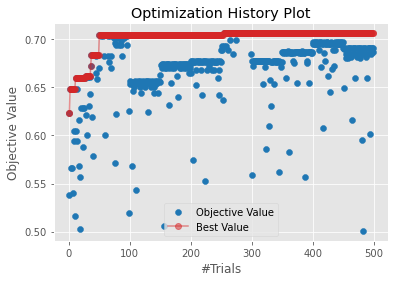

In [132]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_knn);

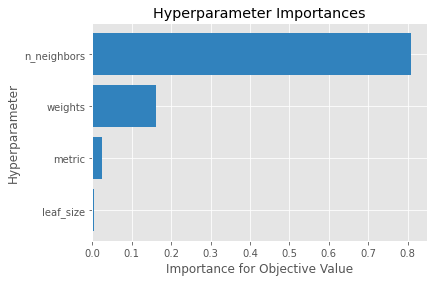

In [133]:

plot_param_importances(study_knn);

In [134]:
detailed_objective_knn_CV(study_knn.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.710253,0.058495
1,TP,22.700000,2.584140
2,TN,98.100000,1.286684
3,FP,2.400000,1.173788
4,FN,10.700000,2.830391
5,Accuracy,0.902188,0.027290
6,Precision,0.903045,0.049349
7,Sensitivity,0.680258,0.082239
8,Specificity,0.976120,0.011671
9,F1 score,0.774640,0.067849


In [135]:
mat_met_knn_test['ave'] = mat_met_knn_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_knn_test['std'] = mat_met_knn_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_knn_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.658472,0.663120,0.695179,0.754528,0.690113,0.640676,0.679932,0.696736,0.586564,0.748406,0.681373,0.049276
1,TP,47.000000,44.000000,46.000000,41.000000,41.000000,38.000000,40.000000,45.000000,32.000000,44.000000,41.800000,4.467164
2,TN,199.000000,200.000000,195.000000,200.000000,198.000000,197.000000,197.000000,200.000000,199.000000,200.000000,198.500000,1.715938
3,FP,2.000000,1.000000,6.000000,0.000000,5.000000,4.000000,5.000000,3.000000,3.000000,2.000000,3.100000,1.911951
4,FN,20.000000,23.000000,21.000000,27.000000,24.000000,29.000000,26.000000,20.000000,34.000000,22.000000,24.600000,4.477102
5,Accuracy,0.917910,0.910448,0.899254,0.899254,0.891791,0.876866,0.884328,0.914179,0.861940,0.910448,0.896642,0.018028
6,Precision,0.959184,0.977778,0.884615,1.000000,0.891304,0.904762,0.888889,0.937500,0.914286,0.956522,0.931484,0.040693
7,Sensitivity,0.701493,0.656716,0.686567,0.602941,0.630769,0.567164,0.606061,0.692308,0.484848,0.666667,0.629553,0.067142
8,Specificity,0.990000,0.995000,0.970100,1.000000,0.975400,0.980100,0.975200,0.985200,0.985100,0.990100,0.984620,0.009480
9,F1 score,0.810345,0.785714,0.773109,0.752294,0.738739,0.697248,0.720721,0.796460,0.633663,0.785714,0.749401,0.053942


In [136]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_knn=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_knn = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=24,
                                                 )


        #learn
        
        optimizedCV_knn.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_knn = optimizedCV_knn.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_knn': y_pred_optimized_knn } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_knn_cat = np.where(((y_pred_optimized_knn >= 2) | (y_pred_optimized_knn <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_knn_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_knn))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_knn_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_knn_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_knn_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_knn_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_knn_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_knn_cat))
        
    data_knn['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_knn['y_test' + str(i)] = data_inner['y_test']
    data_knn['y_pred_knn' + str(i)] = data_inner['y_pred_knn']
   # data_knn['correct' + str(i)] = correct_value
   # data_knn['pred' + str(i)] = y_pred_optimized_knn

mat_met_optimized_knn = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


knn_run0 = data_knn[['y_test_idx0', 'y_test0', 'y_pred_knn0']]
knn_run0.sort_values(by='y_test_idx0', inplace=True)
knn_run0.reset_index(inplace=True, drop=True)
knn_run1 = data_knn[['y_test_idx1', 'y_test1', 'y_pred_knn1']]
knn_run1.sort_values(by='y_test_idx1', inplace=True)
knn_run1.reset_index(inplace=True, drop=True)
knn_run2 = data_knn[['y_test_idx2', 'y_test2', 'y_pred_knn2']]
knn_run2.sort_values(by='y_test_idx2', inplace=True)
knn_run2.reset_index(inplace=True, drop=True)
knn_run3 = data_knn[['y_test_idx3', 'y_test3', 'y_pred_knn3']]
knn_run3.sort_values(by='y_test_idx3', inplace=True)
knn_run3.reset_index(inplace=True, drop=True)
knn_run4 = data_knn[['y_test_idx4', 'y_test4', 'y_pred_knn4']]
knn_run4.sort_values(by='y_test_idx4', inplace=True)
knn_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
knn_5preds = pd.concat([chembl_id, knn_run0, knn_run1, knn_run2, knn_run3, knn_run4], axis=1)
knn_5preds = knn_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_knn0', 'y_pred_knn1', 'y_pred_knn2', 'y_pred_knn3', 'y_pred_knn4']]
knn_5preds['y_pred_knn_ave'] = knn_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
knn_5preds['y_pred_knn_std'] = knn_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
knn_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_knn0,y_pred_knn1,y_pred_knn2,y_pred_knn3,y_pred_knn4,y_pred_knn_ave,y_pred_knn_std
0,CHEMBL4635479,0,0.42,0.914435,0.918282,0.918282,0.942416,0.087025,0.700073,0.330197
1,CHEMBL4299417,1,0.98,0.740447,0.740447,0.740447,0.740447,1.032701,0.829081,0.126268
2,CHEMBL4225331,2,0.84,1.679473,1.704118,1.679473,1.679473,1.346038,1.488096,0.315370
3,CHEMBL1094710,3,0.45,0.252342,0.199999,0.252342,0.274627,0.274627,0.283990,0.078307
4,CHEMBL3287256,4,-0.33,0.092652,0.010387,0.092652,0.092652,0.092652,0.008499,0.154333
...,...,...,...,...,...,...,...,...,...,...
1334,CHEMBL3769491,1334,0.69,-0.584428,0.206291,-0.584428,-0.013141,-0.584428,-0.145023,0.486023
1335,CHEMBL482095,1335,0.44,1.087628,0.884399,1.092275,1.048993,1.087628,0.940154,0.235141
1336,CHEMBL4095596,1336,0.78,1.626439,1.305801,1.305801,1.626439,1.626439,1.378486,0.303643
1337,CHEMBL4072925,1337,0.62,0.425249,0.533988,0.533988,0.533988,0.279343,0.487759,0.108968


In [137]:
mat_met_optimized_knn.to_csv(output/'mat_met_knn_opt.csv')
knn_5preds.to_csv(output/'knn_5test_CV_result.csv')

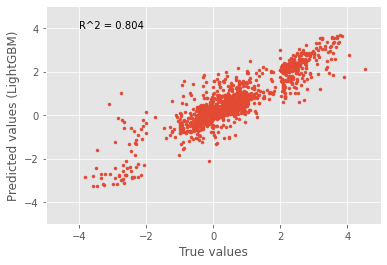

In [138]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(knn_5preds['y_test0'], knn_5preds['y_pred_knn_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(knn_5preds['y_test0'], knn_5preds['y_pred_knn_ave'])), (-4, 4))
plt.show()

In [139]:
#cross valide using this optimized KNN 
knn_baseline_CVscore = cross_val_score(knn_reg, X, Y, cv=10, scoring="r2")
#cv_knn_opt_testSet = cross_val_score(optimized_knn, X, Y, cv=10, scoring="r2")
cv_knn_opt = cross_val_score(optimizedCV_knn, X, Y, cv=10, scoring="r2")
print("KNN baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(knn_baseline_CVscore), np.std(knn_baseline_CVscore, ddof=1)))
#print("KNN optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (cv_knn_opt_testSet.mean(), cv_knn_opt_testSet.std()))
print("KNN optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_knn_opt), np.std(cv_knn_opt, ddof=1)))

KNN baseline model r2_score 0.6764 with a standard deviation of 0.0519
KNN optimized model r2_score 0.7045 with a standard deviation of 0.0427


In [140]:
joblib.dump(knn_reg, output/"knn_reg.joblib")
#joblib.dump(optimized_knn, output/"optimized_knn.joblib")
joblib.dump(optimizedCV_knn, output/"optimizedCV_knn.joblib")
#loaded_rf = joblib.load(output/"optimized_rf.joblib")

['./optimizedCV_knn_noSemiSel.joblib']

## Support Vector 

In [141]:
%%time

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    svm_reg = SVR()
    
    svm_reg.fit(X_train, y_train, )

    y_pred = svm_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.687690     0.042416
1                    TP        15.300000     3.164034
2                    TN        99.500000     1.433721
3                    FP         1.000000     1.414214
4                    FN        18.100000     3.142893
5              Accuracy         0.857356     0.027800
6             Precision         0.941111     0.081826
7           Sensitivity         0.458005     0.093422
8           Specificity         0.990060     0.014095
9              F1 score         0.611482     0.089867
10  F1 score (weighted)         0.837472     0.034548
11     F1 score (macro)         0.762018     0.052845
12    Balanced Accuracy         0.724032     0.048776
13                  MCC         0.592132     0.089655
14                  NPV         0.846560     0.023497
15              ROC_AUC         0.724032     0.048776
CPU times: user 9.52 s, sys: 3.99 ms, total: 9.53 s
Wall time: 9.53 s


In [142]:
def objective_svm_CV(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggest_categorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggest_categorical("device_type", ['gpu'])
        
    }
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVR(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
    
    
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)


In [143]:
def detailed_objective_svm_cv(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggest_categorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggest_categorical("device_type", ['gpu'])
        
    }
    
    r2_scores = np.empty(10)
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVR(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
        
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
   

In [144]:
#Execute optuna and set hyperparameters
study_svm = optuna.create_study(direction='maximize', study_name="SVM_regressor_CV")
func_svm_0 = lambda trial: objective_svm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_svm.optimize(func_svm_0, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:26:07,236] A new study created in memory with name: SVM_regressor_CV
[I 2023-02-22 03:26:13,691] Trial 0 finished with value: -0.019257078224670265 and parameters: {'C': 0.0078125, 'gamma': 3.0517578125e-05}. Best is trial 0 with value: -0.019257078224670265.
[I 2023-02-22 03:26:20,149] Trial 1 finished with value: 0.10961877399417279 and parameters: {'C': 0.0625, 'gamma': 0.001953125}. Best is trial 1 with value: 0.10961877399417279.
[I 2023-02-22 03:26:26,576] Trial 2 finished with value: -0.01862556712736063 and parameters: {'C': 0.0078125, 'gamma': 0.25}. Best is trial 1 with value: 0.10961877399417279.
[I 2023-02-22 03:26:33,087] Trial 3 finished with value: -0.008202643248183806 and parameters: {'C': 0.0078125, 'gamma': 0.0009765625}. Best is trial 1 with value: 0.10961877399417279.
[I 2023-02-22 03:26:39,770] Trial 4 finished with value: 0.06932723807489813 and parameters: {'C': 4.0, 'gamma': 0.25}. Best is trial 1 with value: 0.10961877399417279.
[I 2023-02-22 

[I 2023-02-22 03:30:46,848] Trial 43 finished with value: 0.5931635895427824 and parameters: {'C': 16.0, 'gamma': 0.000244140625}. Best is trial 26 with value: 0.6894882019239421.
[I 2023-02-22 03:30:53,286] Trial 44 finished with value: -0.018263234287448603 and parameters: {'C': 0.015625, 'gamma': 1.0}. Best is trial 26 with value: 0.6894882019239421.
[I 2023-02-22 03:31:00,308] Trial 45 finished with value: 0.026075537378603665 and parameters: {'C': 4.0, 'gamma': 8.0}. Best is trial 26 with value: 0.6894882019239421.
[I 2023-02-22 03:31:06,640] Trial 46 finished with value: 0.6245674096807596 and parameters: {'C': 16.0, 'gamma': 0.0009765625}. Best is trial 26 with value: 0.6894882019239421.
[I 2023-02-22 03:31:12,703] Trial 47 finished with value: 0.6681235462898368 and parameters: {'C': 1.0, 'gamma': 0.015625}. Best is trial 26 with value: 0.6894882019239421.
[I 2023-02-22 03:31:19,164] Trial 48 finished with value: 0.01669420879906488 and parameters: {'C': 0.125, 'gamma': 0.125}.

	Number of trials: 50.0
	Best value (r2_score): 0.6895
	Best params:
		C: 128.0
		gamma: 0.015625


In [145]:
#Create an instance with tuned hyperparameters

optimized_svm_0 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_0.fit(X_trainSet0,Y_trainSet0,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_0 = optimized_svm_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_svm_0)
# now convert the resuls to binary with cutoff 6.3
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_svm_0_cat = np.where(((y_pred_svm_0 >= 2) | (y_pred_svm_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_svm_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_svm_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_svm_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_svm_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_svm_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_svm_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_svm_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_svm_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_svm_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_svm_0_cat)
    

mat_met_svm_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_svm_test)


                 Metric        Set0
0                    R2    0.718703
1                    TP   39.000000
2                    TN  199.000000
3                    FP    2.000000
4                    FN   28.000000
5              Accuracy    0.888060
6             Precision    0.951220
7           Sensitivity    0.582090
8           Specificity    0.990000
9              F1 score    0.722222
10  F1 score (weighted)    0.877985
11     F1 score (macro)    0.826064
12    Balanced Accuracy    0.786070
13                  MCC    0.688228
14                  NPV    0.876700
15              ROC_AUC    0.786070


In [146]:
#Execute optuna and set hyperparameters
func_svm_1 = lambda trial: objective_svm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_svm.optimize(func_svm_1, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:31:33,213] Trial 50 finished with value: 0.025613242497355294 and parameters: {'C': 0.03125, 'gamma': 0.0625}. Best is trial 26 with value: 0.6894882019239421.
[I 2023-02-22 03:31:39,315] Trial 51 finished with value: 0.7062268722272902 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.7062268722272902.
[I 2023-02-22 03:31:45,411] Trial 52 finished with value: 0.7062268722272902 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.7062268722272902.
[I 2023-02-22 03:31:51,854] Trial 53 finished with value: 0.6625008496173039 and parameters: {'C': 16.0, 'gamma': 0.00390625}. Best is trial 51 with value: 0.7062268722272902.
[I 2023-02-22 03:31:58,070] Trial 54 finished with value: 0.5312022280805698 and parameters: {'C': 0.25, 'gamma': 0.015625}. Best is trial 51 with value: 0.7062268722272902.
[I 2023-02-22 03:32:04,604] Trial 55 finished with value: 0.02579887824617829 and parameters: {'C': 0.5, 'gamma': 6.103515625

[I 2023-02-22 03:36:12,316] Trial 94 finished with value: 0.018376857250573954 and parameters: {'C': 8.0, 'gamma': 4.0}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:36:18,818] Trial 95 finished with value: -0.0174808303784161 and parameters: {'C': 0.0625, 'gamma': 0.5}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:36:25,553] Trial 96 finished with value: 0.01900604110041928 and parameters: {'C': 8.0, 'gamma': 2.0}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:36:32,018] Trial 97 finished with value: -0.009798879180083885 and parameters: {'C': 0.0078125, 'gamma': 0.0625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:36:38,343] Trial 98 finished with value: 0.6864848138097287 and parameters: {'C': 128.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:36:44,859] Trial 99 finished with value: 0.07562727609920641 and parameters: {'C': 0.015625, 'gamma': 0.0078125}. Best is

	Number of trials: 100.0
	Best value (r2_score): 0.7075
	Best params:
		C: 8.0
		gamma: 0.015625


In [147]:
#Create an instance with tuned hyperparameters

optimized_svm_1 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_1.fit(X_trainSet1,Y_trainSet1,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_1 = optimized_svm_1.predict(X_testSet1)
r2_scores = r2_score(Y_testSet1, y_pred_svm_1)
# now convert the resuls to binary with cutoff 6.3
Y_testSet1_cat = np.where(((Y_testSet1>=2) | (Y_testSet1<=-2)), 1, 0) 
y_pred_svm_1_cat = np.where(((y_pred_svm_1 >= 2) | (y_pred_svm_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_svm_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_svm_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_svm_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_svm_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_svm_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_svm_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_svm_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_svm_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_svm_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_svm_1_cat)
    

set1 = pd.DataFrame({'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set1'] = set1
print(mat_met_svm_test)


                 Metric        Set0        Set1
0                    R2    0.718703    0.680756
1                    TP   39.000000   35.000000
2                    TN  199.000000  199.000000
3                    FP    2.000000    2.000000
4                    FN   28.000000   32.000000
5              Accuracy    0.888060    0.873134
6             Precision    0.951220    0.945946
7           Sensitivity    0.582090    0.522388
8           Specificity    0.990000    0.990000
9              F1 score    0.722222    0.673077
10  F1 score (weighted)    0.877985    0.859241
11     F1 score (macro)    0.826064    0.797187
12    Balanced Accuracy    0.786070    0.756219
13                  MCC    0.688228    0.643235
14                  NPV    0.876700    0.861500
15              ROC_AUC    0.786070    0.756219


In [148]:
#Execute optuna and set hyperparameters
func_svm_2 = lambda trial: objective_svm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_svm.optimize(func_svm_2, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:36:51,964] Trial 100 finished with value: 0.674731930388473 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:36:58,298] Trial 101 finished with value: 0.656957346233848 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:37:04,626] Trial 102 finished with value: 0.656957346233848 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:37:10,934] Trial 103 finished with value: 0.656957346233848 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:37:17,235] Trial 104 finished with value: 0.656957346233848 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:37:23,396] Trial 105 finished with value: 0.6600402085406809 and parameters: {'C': 4.0, 'gamma': 0.03125}. Best is tria

[I 2023-02-22 03:41:33,160] Trial 144 finished with value: 0.6278507261861871 and parameters: {'C': 1.0, 'gamma': 0.03125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:41:39,493] Trial 145 finished with value: 0.656957346233848 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:41:45,911] Trial 146 finished with value: 0.6504462541224447 and parameters: {'C': 32.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:41:52,242] Trial 147 finished with value: 0.656957346233848 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:41:58,692] Trial 148 finished with value: 0.20057317957044846 and parameters: {'C': 0.125, 'gamma': 0.001953125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:42:05,205] Trial 149 finished with value: -0.017883868844243356 and parameters: {'C': 0.03125, 'gamma': 0.00012

	Number of trials: 150.0
	Best value (r2_score): 0.7075
	Best params:
		C: 8.0
		gamma: 0.015625


In [149]:
#Create an instance with tuned hyperparameters

optimized_svm_2 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_2.fit(X_trainSet2,Y_trainSet2,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_2 = optimized_svm_2.predict(X_testSet2)
r2_scores = r2_score(Y_testSet2, y_pred_svm_2)
# now convert the resuls to binary with cutoff 6.3
Y_testSet2_cat = np.where(((Y_testSet2>=2) | (Y_testSet2<=-2)), 1, 0) 
y_pred_svm_2_cat = np.where(((y_pred_svm_2 >= 2) | (y_pred_svm_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_svm_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_svm_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_svm_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_svm_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_svm_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_svm_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_svm_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_svm_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_svm_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_svm_2_cat)
    

Set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set2'] = Set2
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.718703    0.680756    0.734606
1                    TP   39.000000   35.000000   35.000000
2                    TN  199.000000  199.000000  199.000000
3                    FP    2.000000    2.000000    2.000000
4                    FN   28.000000   32.000000   32.000000
5              Accuracy    0.888060    0.873134    0.873134
6             Precision    0.951220    0.945946    0.945946
7           Sensitivity    0.582090    0.522388    0.522388
8           Specificity    0.990000    0.990000    0.990000
9              F1 score    0.722222    0.673077    0.673077
10  F1 score (weighted)    0.877985    0.859241    0.859241
11     F1 score (macro)    0.826064    0.797187    0.797187
12    Balanced Accuracy    0.786070    0.756219    0.756219
13                  MCC    0.688228    0.643235    0.643235
14                  NPV    0.876700    0.861500    0.861500
15              ROC_AUC    0.786070    0

In [150]:
#Execute optuna and set hyperparameters
func_svm_3 = lambda trial: objective_svm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_svm.optimize(func_svm_3, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:42:12,548] Trial 150 finished with value: 0.3508189232816316 and parameters: {'C': 16.0, 'gamma': 3.0517578125e-05}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:42:18,805] Trial 151 finished with value: 0.6809448526968239 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:42:25,064] Trial 152 finished with value: 0.6809448526968239 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:42:31,328] Trial 153 finished with value: 0.6809448526968239 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:42:38,056] Trial 154 finished with value: 0.05457579715479015 and parameters: {'C': 8.0, 'gamma': 0.25}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:42:44,325] Trial 155 finished with value: 0.6809448526968239 and parameters: {'C': 8.0, 'gamma': 0.0078125}. 

[I 2023-02-22 03:46:50,526] Trial 194 finished with value: 0.7004569328124866 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:46:56,756] Trial 195 finished with value: 0.7004569328124866 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:02,992] Trial 196 finished with value: 0.7004569328124866 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:09,177] Trial 197 finished with value: 0.7004569328124866 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:15,417] Trial 198 finished with value: 0.7004569328124866 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:21,652] Trial 199 finished with value: 0.7004569328124866 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best

	Number of trials: 200.0
	Best value (r2_score): 0.7075
	Best params:
		C: 8.0
		gamma: 0.015625


In [151]:
#Create an instance with tuned hyperparameters

optimized_svm_3 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_3.fit(X_trainSet3,Y_trainSet3,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_3 = optimized_svm_3.predict(X_testSet3)
r2_scores = r2_score(Y_testSet3, y_pred_svm_3)
# now convert the resuls to binary with cutoff 6.3
Y_testSet3_cat = np.where(((Y_testSet3>=2) | (Y_testSet3<=-2)), 1, 0) 
y_pred_svm_3_cat = np.where(((y_pred_svm_3 >= 2) | (y_pred_svm_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_svm_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_svm_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_svm_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_svm_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_svm_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_svm_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_svm_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_svm_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_svm_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_svm_3_cat)
    

Set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set3'] = Set3
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.718703    0.680756    0.734606    0.718255
1                    TP   39.000000   35.000000   35.000000   35.000000
2                    TN  199.000000  199.000000  199.000000  198.000000
3                    FP    2.000000    2.000000    2.000000    2.000000
4                    FN   28.000000   32.000000   32.000000   33.000000
5              Accuracy    0.888060    0.873134    0.873134    0.869403
6             Precision    0.951220    0.945946    0.945946    0.945946
7           Sensitivity    0.582090    0.522388    0.522388    0.514706
8           Specificity    0.990000    0.990000    0.990000    0.990000
9              F1 score    0.722222    0.673077    0.673077    0.666667
10  F1 score (weighted)    0.877985    0.859241    0.859241    0.854821
11     F1 score (macro)    0.826064    0.797187    0.797187    0.792730
12    Balanced Accuracy    0.786070    0.756219    0.756219    0

In [152]:
#Execute optuna and set hyperparameters
func_svm_4 = lambda trial: objective_svm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_svm.optimize(func_svm_4, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:47:28,686] Trial 200 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:34,826] Trial 201 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:40,937] Trial 202 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:47,090] Trial 203 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:53,242] Trial 204 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:47:59,391] Trial 205 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is tr

[I 2023-02-22 03:52:05,306] Trial 245 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:52:11,446] Trial 246 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:52:17,606] Trial 247 finished with value: 0.687994335685319 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:52:23,910] Trial 248 finished with value: 0.5541776716264813 and parameters: {'C': 16.0, 'gamma': 0.0625}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:52:29,981] Trial 249 finished with value: 0.6891879038179878 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 56 with value: 0.707509091271446.


	Number of trials: 250.0
	Best value (r2_score): 0.7075
	Best params:
		C: 8.0
		gamma: 0.015625


In [153]:
#Create an instance with tuned hyperparameters

optimized_svm_4 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_4.fit(X_trainSet4,Y_trainSet4,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_4 = optimized_svm_4.predict(X_testSet4)
r2_scores = r2_score(Y_testSet4, y_pred_svm_4)
# now convert the resuls to binary with cutoff 6.4
Y_testSet4_cat = np.where(((Y_testSet4>=2) | (Y_testSet4<=-2)), 1, 0) 
y_pred_svm_4_cat = np.where(((y_pred_svm_4 >= 2) | (y_pred_svm_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_svm_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_svm_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_svm_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_svm_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_svm_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_svm_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_svm_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_svm_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_svm_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_svm_4_cat)
    

Set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set4'] = Set4
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.718703    0.680756    0.734606    0.718255   
1                    TP   39.000000   35.000000   35.000000   35.000000   
2                    TN  199.000000  199.000000  199.000000  198.000000   
3                    FP    2.000000    2.000000    2.000000    2.000000   
4                    FN   28.000000   32.000000   32.000000   33.000000   
5              Accuracy    0.888060    0.873134    0.873134    0.869403   
6             Precision    0.951220    0.945946    0.945946    0.945946   
7           Sensitivity    0.582090    0.522388    0.522388    0.514706   
8           Specificity    0.990000    0.990000    0.990000    0.990000   
9              F1 score    0.722222    0.673077    0.673077    0.666667   
10  F1 score (weighted)    0.877985    0.859241    0.859241    0.854821   
11     F1 score (macro)    0.826064    0.797187    0.797187    0.792730   
12    Balanced Accuracy  

In [154]:
#Execute optuna and set hyperparameters
func_svm_5 = lambda trial: objective_svm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_svm.optimize(func_svm_5, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:52:36,892] Trial 250 finished with value: 0.6921416579051758 and parameters: {'C': 16.0, 'gamma': 0.03125}. Best is trial 56 with value: 0.707509091271446.
[I 2023-02-22 03:52:42,939] Trial 251 finished with value: 0.714053086907222 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:52:49,057] Trial 252 finished with value: 0.714053086907222 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:52:55,160] Trial 253 finished with value: 0.714053086907222 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:53:01,251] Trial 254 finished with value: 0.714053086907222 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:53:07,356] Trial 255 finished with value: 0.714053086907222 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best i

[I 2023-02-22 03:57:11,825] Trial 294 finished with value: 0.7139914868412571 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:57:17,920] Trial 295 finished with value: 0.7139914868412571 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:57:24,006] Trial 296 finished with value: 0.7139914868412571 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:57:30,300] Trial 297 finished with value: 0.5679695177280607 and parameters: {'C': 32.0, 'gamma': 0.0625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:57:36,371] Trial 298 finished with value: 0.7139914868412571 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:57:43,105] Trial 299 finished with value: 0.010522252188538195 and parameters: {'C': 32.0, 'gamma': 2.0}. Best

	Number of trials: 300.0
	Best value (r2_score): 0.7141
	Best params:
		C: 16.0
		gamma: 0.015625


In [155]:
#Create an instance with tuned hyperparameters

optimized_svm_5 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_5.fit(X_trainSet5,Y_trainSet5,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_5 = optimized_svm_5.predict(X_testSet5)
r2_scores = r2_score(Y_testSet5, y_pred_svm_5)
# now convert the resuls to binary with cutoff 6.5
Y_testSet5_cat = np.where(((Y_testSet5>=2) | (Y_testSet5<=-2)), 1, 0) 
y_pred_svm_5_cat = np.where(((y_pred_svm_5 >= 2) | (y_pred_svm_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_svm_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_svm_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_svm_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_svm_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_svm_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_svm_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_svm_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_svm_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_svm_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_svm_5_cat)
    

Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set5'] = Set5
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.718703    0.680756    0.734606    0.718255   
1                    TP   39.000000   35.000000   35.000000   35.000000   
2                    TN  199.000000  199.000000  199.000000  198.000000   
3                    FP    2.000000    2.000000    2.000000    2.000000   
4                    FN   28.000000   32.000000   32.000000   33.000000   
5              Accuracy    0.888060    0.873134    0.873134    0.869403   
6             Precision    0.951220    0.945946    0.945946    0.945946   
7           Sensitivity    0.582090    0.522388    0.522388    0.514706   
8           Specificity    0.990000    0.990000    0.990000    0.990000   
9              F1 score    0.722222    0.673077    0.673077    0.666667   
10  F1 score (weighted)    0.877985    0.859241    0.859241    0.854821   
11     F1 score (macro)    0.826064    0.797187    0.797187    0.792730   
12    Balanced Accuracy  

In [156]:
#Execute optuna and set hyperparameters
func_svm_6 = lambda trial: objective_svm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_svm.optimize(func_svm_6, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:57:50,167] Trial 300 finished with value: 0.6756416123788325 and parameters: {'C': 32.0, 'gamma': 0.03125}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:57:56,399] Trial 301 finished with value: 0.6935436516804071 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:58:02,624] Trial 302 finished with value: 0.6935436516804071 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:58:08,871] Trial 303 finished with value: 0.6935436516804071 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:58:15,107] Trial 304 finished with value: 0.6935436516804071 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 03:58:21,360] Trial 305 finished with value: 0.6935436516804071 and parameters: {'C': 32.0, 'gamma': 0.015625}. 

[I 2023-02-22 04:02:29,854] Trial 344 finished with value: 0.6935436516804071 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:02:36,077] Trial 345 finished with value: 0.6935436516804071 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:02:42,234] Trial 346 finished with value: 0.6756416123788325 and parameters: {'C': 32.0, 'gamma': 0.03125}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:02:48,508] Trial 347 finished with value: 0.5499500530623513 and parameters: {'C': 2.0, 'gamma': 0.0625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:02:54,761] Trial 348 finished with value: 0.6935436516804071 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:03:01,267] Trial 349 finished with value: 0.06974962032050205 and parameters: {'C': 0.5, 'gamma': 0.000122070312

	Number of trials: 350.0
	Best value (r2_score): 0.7141
	Best params:
		C: 16.0
		gamma: 0.015625


In [157]:
#Create an instance with tuned hyperparameters

optimized_svm_6 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_6.fit(X_trainSet6,Y_trainSet6,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_6 = optimized_svm_6.predict(X_testSet6)
r2_scores = r2_score(Y_testSet6, y_pred_svm_6)
# now convert the resuls to binary with cutoff 6.6
Y_testSet6_cat = np.where(((Y_testSet6>=2) | (Y_testSet6<=-2)), 1, 0) 
y_pred_svm_6_cat = np.where(((y_pred_svm_6 >= 2) | (y_pred_svm_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_svm_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_svm_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_svm_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_svm_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_svm_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_svm_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_svm_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_svm_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_svm_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_svm_6_cat)
    

Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set6'] = Set6
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.718703    0.680756    0.734606    0.718255   
1                    TP   39.000000   35.000000   35.000000   35.000000   
2                    TN  199.000000  199.000000  199.000000  198.000000   
3                    FP    2.000000    2.000000    2.000000    2.000000   
4                    FN   28.000000   32.000000   32.000000   33.000000   
5              Accuracy    0.888060    0.873134    0.873134    0.869403   
6             Precision    0.951220    0.945946    0.945946    0.945946   
7           Sensitivity    0.582090    0.522388    0.522388    0.514706   
8           Specificity    0.990000    0.990000    0.990000    0.990000   
9              F1 score    0.722222    0.673077    0.673077    0.666667   
10  F1 score (weighted)    0.877985    0.859241    0.859241    0.854821   
11     F1 score (macro)    0.826064    0.797187    0.797187    0.792730   
12    Balanced Accuracy  

In [158]:
#Execute optuna and set hyperparameters
func_svm_7 = lambda trial: objective_svm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_svm.optimize(func_svm_7, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 04:03:08,600] Trial 350 finished with value: -0.008476313846273776 and parameters: {'C': 0.25, 'gamma': 3.0517578125e-05}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:03:15,291] Trial 351 finished with value: 0.6065443045571164 and parameters: {'C': 32.0, 'gamma': 0.001953125}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:03:21,702] Trial 352 finished with value: -0.013164526830011158 and parameters: {'C': 0.0625, 'gamma': 0.25}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:03:27,870] Trial 353 finished with value: 0.6992093730112141 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:03:34,235] Trial 354 finished with value: 0.6109035965023389 and parameters: {'C': 32.0, 'gamma': 0.00048828125}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:03:40,441] Trial 355 finished with value: 0.6994136966673217 and parameters: {'C': 128.0

[I 2023-02-22 04:07:49,395] Trial 394 finished with value: 0.06494791727408679 and parameters: {'C': 4.0, 'gamma': 0.25}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:07:55,601] Trial 395 finished with value: 0.6992093730112141 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:08:01,992] Trial 396 finished with value: 0.6109035965023389 and parameters: {'C': 32.0, 'gamma': 0.00048828125}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:08:08,421] Trial 397 finished with value: 0.41010443537598507 and parameters: {'C': 0.125, 'gamma': 0.015625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:08:14,841] Trial 398 finished with value: 0.6067054332850873 and parameters: {'C': 64.0, 'gamma': 0.000244140625}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:08:20,990] Trial 399 finished with value: 0.6594181143020689 and parameters: {'C': 1.0, 'gamma': 0.

	Number of trials: 400.0
	Best value (r2_score): 0.7141
	Best params:
		C: 16.0
		gamma: 0.015625


In [159]:
#Create an instance with tuned hyperparameters

optimized_svm_7 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_7.fit(X_trainSet7,Y_trainSet7,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_7 = optimized_svm_7.predict(X_testSet7)
r2_scores = r2_score(Y_testSet7, y_pred_svm_7)
# now convert the resuls to binary with cutoff 6.7
Y_testSet7_cat = np.where(((Y_testSet7>=2) | (Y_testSet7<=-2)), 1, 0) 
y_pred_svm_7_cat = np.where(((y_pred_svm_7 >= 2) | (y_pred_svm_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_svm_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_svm_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_svm_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_svm_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_svm_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_svm_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_svm_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_svm_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_svm_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_svm_7_cat)
    

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set7'] = Set7
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.718703    0.680756    0.734606    0.718255   
1                    TP   39.000000   35.000000   35.000000   35.000000   
2                    TN  199.000000  199.000000  199.000000  198.000000   
3                    FP    2.000000    2.000000    2.000000    2.000000   
4                    FN   28.000000   32.000000   32.000000   33.000000   
5              Accuracy    0.888060    0.873134    0.873134    0.869403   
6             Precision    0.951220    0.945946    0.945946    0.945946   
7           Sensitivity    0.582090    0.522388    0.522388    0.514706   
8           Specificity    0.990000    0.990000    0.990000    0.990000   
9              F1 score    0.722222    0.673077    0.673077    0.666667   
10  F1 score (weighted)    0.877985    0.859241    0.859241    0.854821   
11     F1 score (macro)    0.826064    0.797187    0.797187    0.792730   
12    Balanced Accuracy  

In [160]:
#Execute optuna and set hyperparameters
func_svm_8 = lambda trial: objective_svm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_svm.optimize(func_svm_8, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 04:08:28,505] Trial 400 finished with value: 0.024077790883004525 and parameters: {'C': 32.0, 'gamma': 1.0}. Best is trial 251 with value: 0.714053086907222.
[I 2023-02-22 04:08:34,639] Trial 401 finished with value: 0.717809344679767 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:08:41,007] Trial 402 finished with value: 0.1713149067687747 and parameters: {'C': 0.03125, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:08:47,556] Trial 403 finished with value: 0.6692200417679647 and parameters: {'C': 32.0, 'gamma': 0.0009765625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:08:53,645] Trial 404 finished with value: 0.717809344679767 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:08:59,749] Trial 405 finished with value: 0.717809344679767 and parameters: {'C': 32.0, 'gamma': 0.015625}

[I 2023-02-22 04:13:02,984] Trial 444 finished with value: 0.7173082340769616 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:13:09,253] Trial 445 finished with value: 0.6263275706106968 and parameters: {'C': 128.0, 'gamma': 3.0517578125e-05}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:13:16,243] Trial 446 finished with value: 0.6366231103361774 and parameters: {'C': 128.0, 'gamma': 0.00048828125}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:13:22,907] Trial 447 finished with value: 0.06309390561937323 and parameters: {'C': 128.0, 'gamma': 0.25}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:13:29,016] Trial 448 finished with value: 0.7173082340769616 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:13:35,126] Trial 449 finished with value: 0.7173082340769616 and parameters: {'C': 128.0, 'ga

	Number of trials: 450.0
	Best value (r2_score): 0.7178
	Best params:
		C: 32.0
		gamma: 0.015625


In [161]:
#Create an instance with tuned hyperparameters

optimized_svm_8 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_8.fit(X_trainSet8,Y_trainSet8,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_8 = optimized_svm_8.predict(X_testSet8)
r2_scores = r2_score(Y_testSet8, y_pred_svm_8)
# now convert the resuls to binary with cutoff 6.8
Y_testSet8_cat = np.where(((Y_testSet8>=2) | (Y_testSet8<=-2)), 1, 0) 
y_pred_svm_8_cat = np.where(((y_pred_svm_8 >= 2) | (y_pred_svm_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_svm_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_svm_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_svm_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_svm_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_svm_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_svm_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_svm_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_svm_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_svm_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_svm_8_cat)
    

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set8'] = Set8
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.718703    0.680756    0.734606    0.718255   
1                    TP   39.000000   35.000000   35.000000   35.000000   
2                    TN  199.000000  199.000000  199.000000  198.000000   
3                    FP    2.000000    2.000000    2.000000    2.000000   
4                    FN   28.000000   32.000000   32.000000   33.000000   
5              Accuracy    0.888060    0.873134    0.873134    0.869403   
6             Precision    0.951220    0.945946    0.945946    0.945946   
7           Sensitivity    0.582090    0.522388    0.522388    0.514706   
8           Specificity    0.990000    0.990000    0.990000    0.990000   
9              F1 score    0.722222    0.673077    0.673077    0.666667   
10  F1 score (weighted)    0.877985    0.859241    0.859241    0.854821   
11     F1 score (macro)    0.826064    0.797187    0.797187    0.792730   
12    Balanced Accuracy  

In [162]:
#Execute optuna and set hyperparameters
func_svm_9 = lambda trial: objective_svm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_svm.optimize(func_svm_9, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 04:13:42,684] Trial 450 finished with value: 0.02627736383693028 and parameters: {'C': 128.0, 'gamma': 1.0}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:13:48,937] Trial 451 finished with value: 0.7036072432485503 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:13:55,662] Trial 452 finished with value: 0.5767963938381958 and parameters: {'C': 128.0, 'gamma': 0.000244140625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:14:01,888] Trial 453 finished with value: 0.7036072432485503 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:14:08,138] Trial 454 finished with value: 0.7036072432485503 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:14:15,401] Trial 455 finished with value: 0.5211830315419961 and parameters: {'C': 128.0, 'gamma': 0.

[I 2023-02-22 04:18:25,035] Trial 494 finished with value: 0.5211830315419961 and parameters: {'C': 128.0, 'gamma': 0.0009765625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:18:31,284] Trial 495 finished with value: 0.7036072432485503 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:18:37,924] Trial 496 finished with value: 0.02627736383693028 and parameters: {'C': 128.0, 'gamma': 1.0}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:18:44,157] Trial 497 finished with value: 0.7036072432485503 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:18:50,376] Trial 498 finished with value: 0.7036072432485503 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 401 with value: 0.717809344679767.
[I 2023-02-22 04:18:56,963] Trial 499 finished with value: 0.2489484760991041 and parameters: {'C': 128.0, 'gamma': 0.12

	Number of trials: 500.0
	Best value (r2_score): 0.7178
	Best params:
		C: 32.0
		gamma: 0.015625


In [163]:
#Create an instance with tuned hyperparameters

optimized_svm_9 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_9.fit(X_trainSet9,Y_trainSet9,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_9 = optimized_svm_9.predict(X_testSet9)
r2_scores = r2_score(Y_testSet9, y_pred_svm_9)
# now convert the resuls to binary with cutoff 6.9
Y_testSet9_cat = np.where(((Y_testSet9>=2) | (Y_testSet9<=-2)), 1, 0) 
y_pred_svm_9_cat = np.where(((y_pred_svm_9 >= 2) | (y_pred_svm_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_svm_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_svm_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_svm_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_svm_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_svm_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_svm_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_svm_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_svm_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_svm_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_svm_9_cat)
    

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set9'] = Set9
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.718703    0.680756    0.734606    0.718255   
1                    TP   39.000000   35.000000   35.000000   35.000000   
2                    TN  199.000000  199.000000  199.000000  198.000000   
3                    FP    2.000000    2.000000    2.000000    2.000000   
4                    FN   28.000000   32.000000   32.000000   33.000000   
5              Accuracy    0.888060    0.873134    0.873134    0.869403   
6             Precision    0.951220    0.945946    0.945946    0.945946   
7           Sensitivity    0.582090    0.522388    0.522388    0.514706   
8           Specificity    0.990000    0.990000    0.990000    0.990000   
9              F1 score    0.722222    0.673077    0.673077    0.666667   
10  F1 score (weighted)    0.877985    0.859241    0.859241    0.854821   
11     F1 score (macro)    0.826064    0.797187    0.797187    0.792730   
12    Balanced Accuracy  

In [164]:
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (r2_score): 0.7178
	Best params:
		C: 32.0
		gamma: 0.015625


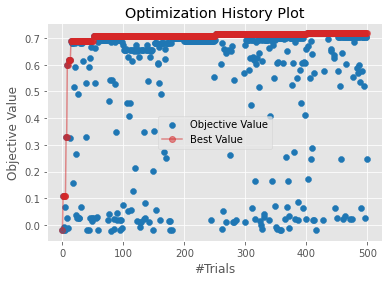

In [165]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_svm);

In [166]:
#from optuna.visualization.matplotlib import plot_param_importances

#plot_param_importances(study_svm);

In [167]:
detailed_objective_svm_cv(study_svm.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.721627,0.052918
1,TP,17.700000,3.164034
2,TN,99.400000,1.349897
3,FP,1.100000,1.286684
4,FN,15.700000,3.164034
5,Accuracy,0.874537,0.029791
6,Precision,0.938904,0.072239
7,Sensitivity,0.529952,0.094297
8,Specificity,0.989060,0.012838
9,F1 score,0.674584,0.090901


In [168]:
mat_met_svm_test['ave'] = mat_met_svm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_svm_test['std'] = mat_met_svm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_svm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.718703,0.680756,0.734606,0.718255,0.723604,0.692007,0.718489,0.696068,0.608059,0.741383,0.703193,0.038432
1,TP,39.000000,35.000000,35.000000,35.000000,36.000000,30.000000,38.000000,36.000000,29.000000,35.000000,34.800000,3.119829
2,TN,199.000000,199.000000,199.000000,198.000000,201.000000,200.000000,200.000000,200.000000,201.000000,201.000000,199.800000,1.032796
3,FP,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.800000,0.632456
4,FN,28.000000,32.000000,32.000000,33.000000,29.000000,37.000000,28.000000,29.000000,37.000000,31.000000,31.600000,3.339993
5,Accuracy,0.888060,0.873134,0.873134,0.869403,0.884328,0.858209,0.888060,0.880597,0.858209,0.880597,0.875373,0.011013
6,Precision,0.951220,0.945946,0.945946,0.945946,0.947368,0.967742,0.950000,0.923077,0.966667,0.972222,0.951613,0.014310
7,Sensitivity,0.582090,0.522388,0.522388,0.514706,0.553846,0.447761,0.575758,0.553846,0.439394,0.530303,0.524248,0.048231
8,Specificity,0.990000,0.990000,0.990000,0.990000,0.990100,0.995000,0.990100,0.985200,0.995000,0.995000,0.991040,0.003113
9,F1 score,0.722222,0.673077,0.673077,0.666667,0.699029,0.612245,0.716981,0.692308,0.604167,0.686275,0.674605,0.039479


In [169]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_svm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_svm = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )


        #learn
        
        optimizedCV_svm.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_svm = optimizedCV_svm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_svm': y_pred_optimized_svm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_svm_cat = np.where(((y_pred_optimized_svm >= 2) | (y_pred_optimized_svm <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_svm_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_svm))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_svm_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_svm_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_svm_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_svm_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_svm_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_svm_cat))
        
    data_svm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_svm['y_test' + str(i)] = data_inner['y_test']
    data_svm['y_pred_svm' + str(i)] = data_inner['y_pred_svm']
   # data_svm['correct' + str(i)] = correct_value
   # data_svm['pred' + str(i)] = y_pred_optimized_svm

mat_met_optimized_svm = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


svm_run0 = data_svm[['y_test_idx0', 'y_test0', 'y_pred_svm0']]
svm_run0.sort_values(by='y_test_idx0', inplace=True)
svm_run0.reset_index(inplace=True, drop=True)
svm_run1 = data_svm[['y_test_idx1', 'y_test1', 'y_pred_svm1']]
svm_run1.sort_values(by='y_test_idx1', inplace=True)
svm_run1.reset_index(inplace=True, drop=True)
svm_run2 = data_svm[['y_test_idx2', 'y_test2', 'y_pred_svm2']]
svm_run2.sort_values(by='y_test_idx2', inplace=True)
svm_run2.reset_index(inplace=True, drop=True)
svm_run3 = data_svm[['y_test_idx3', 'y_test3', 'y_pred_svm3']]
svm_run3.sort_values(by='y_test_idx3', inplace=True)
svm_run3.reset_index(inplace=True, drop=True)
svm_run4 = data_svm[['y_test_idx4', 'y_test4', 'y_pred_svm4']]
svm_run4.sort_values(by='y_test_idx4', inplace=True)
svm_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
svm_5preds = pd.concat([chembl_id,svm_run0, svm_run1, svm_run2, svm_run3, svm_run4], axis=1)
svm_5preds = svm_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_svm0', 'y_pred_svm1', 'y_pred_svm2', 'y_pred_svm3', 'y_pred_svm4']]
svm_5preds['y_pred_svm_ave'] = svm_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
svm_5preds['y_pred_svm_std'] = svm_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
svm_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_svm0,y_pred_svm1,y_pred_svm2,y_pred_svm3,y_pred_svm4,y_pred_svm_ave,y_pred_svm_std
0,CHEMBL4635479,0,0.42,0.805779,0.779109,0.811309,0.875031,0.061997,0.625538,0.292305
1,CHEMBL4299417,1,0.98,0.833693,0.843639,0.855277,0.904510,0.946105,0.893871,0.054611
2,CHEMBL4225331,2,0.84,1.175726,1.278796,1.056998,1.507110,1.242024,1.183442,0.204648
3,CHEMBL1094710,3,0.45,-0.059069,-0.055019,0.067725,-0.049667,-0.097548,0.042737,0.189132
4,CHEMBL3287256,4,-0.33,0.036604,0.076714,0.130514,0.057204,0.104161,0.012533,0.156172
...,...,...,...,...,...,...,...,...,...,...
1334,CHEMBL3769491,1334,0.69,-0.117411,-0.141687,-0.146953,-0.165922,-0.254585,-0.022760,0.321660
1335,CHEMBL482095,1335,0.44,0.643770,0.562889,0.696936,0.598154,0.504957,0.574451,0.085058
1336,CHEMBL4095596,1336,0.78,1.256897,0.987371,0.773645,1.287640,1.255758,1.056885,0.221557
1337,CHEMBL4072925,1337,0.62,0.500069,0.547592,0.576781,0.488154,0.318990,0.508598,0.095762


In [170]:
mat_met_optimized_svm.to_csv(output/'mat_met_svm_opt.csv')
svm_5preds.to_csv(output/'svm_5test_CV_result.csv')

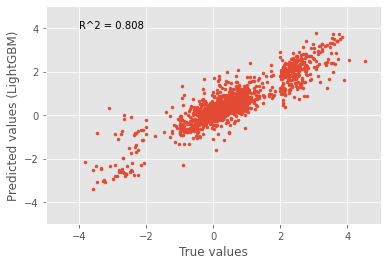

In [171]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(svm_5preds['y_test0'], svm_5preds['y_pred_svm_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(svm_5preds['y_test0'], svm_5preds['y_pred_svm_ave'])), (-4, 4))
plt.show()

In [172]:
#cross valide using this optimized SVR 
svm_baseline_CVscore = cross_val_score(svm_reg, X, Y, cv=10, scoring="r2")
#cv_svm_opt_testSet = cross_val_score(optimized_svm, X, Y, cv=10, scoring="r2")
cv_svm_opt = cross_val_score(optimizedCV_svm, X, Y, cv=10, scoring="r2")
print("SVM baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(svm_baseline_CVscore), np.std(svm_baseline_CVscore, ddof=1)))
#print("SVM optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (svm_baseline_CVscore.mean(), svm_baseline_CVscore.std()))
print("SVM optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_svm_opt), np.std(cv_svm_opt, ddof=1)))

SVM baseline model r2_score 0.6829 with a standard deviation of 0.0513
SVM optimized model r2_score 0.7166 with a standard deviation of 0.0462


In [173]:
joblib.dump(svm_reg, output/"svm_reg.joblib")
#joblib.dump(optimized_svm, output/"optimized_svm.joblib")
joblib.dump(optimizedCV_svm, output/"optimizedCV_svm.joblib")

['./optimizedCV_svm_noSemiSel.joblib']